In [1]:
import argparse
import easydict

from utils.config import *
from utils.count_model import *
from agents import *
from torchsummaryX import summary


In [2]:
# import random

# RandomListOfIntegers = [random.randint(0, 99999) for iter in range(5)]
# print(RandomListOfIntegers)
RandomListOfIntegers = [33431, 55466, 83433, 41233, 69450]

# 40 % drop

In [3]:
total_best = []
total_history = []
for i, seed in enumerate(RandomListOfIntegers):
    config = easydict.EasyDict()
    config.exp_name = "vgg16_exp_cifar100_0"
    config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

    config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
    config.cuda = True
    config.gpu_device = 0
    config.seed = seed
    config.milestones = [10, 20,30,40]
    config.gamma = 0.9
    config.img_size = 32
    config.num_classes = 100
    config.data_mode = "download"
    config.data_loader_workers = 4
    config.pin_memory = True
    config.async_loading = True
    config.batch_size = 128
    config.async_loading = True
    config.max_epoch = 100
    torch.cuda.init()
    
    agent = globals()["VGG_BN_cifar"](config)
    agent.init_graph()
    agent.load_checkpoint(config.load_file)
    agent.compress(method = 'greedy',k=0.8)
    best,history = agent.train(specializing=False, freeze_conv=False,cosine_decay = True)
    total_best.append(best)
    total_history.append(history)
    summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

    

Files already downloaded and verified
num_pruned 13
indices_pruned !!!  [10, 11, 16, 20, 24, 25, 26, 27, 31, 32, 41, 43, 49]
num_pruned 13
indices_pruned !!!  [11, 55, 48, 23, 1, 13, 50, 44, 21, 18, 24, 27, 14]
num_pruned 26
indices_pruned !!!  [1, 116, 73, 7, 127, 74, 105, 99, 23, 101, 97, 84, 57, 100, 47, 56, 33, 69, 75, 42, 109, 71, 113, 25, 120, 32]
num_pruned 26
indices_pruned !!!  [113, 33, 1, 125, 27, 32, 81, 15, 43, 97, 88, 89, 82, 8, 73, 98, 0, 101, 118, 53, 122, 6, 93, 92, 110, 28]
num_pruned 52
indices_pruned !!!  [122, 137, 176, 221, 201, 187, 18, 166, 2, 199, 78, 110, 42, 183, 151, 180, 6, 220, 26, 205, 12, 115, 44, 154, 50, 66, 86, 191, 198, 13, 244, 101, 224, 142, 225, 228, 178, 175, 89, 69, 4, 144, 21, 241, 49, 99, 52, 97, 121, 90, 238, 113]
num_pruned 52
indices_pruned !!!  [94, 205, 233, 249, 23, 176, 126, 128, 44, 117, 166, 111, 36, 123, 235, 101, 164, 189, 46, 7, 66, 137, 227, 116, 74, 95, 61, 156, 96, 168, 250, 237, 28, 26, 225, 242, 135, 64, 210, 220, 244, 56, 76,

Epoch-0-:   0%|          | 1/391 [00:00<04:18,  1.51it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.344715108651944	Top1 Acc: 0.5308799999809265


Valiation at -0-: 100%|██████████| 79/79 [00:03<00:00, 24.99it/s]
/home/bigdatainha/miniconda3/envs/pytorch16/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 1.8976032266133949	Top1 Acc: 0.537


Epoch-1-:   1%|          | 3/391 [00:00<03:06,  2.08it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.5721468840108808	Top1 Acc: 0.5770399999809265


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.0740296855757507	Top1 Acc: 0.4833


Epoch-2-:   0%|          | 1/391 [00:00<03:23,  1.92it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.6446320510581327	Top1 Acc: 0.5609600000381469


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.129567313797866	Top1 Acc: 0.4718


Epoch-3-:   1%|          | 3/391 [00:00<03:19,  1.95it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.6774066207963791	Top1 Acc: 0.5517400000190735


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.906074332285531	Top1 Acc: 0.5081


Epoch-4-:   0%|          | 1/391 [00:00<04:14,  1.53it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.7091392272573602	Top1 Acc: 0.5409199999904633


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.24470986293841	Top1 Acc: 0.4452


Epoch-5-:   0%|          | 1/391 [00:00<02:24,  2.69it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.6895137412468795	Top1 Acc: 0.5472400000095368


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.008602247962469	Top1 Acc: 0.488


Epoch-6-:   0%|          | 1/391 [00:00<02:51,  2.27it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.637134313278491	Top1 Acc: 0.55806


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.854121585435505	Top1 Acc: 0.5171


Epoch-7-:   1%|          | 2/391 [00:00<02:38,  2.45it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.6145847508364626	Top1 Acc: 0.5647000000572204


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.7695640235007564	Top1 Acc: 0.5292


Epoch-8-:   1%|          | 3/391 [00:00<02:21,  2.74it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.5869596068511533	Top1 Acc: 0.5693400000572204


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.01668231849429	Top1 Acc: 0.4999


Epoch-9-:   1%|          | 2/391 [00:00<02:49,  2.29it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.5760723532313277	Top1 Acc: 0.5713400000572204


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.065584578091585	Top1 Acc: 0.4755


Epoch-10-:   0%|          | 1/391 [00:00<02:45,  2.35it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.5629514056398435	Top1 Acc: 0.57358


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.9445571869234495	Top1 Acc: 0.4958


Epoch-11-:   1%|          | 2/391 [00:00<02:56,  2.21it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.5694734434337567	Top1 Acc: 0.5736800000190735


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.9058899849275999	Top1 Acc: 0.5125


Epoch-12-:   0%|          | 1/391 [00:00<03:33,  1.83it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.5484256668163991	Top1 Acc: 0.5805


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.7588467024549652	Top1 Acc: 0.5403


Epoch-13-:   1%|          | 3/391 [00:00<02:45,  2.35it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.5482598620912302	Top1 Acc: 0.578320000038147


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.8772418136838116	Top1 Acc: 0.5086


Epoch-14-:   0%|          | 1/391 [00:00<03:27,  1.88it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.5405962113529215	Top1 Acc: 0.5787400000572205


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.0321905477137507	Top1 Acc: 0.484


Epoch-15-:   0%|          | 1/391 [00:00<03:44,  1.74it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.5316294773155466	Top1 Acc: 0.5832799999809265


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.8465234508997277	Top1 Acc: 0.5148


Epoch-16-:   0%|          | 1/391 [00:00<02:33,  2.54it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.5159272550012144	Top1 Acc: 0.5837000000190735


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.8665831481354147	Top1 Acc: 0.5196


Epoch-17-:   1%|          | 3/391 [00:00<02:20,  2.75it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.5313242554969495	Top1 Acc: 0.5807600000572205


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.8070687991154344	Top1 Acc: 0.5272


Epoch-18-:   0%|          | 1/391 [00:00<03:03,  2.12it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5008451658136703	Top1 Acc: 0.58748


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.936964849882488	Top1 Acc: 0.505


Epoch-19-:   1%|          | 3/391 [00:00<02:12,  2.94it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.503921028293307	Top1 Acc: 0.58898


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 2.1335822268377376	Top1 Acc: 0.4746


Epoch-20-:   1%|          | 3/391 [00:00<02:38,  2.45it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.5104828240621426	Top1 Acc: 0.5859


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.9411066710194456	Top1 Acc: 0.5136


Epoch-21-:   1%|          | 2/391 [00:00<03:07,  2.07it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.5033345417598325	Top1 Acc: 0.5881600000572205


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.7367390861994103	Top1 Acc: 0.5444


Epoch-22-:   1%|          | 2/391 [00:00<02:58,  2.18it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.4797269160790212	Top1 Acc: 0.594000000038147


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.902097424374351	Top1 Acc: 0.5139


Epoch-23-:   1%|          | 3/391 [00:00<02:36,  2.47it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.478042486683487	Top1 Acc: 0.592540000038147


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.8453722286827956	Top1 Acc: 0.5234


Epoch-24-:   0%|          | 1/391 [00:00<04:01,  1.61it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.4648621624997815	Top1 Acc: 0.5985799999809265


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.8156869320929805	Top1 Acc: 0.5313


Epoch-25-:   1%|          | 3/391 [00:00<02:12,  2.92it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.4521501582601797	Top1 Acc: 0.6004599999809265


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 2.006479462490806	Top1 Acc: 0.5094


Epoch-26-:   0%|          | 1/391 [00:00<04:13,  1.54it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.456646593787786	Top1 Acc: 0.5999599999809265


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.6668852431864678	Top1 Acc: 0.5515


Epoch-27-:   1%|          | 3/391 [00:00<01:47,  3.61it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.4372947616955203	Top1 Acc: 0.6034599999809265


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.7250281195097332	Top1 Acc: 0.5527


Epoch-28-:   1%|          | 3/391 [00:00<03:14,  1.99it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.4340347097352948	Top1 Acc: 0.60446


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.7791315045537828	Top1 Acc: 0.533


Epoch-29-:   0%|          | 1/391 [00:00<02:14,  2.91it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.4307072360802184	Top1 Acc: 0.6065000000190734


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.8013023817086522	Top1 Acc: 0.5353


Epoch-30-:   1%|          | 2/391 [00:00<02:30,  2.59it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4109640217498136	Top1 Acc: 0.6076199999809265


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.7972748626636554	Top1 Acc: 0.5381


Epoch-31-:   1%|          | 3/391 [00:00<02:07,  3.05it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.4139490517813835	Top1 Acc: 0.6086800000572204


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.711326408989822	Top1 Acc: 0.5504


Epoch-32-:   1%|          | 2/391 [00:00<02:08,  3.03it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.3859228718921046	Top1 Acc: 0.6159199999809265


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.7129147173483161	Top1 Acc: 0.5442


Epoch-33-:   1%|          | 2/391 [00:00<02:36,  2.48it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.3835271991732176	Top1 Acc: 0.61526


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.713504927067817	Top1 Acc: 0.5561


Epoch-34-:   1%|          | 2/391 [00:00<02:36,  2.48it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.3720022970453247	Top1 Acc: 0.6183999999809265


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.5700832816618908	Top1 Acc: 0.5726


Epoch-35-:   0%|          | 1/391 [00:00<04:32,  1.43it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.349610387669195	Top1 Acc: 0.625920000038147


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.6156631662875791	Top1 Acc: 0.5708


Epoch-36-:   1%|          | 2/391 [00:00<01:49,  3.56it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.3409098091027927	Top1 Acc: 0.6278600000572204


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.6833446750157997	Top1 Acc: 0.5516


Epoch-37-:   0%|          | 1/391 [00:00<02:16,  2.85it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.339083482999631	Top1 Acc: 0.62914


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.70627793782874	Top1 Acc: 0.5585


Epoch-38-:   1%|          | 3/391 [00:00<02:13,  2.90it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3160980833156029	Top1 Acc: 0.6319200000190734


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.673237391665012	Top1 Acc: 0.5685


Epoch-39-:   1%|          | 3/391 [00:00<02:55,  2.21it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3001971471949916	Top1 Acc: 0.63694


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.786629228652278	Top1 Acc: 0.5488


Epoch-40-:   0%|          | 1/391 [00:00<03:21,  1.93it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.2967946896772555	Top1 Acc: 0.6376199999809266


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.9656255124490472	Top1 Acc: 0.5114


Epoch-41-:   0%|          | 1/391 [00:00<03:29,  1.86it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.2716030563844745	Top1 Acc: 0.6434599999809265


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.66662091394014	Top1 Acc: 0.565


Epoch-42-:   1%|          | 2/391 [00:00<02:13,  2.91it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.2594199255299385	Top1 Acc: 0.6464199999809265


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.6953173015691057	Top1 Acc: 0.5639


Epoch-43-:   1%|          | 3/391 [00:00<02:37,  2.47it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.247009714850989	Top1 Acc: 0.6485800000572205


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.6861330678191366	Top1 Acc: 0.5592


Epoch-44-:   0%|          | 1/391 [00:00<02:49,  2.30it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.237721700650042	Top1 Acc: 0.6519200000190735


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.568557784527163	Top1 Acc: 0.5877


Epoch-45-:   1%|          | 2/391 [00:00<02:27,  2.64it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2219195391820825	Top1 Acc: 0.65818


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.67984791496132	Top1 Acc: 0.5635


Epoch-46-:   1%|          | 3/391 [00:00<02:42,  2.39it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.1949077766874563	Top1 Acc: 0.662540000038147


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5709736271749568	Top1 Acc: 0.5863


Epoch-47-:   1%|          | 3/391 [00:00<02:46,  2.33it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.1855191466448558	Top1 Acc: 0.664440000038147


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.6052306694320486	Top1 Acc: 0.5826


Epoch-48-:   0%|          | 1/391 [00:00<03:57,  1.64it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.1553253081753432	Top1 Acc: 0.6737999999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6541621428501756	Top1 Acc: 0.5775


Epoch-49-:   1%|          | 3/391 [00:00<02:27,  2.63it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.1446600702717482	Top1 Acc: 0.6746200000190735


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.6154780040813397	Top1 Acc: 0.5717


Epoch-50-:   1%|          | 2/391 [00:00<03:04,  2.11it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.12503433517178	Top1 Acc: 0.68392


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5806507702115216	Top1 Acc: 0.5908


Epoch-51-:   0%|          | 1/391 [00:00<03:39,  1.78it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1083984631101798	Top1 Acc: 0.6843400000572205


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6914446655708024	Top1 Acc: 0.5749


Epoch-52-:   1%|          | 2/391 [00:00<02:55,  2.21it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.0863032275453552	Top1 Acc: 0.6918600000572205


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.515701932243154	Top1 Acc: 0.5989


Epoch-53-:   0%|          | 1/391 [00:00<03:56,  1.65it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.0613246396984286	Top1 Acc: 0.6962599999809265


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.584428391879118	Top1 Acc: 0.5913


Epoch-54-:   1%|          | 2/391 [00:00<02:16,  2.85it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.0408215655390258	Top1 Acc: 0.7026600000572205


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.7195153432556345	Top1 Acc: 0.573


Epoch-55-:   1%|          | 2/391 [00:00<02:17,  2.82it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.0188705405920668	Top1 Acc: 0.70634


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.4253518219235577	Top1 Acc: 0.6221


Epoch-56-:   1%|          | 2/391 [00:00<03:12,  2.02it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.9986885342451618	Top1 Acc: 0.7127200000190735


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.4508653139766259	Top1 Acc: 0.6146


Epoch-57-:   0%|          | 1/391 [00:00<03:41,  1.76it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.9756532221499001	Top1 Acc: 0.71884


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5900486390801924	Top1 Acc: 0.5939


Epoch-58-:   1%|          | 2/391 [00:00<02:19,  2.79it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.9512939125375675	Top1 Acc: 0.72278


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5802680963202367	Top1 Acc: 0.5939


Epoch-59-:   0%|          | 1/391 [00:00<04:42,  1.38it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.9340736811118358	Top1 Acc: 0.72822


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5955337814137907	Top1 Acc: 0.5979


Epoch-60-:   0%|          | 1/391 [00:00<03:30,  1.86it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.8966735264529353	Top1 Acc: 0.73846


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4141133118279372	Top1 Acc: 0.6336


Epoch-61-:   0%|          | 1/391 [00:00<02:54,  2.23it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.8791865637845091	Top1 Acc: 0.743200000038147


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.4339676657809486	Top1 Acc: 0.6321


Epoch-62-:   0%|          | 1/391 [00:00<02:22,  2.73it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.857322778543243	Top1 Acc: 0.7487600000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.3845076289358018	Top1 Acc: 0.6333


Epoch-63-:   1%|          | 3/391 [00:00<03:26,  1.88it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.8269163002748319	Top1 Acc: 0.7544599999809265


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4469413455528548	Top1 Acc: 0.6311


Epoch-64-:   1%|          | 2/391 [00:00<02:14,  2.88it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.8053788463477893	Top1 Acc: 0.7609800000572204


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4249218219443212	Top1 Acc: 0.6279


Epoch-65-:   0%|          | 1/391 [00:00<03:47,  1.72it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7713228170676609	Top1 Acc: 0.7712600000572205


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3982051188432718	Top1 Acc: 0.6448


Epoch-66-:   1%|          | 3/391 [00:00<03:16,  1.97it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.7453641948645072	Top1 Acc: 0.7776799999809265


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5217200849629655	Top1 Acc: 0.6223


Epoch-67-:   0%|          | 1/391 [00:00<04:01,  1.62it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.7234065351278886	Top1 Acc: 0.7821400000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3178981112528452	Top1 Acc: 0.6568


Epoch-68-:   1%|          | 2/391 [00:00<02:22,  2.72it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.684249807806576	Top1 Acc: 0.7925399999809265


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3779029121881798	Top1 Acc: 0.651


Epoch-69-:   0%|          | 1/391 [00:00<03:15,  2.00it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6546413042508733	Top1 Acc: 0.80172


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.428983203217953	Top1 Acc: 0.6446


Epoch-70-:   1%|          | 3/391 [00:00<03:07,  2.07it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6282340269869245	Top1 Acc: 0.810460000038147


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3871049533916424	Top1 Acc: 0.6534


Epoch-71-:   1%|          | 3/391 [00:00<03:06,  2.08it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.5968271635682382	Top1 Acc: 0.8181599999809265


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3471709120122692	Top1 Acc: 0.6567


Epoch-72-:   1%|          | 3/391 [00:00<02:09,  2.99it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.558677081333097	Top1 Acc: 0.8297199999809265


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.4353900023653536	Top1 Acc: 0.6477


Epoch-73-:   1%|          | 2/391 [00:00<02:42,  2.40it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.5275766232129558	Top1 Acc: 0.8378400000190734


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3503953837141205	Top1 Acc: 0.6646


Epoch-74-:   0%|          | 1/391 [00:00<02:33,  2.54it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.49407561302489944	Top1 Acc: 0.8466799999809265


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.347686330728893	Top1 Acc: 0.6731


Epoch-75-:   0%|          | 1/391 [00:00<04:16,  1.52it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.45727295247490146	Top1 Acc: 0.8571600000572205


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3492335292357434	Top1 Acc: 0.6708


Epoch-76-:   0%|          | 1/391 [00:00<02:25,  2.67it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.4273120860004669	Top1 Acc: 0.864940000038147


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3678635698330552	Top1 Acc: 0.6715


Epoch-77-:   0%|          | 1/391 [00:00<03:14,  2.01it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.38368783376710797	Top1 Acc: 0.880180000038147


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.347411654418028	Top1 Acc: 0.6838


Epoch-78-:   1%|          | 2/391 [00:00<02:34,  2.51it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.3503880320150224	Top1 Acc: 0.888240000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3820475966115542	Top1 Acc: 0.682


Epoch-79-:   1%|          | 2/391 [00:00<02:19,  2.78it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.3172400557933866	Top1 Acc: 0.8993200000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3515487765964074	Top1 Acc: 0.687


Epoch-80-:   0%|          | 1/391 [00:00<02:11,  2.97it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.2946117828264261	Top1 Acc: 0.9057000000190735


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3867185704315765	Top1 Acc: 0.6862


Epoch-81-:   1%|          | 3/391 [00:00<03:01,  2.13it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.2641449524923359	Top1 Acc: 0.9154600000190735


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3888839204100114	Top1 Acc: 0.6822


Epoch-82-:   0%|          | 1/391 [00:00<02:06,  3.08it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.23183628369856368	Top1 Acc: 0.9267200000381469


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3740467700777175	Top1 Acc: 0.6867


Epoch-83-:   0%|          | 1/391 [00:00<03:34,  1.81it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.20487731110180735	Top1 Acc: 0.9351599999809265


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.350250677217411	Top1 Acc: 0.7003


Epoch-84-:   1%|          | 3/391 [00:00<02:44,  2.36it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.16975465618893312	Top1 Acc: 0.94588


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3571044395241556	Top1 Acc: 0.6986


Epoch-85-:   1%|          | 2/391 [00:00<03:07,  2.08it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.14806683507302534	Top1 Acc: 0.95418


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3455829084674014	Top1 Acc: 0.7069


Epoch-86-:   1%|          | 3/391 [00:00<02:43,  2.37it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.1294972801871617	Top1 Acc: 0.9594800000572205


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3677068073538285	Top1 Acc: 0.702


Epoch-87-:   1%|          | 3/391 [00:00<03:18,  1.96it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.10646918812371275	Top1 Acc: 0.967340000038147


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3649358115618742	Top1 Acc: 0.7097


Epoch-88-:   0%|          | 1/391 [00:00<03:09,  2.06it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.09905622316443402	Top1 Acc: 0.96924


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3324022647700733	Top1 Acc: 0.7149


Epoch-89-:   0%|          | 1/391 [00:00<04:41,  1.38it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.08504534277426617	Top1 Acc: 0.9745599999809265


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3452359098422377	Top1 Acc: 0.7183


Epoch-90-:   1%|          | 3/391 [00:00<02:23,  2.70it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.07504032430289041	Top1 Acc: 0.9780399999809265


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.345992490460601	Top1 Acc: 0.7135


Epoch-91-:   0%|          | 1/391 [00:00<02:18,  2.81it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.06918124516811365	Top1 Acc: 0.9794199999809265


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3398679366594628	Top1 Acc: 0.7205


Epoch-92-:   0%|          | 1/391 [00:00<02:08,  3.03it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06246451796282588	Top1 Acc: 0.9817600000190735


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.340570269506189	Top1 Acc: 0.7205


Epoch-93-:   0%|          | 1/391 [00:00<02:25,  2.67it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.058406175466735495	Top1 Acc: 0.98328


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3389749481708189	Top1 Acc: 0.722


Epoch-94-:   0%|          | 1/391 [00:00<03:18,  1.97it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.05560325720416539	Top1 Acc: 0.9838000000572205


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3420700332786464	Top1 Acc: 0.722


Epoch-95-:   0%|          | 1/391 [00:00<02:02,  3.19it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.05045754265735674	Top1 Acc: 0.9853000000190735


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3352343907839135	Top1 Acc: 0.7212


Epoch-96-:   1%|          | 3/391 [00:00<02:21,  2.74it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.047942203895934406	Top1 Acc: 0.986400000038147


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.333748987958401	Top1 Acc: 0.7207


Epoch-97-:   1%|          | 3/391 [00:00<02:25,  2.67it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.047494839071808265	Top1 Acc: 0.98704


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3323556599737723	Top1 Acc: 0.7224


Epoch-98-:   0%|          | 1/391 [00:00<02:14,  2.90it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.04510569948788799	Top1 Acc: 0.9878000000190735


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3307162960873375	Top1 Acc: 0.7236


Epoch-99-:   0%|          | 1/391 [00:00<03:16,  1.99it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.04731662140306457	Top1 Acc: 0.9871000000190735


Valiation at -99-: 100%|██████████| 79/79 [00:02<00:00, 29.98it/s]


Validation results at epoch-99 | loss: 1.3350890723964837	Top1 Acc: 0.7239
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

num_pruned 103
indices_pruned !!!  [403, 38, 185, 43, 462, 113, 44, 136, 71, 206, 254, 169, 182, 181, 196, 65, 367, 470, 161, 330, 202, 13, 412, 308, 106, 398, 226, 481, 440, 337, 81, 122, 325, 495, 98, 503, 194, 69, 468, 244, 441, 388, 93, 230, 155, 256, 353, 298, 266, 381, 507, 333, 294, 497, 57, 380, 295, 361, 171, 338, 99, 418, 22, 25, 477, 211, 210, 286, 114, 208, 421, 217, 191, 360, 105, 379, 4, 248, 147, 85, 156, 47, 476, 80, 3, 268, 157, 270, 444, 369, 249, 287, 293, 289, 408, 454, 135, 509, 436, 508, 17, 234, 285]
num_pruned 103
indices_pruned !!!  [391, 223, 185, 450, 479, 121, 437, 170, 383, 385, 5, 302, 368, 381, 146, 390, 471, 405, 319, 202, 505, 296, 148, 459, 196, 268, 340, 150, 266, 449, 254, 379, 134, 249, 463, 93, 272, 214, 212, 45, 111, 262, 483, 321, 399, 177, 461, 178, 64, 130, 98, 337, 322, 171, 363, 16, 231, 218, 320, 421, 417, 474, 20, 467, 10, 227, 433, 247, 496, 97, 375, 118, 402, 424, 348, 478, 310, 299, 384, 125, 199, 441, 187, 236, 229, 356, 370, 138, 435, 

Epoch-0-:   1%|          | 3/391 [00:00<02:10,  2.98it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.369194899678535	Top1 Acc: 0.520340000038147


Valiation at -0-: 100%|██████████| 79/79 [00:02<00:00, 29.32it/s]
/home/bigdatainha/miniconda3/envs/pytorch16/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 1.947395487676693	Top1 Acc: 0.5066


Epoch-1-:   1%|          | 3/391 [00:00<02:34,  2.51it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.5828988262454566	Top1 Acc: 0.57714


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.127433541454846	Top1 Acc: 0.4715


Epoch-2-:   1%|          | 3/391 [00:00<02:07,  3.05it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.6454638593337114	Top1 Acc: 0.5602599999809265


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.09914199310013	Top1 Acc: 0.4674


Epoch-3-:   1%|          | 3/391 [00:00<02:02,  3.17it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.680113347290117	Top1 Acc: 0.55128


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.1003539758392527	Top1 Acc: 0.4752


Epoch-4-:   0%|          | 1/391 [00:00<03:13,  2.02it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.7186113007538153	Top1 Acc: 0.53968


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.297614903389653	Top1 Acc: 0.4358


Epoch-5-:   0%|          | 1/391 [00:00<03:15,  1.99it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.6984944614912847	Top1 Acc: 0.5425400000190734


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.0946456993682476	Top1 Acc: 0.4755


Epoch-6-:   1%|          | 3/391 [00:00<02:12,  2.93it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.6389902616705736	Top1 Acc: 0.557380000038147


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.8316905015631566	Top1 Acc: 0.517


Epoch-7-:   1%|          | 3/391 [00:00<02:24,  2.68it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.6044381341665908	Top1 Acc: 0.5648799999904632


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.7628625404985645	Top1 Acc: 0.5292


Epoch-8-:   1%|          | 3/391 [00:00<02:45,  2.35it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.5912527992292438	Top1 Acc: 0.5697599999809265


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.2794277049318143	Top1 Acc: 0.45


Epoch-9-:   1%|          | 3/391 [00:00<02:05,  3.08it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.577925097606981	Top1 Acc: 0.5742999999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.867303430279599	Top1 Acc: 0.5134


Epoch-10-:   1%|          | 3/391 [00:00<02:34,  2.52it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.5691263306781154	Top1 Acc: 0.573840000038147


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.0450882715514944	Top1 Acc: 0.4842


Epoch-11-:   1%|          | 3/391 [00:00<02:33,  2.53it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.5539460105969167	Top1 Acc: 0.5771999999809265


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.0238807337193547	Top1 Acc: 0.4804


Epoch-12-:   1%|          | 3/391 [00:00<01:55,  3.35it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.5567448980668013	Top1 Acc: 0.5782200000190735


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.9096547485906867	Top1 Acc: 0.511


Epoch-13-:   0%|          | 1/391 [00:00<04:07,  1.58it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.5463969048941533	Top1 Acc: 0.5786600000286102


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.6979507404037668	Top1 Acc: 0.5433


Epoch-14-:   0%|          | 1/391 [00:00<02:01,  3.20it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.5401941053092938	Top1 Acc: 0.5818800000572205


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.8965496020981027	Top1 Acc: 0.5094


Epoch-15-:   0%|          | 1/391 [00:00<02:46,  2.35it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.5276634671803935	Top1 Acc: 0.5823800000190735


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.8007719863819172	Top1 Acc: 0.5251


Epoch-16-:   0%|          | 1/391 [00:00<02:32,  2.56it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.5255628312030411	Top1 Acc: 0.58564


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.8736017851889888	Top1 Acc: 0.514


Epoch-17-:   0%|          | 1/391 [00:00<02:48,  2.31it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.5196526574966547	Top1 Acc: 0.5860199999904633


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.9547427424901649	Top1 Acc: 0.5018


Epoch-18-:   1%|          | 3/391 [00:00<02:16,  2.83it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5149567666870858	Top1 Acc: 0.58846


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.8090649843215942	Top1 Acc: 0.5316


Epoch-19-:   1%|          | 3/391 [00:00<01:57,  3.30it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.5122756418364738	Top1 Acc: 0.5871999999809265


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.809970412073256	Top1 Acc: 0.5308


Epoch-20-:   1%|          | 3/391 [00:00<02:21,  2.75it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.5039847851409327	Top1 Acc: 0.59046


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.8681700848325897	Top1 Acc: 0.5201


Epoch-21-:   1%|          | 3/391 [00:00<02:24,  2.69it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.502001052317412	Top1 Acc: 0.5879199999809265


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.7986926579777198	Top1 Acc: 0.523


Epoch-22-:   1%|          | 3/391 [00:00<02:26,  2.66it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.481351088684843	Top1 Acc: 0.5932600000381469


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.7843102322349065	Top1 Acc: 0.5304


Epoch-23-:   1%|          | 3/391 [00:00<02:18,  2.79it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.4855234528441563	Top1 Acc: 0.5927000000381469


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.8873255811160123	Top1 Acc: 0.5068


Epoch-24-:   0%|          | 1/391 [00:00<03:26,  1.89it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.4705575728965232	Top1 Acc: 0.59538


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.713860190367397	Top1 Acc: 0.5543


Epoch-25-:   1%|          | 2/391 [00:00<02:31,  2.56it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.4598996752058453	Top1 Acc: 0.5993600000381469


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 2.0019153311282776	Top1 Acc: 0.5032


Epoch-26-:   1%|          | 2/391 [00:00<02:00,  3.24it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.4542498991007695	Top1 Acc: 0.6002599999809265


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.904896357391454	Top1 Acc: 0.519


Epoch-27-:   1%|          | 4/391 [00:00<02:31,  2.56it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.444876846450064	Top1 Acc: 0.6033600000572205


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.7250018074542661	Top1 Acc: 0.5449


Epoch-28-:   0%|          | 1/391 [00:00<02:21,  2.76it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.424222462927289	Top1 Acc: 0.6073200000572204


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.9307742616798305	Top1 Acc: 0.507


Epoch-29-:   1%|          | 4/391 [00:00<02:38,  2.44it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.4154812850610679	Top1 Acc: 0.6070600000572205


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.891042116322095	Top1 Acc: 0.5132


Epoch-30-:   1%|          | 3/391 [00:00<02:21,  2.75it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4085820248669676	Top1 Acc: 0.6085000000572205


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.6564333318155022	Top1 Acc: 0.5559


Epoch-31-:   0%|          | 1/391 [00:00<01:55,  3.37it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.397727084739129	Top1 Acc: 0.6128799999809265


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.7614433161820038	Top1 Acc: 0.5495


Epoch-32-:   0%|          | 1/391 [00:00<04:04,  1.59it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.3914458710519249	Top1 Acc: 0.61526


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.8027248352388792	Top1 Acc: 0.5391


Epoch-33-:   1%|          | 3/391 [00:00<02:02,  3.18it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.3753491874850925	Top1 Acc: 0.61922


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.7682459384580202	Top1 Acc: 0.5421


Epoch-34-:   0%|          | 1/391 [00:00<02:13,  2.92it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.363154984343692	Top1 Acc: 0.6215200000572204


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.9258706614940981	Top1 Acc: 0.5154


Epoch-35-:   1%|          | 3/391 [00:00<02:30,  2.58it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.3569017653270146	Top1 Acc: 0.6226000000572205


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.7479334948938103	Top1 Acc: 0.5465


Epoch-36-:   1%|          | 3/391 [00:00<03:07,  2.07it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.3475254120119393	Top1 Acc: 0.6241599999809265


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.5926468855218043	Top1 Acc: 0.5815


Epoch-37-:   1%|          | 3/391 [00:00<02:26,  2.65it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.3298595797680224	Top1 Acc: 0.6275199999809266


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.608127769035629	Top1 Acc: 0.5683


Epoch-38-:   1%|          | 3/391 [00:00<02:08,  3.01it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3092281513506798	Top1 Acc: 0.6347400000572204


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.6391946228244636	Top1 Acc: 0.5712


Epoch-39-:   0%|          | 1/391 [00:00<02:21,  2.75it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3006518065472088	Top1 Acc: 0.6368600000190735


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 2.0816247704662856	Top1 Acc: 0.5019


Epoch-40-:   0%|          | 1/391 [00:00<03:15,  2.00it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.2893791796301333	Top1 Acc: 0.640040000038147


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.7685352835474135	Top1 Acc: 0.5423


Epoch-41-:   0%|          | 1/391 [00:00<03:43,  1.75it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.2681433573708205	Top1 Acc: 0.6448800000381469


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.5745760323126106	Top1 Acc: 0.582


Epoch-42-:   1%|          | 3/391 [00:00<02:07,  3.04it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.260952836107415	Top1 Acc: 0.647700000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.7138002628012547	Top1 Acc: 0.5502


Epoch-43-:   0%|          | 1/391 [00:00<03:05,  2.10it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.2320973516425209	Top1 Acc: 0.6564000000190735


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5859644684610488	Top1 Acc: 0.5756


Epoch-44-:   0%|          | 1/391 [00:00<03:12,  2.03it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.2261996459778008	Top1 Acc: 0.6542000000381469


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5882758641544776	Top1 Acc: 0.5834


Epoch-45-:   1%|          | 3/391 [00:00<02:35,  2.50it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.217855005770388	Top1 Acc: 0.656480000038147


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.6406121646301657	Top1 Acc: 0.5675


Epoch-46-:   1%|          | 3/391 [00:00<03:13,  2.00it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.1926673920563116	Top1 Acc: 0.6641199999809265


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.7570854319801814	Top1 Acc: 0.5546


Epoch-47-:   1%|          | 3/391 [00:00<02:30,  2.58it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.1856382541034534	Top1 Acc: 0.6642000000381469


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.6111854390252995	Top1 Acc: 0.5792


Epoch-48-:   0%|          | 1/391 [00:00<03:17,  1.97it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.1664470130830165	Top1 Acc: 0.6709800000572205


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5978022421462625	Top1 Acc: 0.5822


Epoch-49-:   1%|          | 3/391 [00:00<02:12,  2.93it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.1423266438571997	Top1 Acc: 0.6733399999809265


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.631261870830874	Top1 Acc: 0.5742


Epoch-50-:   0%|          | 1/391 [00:00<03:27,  1.88it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.1139169059446097	Top1 Acc: 0.6809600000381469


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5640621532367756	Top1 Acc: 0.589


Epoch-51-:   0%|          | 1/391 [00:00<02:21,  2.76it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1038468449621859	Top1 Acc: 0.68588


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.4998594054692909	Top1 Acc: 0.5989


Epoch-52-:   0%|          | 1/391 [00:00<02:50,  2.29it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.086321754986063	Top1 Acc: 0.68994


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5684255693532243	Top1 Acc: 0.5869


Epoch-53-:   0%|          | 1/391 [00:00<02:17,  2.84it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.0613930111041154	Top1 Acc: 0.6955000000190735


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.507413209993628	Top1 Acc: 0.6057


Epoch-54-:   1%|          | 3/391 [00:00<02:37,  2.46it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.0404390881738395	Top1 Acc: 0.699860000038147


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.560505497304699	Top1 Acc: 0.6024


Epoch-55-:   1%|          | 3/391 [00:00<02:08,  3.01it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.0109713319927225	Top1 Acc: 0.70862


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.4917360332947742	Top1 Acc: 0.6046


Epoch-56-:   1%|          | 3/391 [00:00<02:31,  2.56it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0051937700842348	Top1 Acc: 0.71058


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.4408026269719572	Top1 Acc: 0.6136


Epoch-57-:   0%|          | 1/391 [00:00<03:10,  2.05it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.9812730915101288	Top1 Acc: 0.7152000000572205


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5035652744619152	Top1 Acc: 0.6075


Epoch-58-:   1%|          | 3/391 [00:00<02:00,  3.23it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.9584197069677856	Top1 Acc: 0.72292


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.469819192644916	Top1 Acc: 0.6188


Epoch-59-:   1%|          | 3/391 [00:00<02:06,  3.07it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.929914646593811	Top1 Acc: 0.7300200000190735


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5286342773256423	Top1 Acc: 0.6109


Epoch-60-:   0%|          | 1/391 [00:00<04:37,  1.40it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9049523270038693	Top1 Acc: 0.737960000038147


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.411073542848418	Top1 Acc: 0.6234


Epoch-61-:   0%|          | 1/391 [00:00<02:28,  2.62it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.8795600089880512	Top1 Acc: 0.7427799999809265


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.4062616545942765	Top1 Acc: 0.6293


Epoch-62-:   1%|          | 2/391 [00:00<02:07,  3.06it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.8514069748656524	Top1 Acc: 0.74894


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5013696272161943	Top1 Acc: 0.618


Epoch-63-:   0%|          | 1/391 [00:00<03:39,  1.78it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.8324813526457228	Top1 Acc: 0.75378


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4173223082023332	Top1 Acc: 0.6353


Epoch-64-:   0%|          | 1/391 [00:00<03:46,  1.72it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.7992689527209152	Top1 Acc: 0.763400000038147


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.540925474106511	Top1 Acc: 0.6141


Epoch-65-:   1%|          | 2/391 [00:00<02:45,  2.35it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7761774925167299	Top1 Acc: 0.7696199999809266


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3875824620452109	Top1 Acc: 0.6443


Epoch-66-:   1%|          | 3/391 [00:00<02:35,  2.50it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.7501310482811745	Top1 Acc: 0.7752399999809265


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4044036171104335	Top1 Acc: 0.6443


Epoch-67-:   0%|          | 1/391 [00:00<02:36,  2.50it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.7186058145349897	Top1 Acc: 0.7840600000572204


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3522190776052354	Top1 Acc: 0.6492


Epoch-68-:   0%|          | 1/391 [00:00<02:49,  2.31it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.6833100530040234	Top1 Acc: 0.7936800000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.4481201926364173	Top1 Acc: 0.6398


Epoch-69-:   1%|          | 2/391 [00:00<02:18,  2.81it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6586385363965388	Top1 Acc: 0.79976


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3980743492705912	Top1 Acc: 0.6479


Epoch-70-:   1%|          | 3/391 [00:00<02:09,  2.99it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6271881776697495	Top1 Acc: 0.8090999999809265


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3826924517184873	Top1 Acc: 0.647


Epoch-71-:   1%|          | 3/391 [00:00<01:52,  3.45it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.5832355910402429	Top1 Acc: 0.8214600000190735


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3355263682860363	Top1 Acc: 0.6627


Epoch-72-:   0%|          | 1/391 [00:00<03:16,  1.99it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.55414268763169	Top1 Acc: 0.830500000038147


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.350365686265728	Top1 Acc: 0.6663


Epoch-73-:   0%|          | 1/391 [00:00<04:17,  1.51it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.521011640958469	Top1 Acc: 0.83964


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3634449409533151	Top1 Acc: 0.6671


Epoch-74-:   0%|          | 1/391 [00:00<03:50,  1.69it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.49926277065216124	Top1 Acc: 0.84502


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3475739329676084	Top1 Acc: 0.6643


Epoch-75-:   0%|          | 1/391 [00:00<05:14,  1.24it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.45792517771044045	Top1 Acc: 0.8562199999809265


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3068015650857854	Top1 Acc: 0.6794


Epoch-76-:   0%|          | 1/391 [00:00<05:22,  1.21it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.4233081843465795	Top1 Acc: 0.8682200000572204


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3246664186067219	Top1 Acc: 0.6793


Epoch-77-:   1%|          | 2/391 [00:00<03:08,  2.07it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.39723583640497356	Top1 Acc: 0.8746200000572204


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3207477195353448	Top1 Acc: 0.682


Epoch-78-:   0%|          | 1/391 [00:00<04:22,  1.48it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.3614572423041019	Top1 Acc: 0.887020000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.363713489303106	Top1 Acc: 0.6764


Epoch-79-:   0%|          | 1/391 [00:00<04:08,  1.57it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.32047406570685794	Top1 Acc: 0.8981200000190734


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3232405464860457	Top1 Acc: 0.6868


Epoch-80-:   0%|          | 1/391 [00:00<04:27,  1.46it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.29264429604153497	Top1 Acc: 0.9077999999809265


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.2946055855932115	Top1 Acc: 0.6988


Epoch-81-:   0%|          | 1/391 [00:00<05:11,  1.25it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.257349824166054	Top1 Acc: 0.9182000000190735


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.356081195269959	Top1 Acc: 0.6911


Epoch-82-:   0%|          | 1/391 [00:00<03:58,  1.64it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.22190164204906015	Top1 Acc: 0.9287400000190735


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3481706494017491	Top1 Acc: 0.6984


Epoch-83-:   0%|          | 1/391 [00:00<04:30,  1.44it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.19910632729377892	Top1 Acc: 0.9364600000572204


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.341227403924435	Top1 Acc: 0.7045


Epoch-84-:   0%|          | 1/391 [00:00<03:33,  1.83it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.17036644647569607	Top1 Acc: 0.9463599999809265


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3647477755063697	Top1 Acc: 0.6992


Epoch-85-:   0%|          | 1/391 [00:00<04:23,  1.48it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.15668545543309062	Top1 Acc: 0.950440000038147


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.349260986605777	Top1 Acc: 0.7074


Epoch-86-:   1%|          | 2/391 [00:00<03:07,  2.08it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.12978739823069413	Top1 Acc: 0.9593600000190735


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3504102147078212	Top1 Acc: 0.7098


Epoch-87-:   1%|          | 2/391 [00:00<03:07,  2.07it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.11341051264758915	Top1 Acc: 0.96478


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3399235055416445	Top1 Acc: 0.7102


Epoch-88-:   0%|          | 1/391 [00:00<03:32,  1.84it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.09780953438652445	Top1 Acc: 0.9697400000572205


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3391152454327933	Top1 Acc: 0.7153


Epoch-89-:   0%|          | 1/391 [00:00<03:58,  1.64it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.08800228195422141	Top1 Acc: 0.9734999999809265


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3607683626911309	Top1 Acc: 0.7117


Epoch-90-:   1%|          | 2/391 [00:00<02:22,  2.73it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.07907190292244753	Top1 Acc: 0.9767000000381469


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.354801598983475	Top1 Acc: 0.714


Epoch-91-:   0%|          | 1/391 [00:00<04:27,  1.46it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.06836352308692835	Top1 Acc: 0.9797399999809265


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3453091918667661	Top1 Acc: 0.7151


Epoch-92-:   1%|          | 2/391 [00:00<03:37,  1.79it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06244482936532906	Top1 Acc: 0.9820000000190735


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.353419905976404	Top1 Acc: 0.7171


Epoch-93-:   1%|          | 2/391 [00:00<02:46,  2.34it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.05707563231925449	Top1 Acc: 0.9837800000572204


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3419308949120436	Top1 Acc: 0.7198


Epoch-94-:   0%|          | 1/391 [00:00<04:13,  1.54it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.05444231165854065	Top1 Acc: 0.9848200000190734


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3461979257909558	Top1 Acc: 0.7168


Epoch-95-:   1%|          | 2/391 [00:00<03:08,  2.06it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.050391960977231295	Top1 Acc: 0.9862400000190735


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.347131782694708	Top1 Acc: 0.7187


Epoch-96-:   0%|          | 1/391 [00:00<04:48,  1.35it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.04649964102860683	Top1 Acc: 0.987700000038147


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3475107852416703	Top1 Acc: 0.7178


Epoch-97-:   1%|          | 2/391 [00:00<03:23,  1.91it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.047621469213472455	Top1 Acc: 0.9868600000190735


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3415533538106121	Top1 Acc: 0.7209


Epoch-98-:   0%|          | 1/391 [00:00<03:59,  1.63it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.04774986743293417	Top1 Acc: 0.9865200000572205


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.341899244845668	Top1 Acc: 0.7186


Epoch-99-:   0%|          | 1/391 [00:00<03:15,  2.00it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.04567685928148077	Top1 Acc: 0.9879000000190735


Valiation at -99-: 100%|██████████| 79/79 [00:04<00:00, 19.00it/s]


Validation results at epoch-99 | loss: 1.3442768990239011	Top1 Acc: 0.7177
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

num_pruned 103
indices_pruned !!!  [38, 403, 185, 136, 113, 462, 43, 65, 71, 182, 470, 211, 206, 367, 412, 330, 440, 477, 481, 254, 196, 161, 181, 398, 44, 338, 122, 13, 3, 381, 57, 293, 441, 295, 380, 98, 244, 418, 468, 194, 388, 495, 308, 106, 17, 69, 171, 191, 230, 507, 361, 31, 147, 202, 503, 298, 22, 444, 226, 337, 81, 294, 260, 408, 89, 384, 99, 114, 509, 360, 435, 93, 325, 266, 257, 169, 68, 248, 157, 256, 105, 324, 296, 309, 421, 286, 47, 82, 208, 36, 472, 436, 371, 379, 473, 353, 149, 409, 287, 289, 268, 249, 331]
num_pruned 103
indices_pruned !!!  [391, 185, 223, 121, 450, 170, 385, 383, 437, 5, 302, 479, 381, 471, 146, 368, 390, 319, 405, 202, 150, 449, 505, 459, 196, 93, 148, 266, 340, 463, 296, 254, 262, 268, 379, 134, 249, 214, 272, 178, 212, 45, 111, 399, 483, 321, 461, 177, 64, 130, 337, 322, 363, 384, 171, 496, 247, 320, 118, 433, 310, 98, 421, 16, 97, 474, 218, 467, 187, 20, 231, 375, 227, 370, 312, 424, 199, 299, 356, 348, 402, 10, 183, 441, 478, 466, 417, 423, 11, 3

Epoch-0-:   0%|          | 1/391 [00:00<03:51,  1.69it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.347925852936552	Top1 Acc: 0.52796


Valiation at -0-: 100%|██████████| 79/79 [00:03<00:00, 21.19it/s]
/home/bigdatainha/miniconda3/envs/pytorch16/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 1.9134900705723823	Top1 Acc: 0.5206


Epoch-1-:   0%|          | 1/391 [00:00<03:38,  1.79it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.5764660088302533	Top1 Acc: 0.5783600000572204


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.8616227424597438	Top1 Acc: 0.5234


Epoch-2-:   0%|          | 1/391 [00:00<03:23,  1.92it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.655124717661182	Top1 Acc: 0.5571400000572204


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.2153354475769818	Top1 Acc: 0.4653


Epoch-3-:   0%|          | 1/391 [00:00<03:44,  1.74it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.6770537268475194	Top1 Acc: 0.5523600000190735


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.9963286541685272	Top1 Acc: 0.4941


Epoch-4-:   0%|          | 1/391 [00:00<04:13,  1.54it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.701145887374878	Top1 Acc: 0.5463799999809266


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.101162747491764	Top1 Acc: 0.476


Epoch-5-:   1%|          | 2/391 [00:00<03:58,  1.63it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.68797226086297	Top1 Acc: 0.5463199999809265


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.1254182872892935	Top1 Acc: 0.4713


Epoch-6-:   0%|          | 1/391 [00:00<03:42,  1.75it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.6326980508501878	Top1 Acc: 0.5625000000190735


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.06256073336058	Top1 Acc: 0.477


Epoch-7-:   1%|          | 2/391 [00:00<03:16,  1.98it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.6101079075537679	Top1 Acc: 0.5647799999809265


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.0396469620209707	Top1 Acc: 0.4923


Epoch-8-:   1%|          | 2/391 [00:00<03:38,  1.78it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.5883836435235066	Top1 Acc: 0.57106


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.9360201222987115	Top1 Acc: 0.4957


Epoch-9-:   0%|          | 1/391 [00:00<04:52,  1.33it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.5741253780282063	Top1 Acc: 0.5735999999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.955150608774982	Top1 Acc: 0.4977


Epoch-10-:   0%|          | 1/391 [00:00<04:09,  1.56it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.5715400733606284	Top1 Acc: 0.5733800000286102


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.1210906369776668	Top1 Acc: 0.4692


Epoch-11-:   0%|          | 1/391 [00:00<04:15,  1.53it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.5647014644749635	Top1 Acc: 0.5750600000572205


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.9981446039827564	Top1 Acc: 0.4852


Epoch-12-:   0%|          | 1/391 [00:00<04:13,  1.54it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.5554838912261417	Top1 Acc: 0.574860000038147


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.7583096751683875	Top1 Acc: 0.5314


Epoch-13-:   1%|          | 2/391 [00:00<03:19,  1.95it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.5461680004968668	Top1 Acc: 0.5788600000572205


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.8946088688283027	Top1 Acc: 0.5129


Epoch-14-:   0%|          | 1/391 [00:00<04:28,  1.45it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.5359784367749147	Top1 Acc: 0.582120000038147


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.8253880256338963	Top1 Acc: 0.5251


Epoch-15-:   0%|          | 1/391 [00:00<04:21,  1.49it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.5339602582594927	Top1 Acc: 0.580520000038147


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.0115433191951317	Top1 Acc: 0.494


Epoch-16-:   1%|          | 2/391 [00:00<03:11,  2.03it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.52446291605225	Top1 Acc: 0.5858000000190735


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.8969769477844238	Top1 Acc: 0.5072


Epoch-17-:   0%|          | 1/391 [00:00<03:58,  1.63it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.5177455878318729	Top1 Acc: 0.58508


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.922494225864169	Top1 Acc: 0.5066


Epoch-18-:   1%|          | 3/391 [00:00<03:06,  2.08it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5088611200947286	Top1 Acc: 0.58588


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 2.162156568297857	Top1 Acc: 0.4692


Epoch-19-:   1%|          | 3/391 [00:00<03:31,  1.83it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.504700929612455	Top1 Acc: 0.585


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.8659634605238709	Top1 Acc: 0.5208


Epoch-20-:   1%|          | 2/391 [00:00<03:12,  2.02it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.4995122102215468	Top1 Acc: 0.5911600000572205


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.7507030133959613	Top1 Acc: 0.5378


Epoch-21-:   0%|          | 1/391 [00:00<04:45,  1.37it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.4935642747622926	Top1 Acc: 0.5904600000190735


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.7897595393506787	Top1 Acc: 0.5355


Epoch-22-:   0%|          | 1/391 [00:00<03:35,  1.81it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.4813301615093066	Top1 Acc: 0.5923400000190735


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.9552321358572078	Top1 Acc: 0.4959


Epoch-23-:   0%|          | 1/391 [00:00<03:44,  1.74it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.4843724341038853	Top1 Acc: 0.5926


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.8546663175655316	Top1 Acc: 0.5252


Epoch-24-:   0%|          | 1/391 [00:00<04:33,  1.42it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.4660328404068033	Top1 Acc: 0.5971799999809265


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.780889275707776	Top1 Acc: 0.532


Epoch-25-:   0%|          | 1/391 [00:00<05:19,  1.22it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.4650858671159086	Top1 Acc: 0.59732


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.778936813149271	Top1 Acc: 0.5433


Epoch-26-:   1%|          | 2/391 [00:01<04:15,  1.52it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.449912407666521	Top1 Acc: 0.60138


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.850129160699965	Top1 Acc: 0.5283


Epoch-27-:   1%|          | 3/391 [00:00<03:39,  1.77it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.4403120039978905	Top1 Acc: 0.6022400000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.6838190419764458	Top1 Acc: 0.5594


Epoch-28-:   0%|          | 1/391 [00:00<03:40,  1.77it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.4332373453223186	Top1 Acc: 0.6051600000190734


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.7942432300953925	Top1 Acc: 0.5257


Epoch-29-:   1%|          | 2/391 [00:00<03:12,  2.03it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.425935008641704	Top1 Acc: 0.6063800000572205


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.965496556668342	Top1 Acc: 0.5129


Epoch-30-:   1%|          | 2/391 [00:00<03:10,  2.04it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4133537757732069	Top1 Acc: 0.6083399999809265


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.8414452362664138	Top1 Acc: 0.5136


Epoch-31-:   0%|          | 1/391 [00:00<03:22,  1.93it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.398111302986779	Top1 Acc: 0.6128799999809265


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 2.0159017587009864	Top1 Acc: 0.4976


Epoch-32-:   0%|          | 1/391 [00:00<05:35,  1.16it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.3958348241608467	Top1 Acc: 0.6158600000190735


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.8266605063329768	Top1 Acc: 0.5187


Epoch-33-:   0%|          | 1/391 [00:00<04:16,  1.52it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.3751369574490715	Top1 Acc: 0.6194799999809265


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.656760482848445	Top1 Acc: 0.5619


Epoch-34-:   0%|          | 1/391 [00:00<04:19,  1.50it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.3685129181198452	Top1 Acc: 0.6200200000572205


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.6434903703158414	Top1 Acc: 0.5671


Epoch-35-:   1%|          | 2/391 [00:00<03:07,  2.08it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.360061949018932	Top1 Acc: 0.62288


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.5893852439107774	Top1 Acc: 0.5805


Epoch-36-:   1%|          | 2/391 [00:00<03:05,  2.09it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.336114591649731	Top1 Acc: 0.6284800000190734


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.6832274847392794	Top1 Acc: 0.5583


Epoch-37-:   0%|          | 1/391 [00:00<05:40,  1.14it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.3285240361757595	Top1 Acc: 0.62646


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.8122116779979272	Top1 Acc: 0.5308


Epoch-38-:   1%|          | 2/391 [00:00<03:14,  2.00it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3168743821361182	Top1 Acc: 0.6330000000190735


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.7475762246530266	Top1 Acc: 0.5429


Epoch-39-:   1%|          | 2/391 [00:00<03:24,  1.90it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.302898953485367	Top1 Acc: 0.6383400000572205


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.5643048527874523	Top1 Acc: 0.5827


Epoch-40-:   1%|          | 2/391 [00:00<02:35,  2.51it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.2962444659389194	Top1 Acc: 0.6385800000190734


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.6036862376370007	Top1 Acc: 0.5754


Epoch-41-:   1%|          | 3/391 [00:00<03:47,  1.71it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.275870187050851	Top1 Acc: 0.6411600000572205


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.616047216367118	Top1 Acc: 0.5771


Epoch-42-:   0%|          | 1/391 [00:00<04:28,  1.45it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.2601125449170847	Top1 Acc: 0.6453199999809265


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5512053166763693	Top1 Acc: 0.5821


Epoch-43-:   0%|          | 1/391 [00:00<05:01,  1.29it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.2403718563906676	Top1 Acc: 0.6501399999809265


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.8020437020289748	Top1 Acc: 0.5418


Epoch-44-:   0%|          | 1/391 [00:00<04:34,  1.42it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.2216045068353034	Top1 Acc: 0.6581199999809265


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.6620681979988194	Top1 Acc: 0.565


Epoch-45-:   1%|          | 2/391 [00:00<02:45,  2.35it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2136987298345931	Top1 Acc: 0.6599599999809265


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.6337407993364939	Top1 Acc: 0.5777


Epoch-46-:   1%|          | 3/391 [00:00<03:52,  1.67it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.1890113372022233	Top1 Acc: 0.6646400000572205


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5738765544529203	Top1 Acc: 0.5831


Epoch-47-:   0%|          | 1/391 [00:00<05:38,  1.15it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.183753885271604	Top1 Acc: 0.664480000038147


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.6531806686256505	Top1 Acc: 0.5741


Epoch-48-:   1%|          | 2/391 [00:00<02:54,  2.23it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.1527786010976337	Top1 Acc: 0.6735799999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6019827889490732	Top1 Acc: 0.5837


Epoch-49-:   0%|          | 1/391 [00:00<04:35,  1.42it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.1440102168361244	Top1 Acc: 0.6763999999809265


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.528842437870895	Top1 Acc: 0.6002


Epoch-50-:   0%|          | 1/391 [00:00<05:12,  1.25it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.1228384450268563	Top1 Acc: 0.67914


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5487324331380143	Top1 Acc: 0.592


Epoch-51-:   1%|          | 3/391 [00:00<04:01,  1.60it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1082841548163567	Top1 Acc: 0.6852400000572204


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6186565643624415	Top1 Acc: 0.5765


Epoch-52-:   0%|          | 1/391 [00:00<03:57,  1.64it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.0887911211499168	Top1 Acc: 0.6895800000190735


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5051459360726271	Top1 Acc: 0.6035


Epoch-53-:   1%|          | 2/391 [00:00<03:50,  1.69it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.0576412558860486	Top1 Acc: 0.697


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5795740085312082	Top1 Acc: 0.5919


Epoch-54-:   0%|          | 1/391 [00:00<05:01,  1.30it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.0488254857795012	Top1 Acc: 0.6990400000572204


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5192972270748284	Top1 Acc: 0.6093


Epoch-55-:   1%|          | 3/391 [00:00<03:43,  1.74it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.0258225780313888	Top1 Acc: 0.7025000000381469


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.483244954030725	Top1 Acc: 0.6159


Epoch-56-:   1%|          | 2/391 [00:00<03:09,  2.05it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0030183337838448	Top1 Acc: 0.7110799999809265


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5466188841228243	Top1 Acc: 0.6096


Epoch-57-:   0%|          | 1/391 [00:00<03:26,  1.89it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.9844409920980254	Top1 Acc: 0.7161000000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.4041198077081125	Top1 Acc: 0.6286


Epoch-58-:   1%|          | 3/391 [00:00<03:26,  1.88it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.9482229647733976	Top1 Acc: 0.7244799999809265


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5065313668190679	Top1 Acc: 0.608


Epoch-59-:   0%|          | 1/391 [00:00<03:36,  1.80it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.9303026484406512	Top1 Acc: 0.7292200000190735


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5079855526549906	Top1 Acc: 0.6107


Epoch-60-:   1%|          | 3/391 [00:00<02:49,  2.29it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9037837408997519	Top1 Acc: 0.73592


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4470882400681702	Top1 Acc: 0.6203


Epoch-61-:   0%|          | 1/391 [00:00<05:02,  1.29it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.8819718633009039	Top1 Acc: 0.742300000038147


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.3682270631005493	Top1 Acc: 0.6358


Epoch-62-:   1%|          | 2/391 [00:00<03:03,  2.12it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.8516332304386227	Top1 Acc: 0.7504800000190734


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.440999673137182	Top1 Acc: 0.6273


Epoch-63-:   0%|          | 1/391 [00:00<04:44,  1.37it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.8304246874416575	Top1 Acc: 0.7545000000572205


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5045217999929115	Top1 Acc: 0.6161


Epoch-64-:   0%|          | 1/391 [00:00<04:12,  1.55it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.7927572433753391	Top1 Acc: 0.7643600000572205


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4496965347966062	Top1 Acc: 0.6359


Epoch-65-:   1%|          | 2/391 [00:00<03:20,  1.94it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7682068077347163	Top1 Acc: 0.772000000038147


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3271915935262848	Top1 Acc: 0.6546


Epoch-66-:   0%|          | 1/391 [00:00<03:47,  1.71it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.7411559657824923	Top1 Acc: 0.7775600000190734


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.3736960042881061	Top1 Acc: 0.6529


Epoch-67-:   1%|          | 3/391 [00:00<03:25,  1.89it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.7190567856402044	Top1 Acc: 0.7864600000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3345931436442122	Top1 Acc: 0.6588


Epoch-68-:   0%|          | 1/391 [00:00<05:18,  1.22it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.6867311603730292	Top1 Acc: 0.7949999999809265


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.446036134339586	Top1 Acc: 0.634


Epoch-69-:   0%|          | 1/391 [00:00<03:27,  1.88it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6566221928962356	Top1 Acc: 0.80066


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.347045656246475	Top1 Acc: 0.663


Epoch-70-:   1%|          | 3/391 [00:00<03:39,  1.77it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6249979373896518	Top1 Acc: 0.81022


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3541021377225466	Top1 Acc: 0.6612


Epoch-71-:   0%|          | 1/391 [00:00<04:09,  1.56it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.5904106422306021	Top1 Acc: 0.8193400000190735


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3124597389486772	Top1 Acc: 0.6692


Epoch-72-:   0%|          | 1/391 [00:00<03:35,  1.81it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.555907888638089	Top1 Acc: 0.8293


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3113720839536642	Top1 Acc: 0.6731


Epoch-73-:   0%|          | 1/391 [00:00<04:18,  1.51it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.5323777237664098	Top1 Acc: 0.8378199999809265


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3309891487978682	Top1 Acc: 0.6668


Epoch-74-:   1%|          | 2/391 [00:00<02:30,  2.59it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.48589556704244347	Top1 Acc: 0.848500000038147


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3117868515509594	Top1 Acc: 0.677


Epoch-75-:   1%|          | 2/391 [00:00<03:02,  2.13it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.4696316686661347	Top1 Acc: 0.8540600000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3381061372877676	Top1 Acc: 0.6725


Epoch-76-:   0%|          | 1/391 [00:00<04:54,  1.33it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.4338926297548177	Top1 Acc: 0.8642800000190735


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.276251127448263	Top1 Acc: 0.6888


Epoch-77-:   0%|          | 1/391 [00:00<04:34,  1.42it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.38583784011166417	Top1 Acc: 0.8788600000572204


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3118543436255636	Top1 Acc: 0.689


Epoch-78-:   0%|          | 1/391 [00:00<03:30,  1.85it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.34550407871870736	Top1 Acc: 0.890520000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3692623776725577	Top1 Acc: 0.6884


Epoch-79-:   1%|          | 2/391 [00:00<02:46,  2.34it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.3283607995952182	Top1 Acc: 0.8965999999809265


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3260731500915335	Top1 Acc: 0.6889


Epoch-80-:   1%|          | 2/391 [00:00<02:39,  2.44it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.29659473133818876	Top1 Acc: 0.9061599999809266


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.318493153475508	Top1 Acc: 0.6946


Epoch-81-:   0%|          | 1/391 [00:00<05:04,  1.28it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.26526932791828195	Top1 Acc: 0.9167600000572205


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3215811094151269	Top1 Acc: 0.6993


Epoch-82-:   0%|          | 1/391 [00:00<04:30,  1.44it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.2225436593794152	Top1 Acc: 0.9292000000190734


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.308936964107465	Top1 Acc: 0.7062


Epoch-83-:   0%|          | 1/391 [00:00<05:01,  1.29it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.2026285742935927	Top1 Acc: 0.9354599999809265


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3092309968380988	Top1 Acc: 0.7106


Epoch-84-:   0%|          | 1/391 [00:00<05:02,  1.29it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.17650774281348108	Top1 Acc: 0.9434999999809265


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.367035690742203	Top1 Acc: 0.7045


Epoch-85-:   1%|          | 3/391 [00:00<03:44,  1.73it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.15558780490627985	Top1 Acc: 0.9514999999809265


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3309135384197477	Top1 Acc: 0.7079


Epoch-86-:   0%|          | 1/391 [00:00<04:35,  1.42it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.1307857549175277	Top1 Acc: 0.9592799999809265


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.369498541083517	Top1 Acc: 0.7095


Epoch-87-:   1%|          | 3/391 [00:00<03:12,  2.02it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.11180173574239397	Top1 Acc: 0.966120000038147


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3407911175413976	Top1 Acc: 0.7166


Epoch-88-:   0%|          | 1/391 [00:00<03:58,  1.63it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.10035106573072845	Top1 Acc: 0.9689600000572205


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.322497979749607	Top1 Acc: 0.7209


Epoch-89-:   0%|          | 1/391 [00:00<03:41,  1.76it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.0871089706173562	Top1 Acc: 0.9735600000572204


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3293649252456954	Top1 Acc: 0.7201


Epoch-90-:   1%|          | 3/391 [00:00<03:36,  1.79it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.07537773717432986	Top1 Acc: 0.9776800000381469


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3368061562127704	Top1 Acc: 0.7194


Epoch-91-:   1%|          | 2/391 [00:00<03:12,  2.02it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.07046342501535897	Top1 Acc: 0.97896


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3173677189440667	Top1 Acc: 0.7241


Epoch-92-:   1%|          | 2/391 [00:00<03:29,  1.86it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06136618223984528	Top1 Acc: 0.9823200000572204


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.31813792488243	Top1 Acc: 0.724


Epoch-93-:   0%|          | 1/391 [00:00<03:29,  1.87it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.0553099401604832	Top1 Acc: 0.984400000038147


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3240322319767144	Top1 Acc: 0.7257


Epoch-94-:   0%|          | 1/391 [00:00<04:30,  1.44it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.05490168850973744	Top1 Acc: 0.983820000038147


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.312948370281654	Top1 Acc: 0.7248


Epoch-95-:   0%|          | 1/391 [00:00<03:09,  2.05it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.05043434724926263	Top1 Acc: 0.98648


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3196710876271696	Top1 Acc: 0.7257


Epoch-96-:   0%|          | 1/391 [00:00<04:00,  1.62it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.04775199412827945	Top1 Acc: 0.9869400000190734


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.317128586618206	Top1 Acc: 0.7259


Epoch-97-:   0%|          | 1/391 [00:00<04:25,  1.47it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.048250675168069426	Top1 Acc: 0.98696


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3230755827094935	Top1 Acc: 0.7252


Epoch-98-:   1%|          | 3/391 [00:00<03:34,  1.81it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.045524515587922254	Top1 Acc: 0.9877400000190735


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3189973506746413	Top1 Acc: 0.7275


Epoch-99-:   0%|          | 1/391 [00:00<04:53,  1.33it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.04543597743039012	Top1 Acc: 0.98772


Valiation at -99-: 100%|██████████| 79/79 [00:03<00:00, 24.95it/s]


Validation results at epoch-99 | loss: 1.3200635751591454	Top1 Acc: 0.7267
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

num_pruned 103
indices_pruned !!!  [403, 38, 185, 136, 113, 43, 462, 65, 470, 182, 211, 71, 44, 161, 196, 481, 206, 181, 13, 169, 254, 330, 361, 477, 412, 440, 367, 381, 398, 308, 503, 96, 388, 202, 106, 256, 226, 468, 3, 100, 441, 194, 99, 298, 244, 171, 360, 294, 4, 208, 495, 122, 156, 230, 266, 47, 57, 325, 295, 191, 69, 507, 418, 192, 337, 241, 444, 497, 22, 98, 272, 81, 338, 1, 421, 93, 155, 509, 157, 334, 436, 371, 296, 135, 379, 408, 270, 210, 293, 114, 473, 472, 249, 31, 248, 257, 247, 149, 286, 36, 299, 82, 105]
num_pruned 103
indices_pruned !!!  [391, 223, 185, 450, 121, 479, 437, 383, 170, 5, 385, 302, 368, 381, 471, 146, 390, 405, 319, 150, 202, 449, 505, 266, 148, 196, 340, 268, 459, 296, 254, 461, 214, 93, 272, 45, 262, 379, 463, 249, 134, 322, 177, 212, 483, 399, 111, 321, 64, 130, 178, 337, 171, 10, 98, 97, 16, 320, 421, 433, 363, 218, 310, 496, 467, 187, 474, 384, 231, 299, 20, 118, 402, 511, 375, 370, 348, 417, 424, 362, 236, 441, 225, 247, 183, 478, 33, 466, 96, 199,

Epoch-0-:   1%|          | 3/391 [00:00<02:47,  2.31it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.3639520894535972	Top1 Acc: 0.5255800000572205


Valiation at -0-: 100%|██████████| 79/79 [00:03<00:00, 22.11it/s]
/home/bigdatainha/miniconda3/envs/pytorch16/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 1.8717682195615164	Top1 Acc: 0.5321


Epoch-1-:   0%|          | 1/391 [00:00<04:32,  1.43it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.5714831510773095	Top1 Acc: 0.5814400000572204


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.9124812370614162	Top1 Acc: 0.5118


Epoch-2-:   0%|          | 1/391 [00:00<04:43,  1.37it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.6493695419462746	Top1 Acc: 0.5584399999809265


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.186661023127882	Top1 Acc: 0.4629


Epoch-3-:   1%|          | 2/391 [00:00<03:13,  2.01it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.6781626497693074	Top1 Acc: 0.5497000000190735


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.148409626151942	Top1 Acc: 0.4721


Epoch-4-:   0%|          | 1/391 [00:00<04:43,  1.38it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.7119545750605785	Top1 Acc: 0.5420200000286103


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.1557316870629033	Top1 Acc: 0.4662


Epoch-5-:   0%|          | 1/391 [00:00<04:55,  1.32it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.6888737394986555	Top1 Acc: 0.54858


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.1162167757372314	Top1 Acc: 0.481


Epoch-6-:   0%|          | 1/391 [00:00<04:56,  1.31it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.6397652946164847	Top1 Acc: 0.559040000038147


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.1510284082799016	Top1 Acc: 0.4578


Epoch-7-:   0%|          | 1/391 [00:00<04:25,  1.47it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.6106197056563005	Top1 Acc: 0.56396


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.77345610570304	Top1 Acc: 0.5372


Epoch-8-:   1%|          | 3/391 [00:00<04:04,  1.59it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.6004726292227236	Top1 Acc: 0.5655200000190734


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.862543969214717	Top1 Acc: 0.5174


Epoch-9-:   0%|          | 1/391 [00:00<05:35,  1.16it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.5806124667682306	Top1 Acc: 0.5712600000190735


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.9182987846905672	Top1 Acc: 0.5048


Epoch-10-:   1%|          | 2/391 [00:00<03:37,  1.79it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.5660617125918492	Top1 Acc: 0.5742199999904632


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.9895634907710402	Top1 Acc: 0.4895


Epoch-11-:   0%|          | 1/391 [00:00<05:23,  1.21it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.5591389489600727	Top1 Acc: 0.5758000000190735


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.8868715808361392	Top1 Acc: 0.5141


Epoch-12-:   1%|          | 2/391 [00:00<03:35,  1.80it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.5553170930394127	Top1 Acc: 0.5774200000190735


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.831618607798709	Top1 Acc: 0.5293


Epoch-13-:   0%|          | 1/391 [00:00<04:49,  1.35it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.5470003423178593	Top1 Acc: 0.57894


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.714126852494252	Top1 Acc: 0.5443


Epoch-14-:   1%|          | 3/391 [00:00<03:29,  1.85it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.5388913038746475	Top1 Acc: 0.581280000038147


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.0524927754945392	Top1 Acc: 0.4867


Epoch-15-:   1%|          | 2/391 [00:01<04:18,  1.51it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.5492982080830333	Top1 Acc: 0.577100000038147


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.8857561696933796	Top1 Acc: 0.5141


Epoch-16-:   0%|          | 1/391 [00:00<04:36,  1.41it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.5291988389266422	Top1 Acc: 0.5840200000190735


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.8356387856640393	Top1 Acc: 0.5198


Epoch-17-:   1%|          | 2/391 [00:01<04:35,  1.41it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.5333987825057085	Top1 Acc: 0.5807600000572205


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.874900481368922	Top1 Acc: 0.5093


Epoch-18-:   0%|          | 1/391 [00:00<06:18,  1.03it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5198547084008336	Top1 Acc: 0.585400000038147


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.816642156130151	Top1 Acc: 0.5218


Epoch-19-:   0%|          | 1/391 [00:01<06:09,  1.06it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.5153935952564639	Top1 Acc: 0.5852200000572204


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.8308612907989115	Top1 Acc: 0.517


Epoch-20-:   1%|          | 2/391 [00:00<03:28,  1.86it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.5133045863007646	Top1 Acc: 0.586100000038147


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.736972156959244	Top1 Acc: 0.5447


Epoch-21-:   0%|          | 1/391 [00:01<08:06,  1.25s/it]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.494557878245478	Top1 Acc: 0.5928400000190734


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 2.0250444366962097	Top1 Acc: 0.4927


Epoch-22-:   0%|          | 1/391 [00:00<05:02,  1.29it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.4844590141950056	Top1 Acc: 0.591660000038147


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.7659521706496613	Top1 Acc: 0.5361


Epoch-23-:   1%|          | 3/391 [00:01<04:13,  1.53it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.4755691381366662	Top1 Acc: 0.5970400000572205


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.8085865521732765	Top1 Acc: 0.5335


Epoch-24-:   1%|          | 3/391 [00:00<03:24,  1.90it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.472184612622956	Top1 Acc: 0.59794


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.952263999588882	Top1 Acc: 0.5106


Epoch-25-:   1%|          | 3/391 [00:00<03:23,  1.90it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.4637605073811757	Top1 Acc: 0.5980799999809265


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.9043552950967717	Top1 Acc: 0.5097


Epoch-26-:   0%|          | 1/391 [00:00<04:50,  1.34it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.4529281891215489	Top1 Acc: 0.5998800000572204


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.8736909522285945	Top1 Acc: 0.5242


Epoch-27-:   1%|          | 2/391 [00:00<02:31,  2.57it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.4430082798613917	Top1 Acc: 0.6041000000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.8548825873604304	Top1 Acc: 0.5178


Epoch-28-:   1%|          | 3/391 [00:00<02:58,  2.18it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.4279211765664923	Top1 Acc: 0.6026600000572204


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.9016725488855868	Top1 Acc: 0.5095


Epoch-29-:   0%|          | 1/391 [00:00<04:55,  1.32it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.427580981608242	Top1 Acc: 0.60944


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.8414710594128958	Top1 Acc: 0.5277


Epoch-30-:   0%|          | 1/391 [00:00<03:35,  1.81it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4042986157300221	Top1 Acc: 0.61278


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.7030831062341039	Top1 Acc: 0.5407


Epoch-31-:   1%|          | 2/391 [00:00<03:14,  2.00it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.3976739169386647	Top1 Acc: 0.614520000038147


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.85084738610666	Top1 Acc: 0.5312


Epoch-32-:   1%|          | 3/391 [00:00<04:00,  1.61it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.3922399162026622	Top1 Acc: 0.6154999999809265


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.7660469269450707	Top1 Acc: 0.5354


Epoch-33-:   0%|          | 1/391 [00:00<05:31,  1.18it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.381516482519067	Top1 Acc: 0.6167200000190735


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.7010289566426338	Top1 Acc: 0.5486


Epoch-34-:   0%|          | 1/391 [00:00<04:09,  1.56it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.3627303762509084	Top1 Acc: 0.6216399999809266


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.6635058575038668	Top1 Acc: 0.5666


Epoch-35-:   0%|          | 1/391 [00:00<04:43,  1.37it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.3482171710189956	Top1 Acc: 0.6262600000190734


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.7512901312188258	Top1 Acc: 0.5488


Epoch-36-:   1%|          | 2/391 [00:00<03:38,  1.78it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.3393723784810136	Top1 Acc: 0.629800000038147


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.6442199190960656	Top1 Acc: 0.5704


Epoch-37-:   0%|          | 1/391 [00:00<03:45,  1.73it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.3231790238024328	Top1 Acc: 0.6328000000190734


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.948293725146523	Top1 Acc: 0.5243


Epoch-38-:   1%|          | 3/391 [00:00<03:10,  2.04it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3168759309422329	Top1 Acc: 0.6347800000190735


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.576322727565524	Top1 Acc: 0.5828


Epoch-39-:   1%|          | 2/391 [00:00<03:50,  1.69it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.2985897481898823	Top1 Acc: 0.639580000038147


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.7787621971927112	Top1 Acc: 0.5518


Epoch-40-:   0%|          | 1/391 [00:00<04:41,  1.39it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.2952570311553644	Top1 Acc: 0.6395


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.7631302740000472	Top1 Acc: 0.5491


Epoch-41-:   1%|          | 3/391 [00:00<04:03,  1.59it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.2753681417011544	Top1 Acc: 0.6428000000572205


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.8070427375503733	Top1 Acc: 0.5368


Epoch-42-:   1%|          | 2/391 [00:00<03:15,  1.99it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.2619156085926553	Top1 Acc: 0.6466999999809265


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5946382057817676	Top1 Acc: 0.5809


Epoch-43-:   1%|          | 3/391 [00:00<03:03,  2.11it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.2346697324682074	Top1 Acc: 0.6522799999809266


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.7948537929148614	Top1 Acc: 0.5506


Epoch-44-:   1%|          | 2/391 [00:00<02:45,  2.36it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.2290305300136966	Top1 Acc: 0.6555000000572204


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.7349282986001124	Top1 Acc: 0.562


Epoch-45-:   1%|          | 2/391 [00:00<03:58,  1.63it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2122740524504192	Top1 Acc: 0.6592200000190734


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.6244545239436476	Top1 Acc: 0.5794


Epoch-46-:   0%|          | 1/391 [00:00<05:12,  1.25it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.1906013441512653	Top1 Acc: 0.6623400000190734


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.7792239355135568	Top1 Acc: 0.5545


Epoch-47-:   1%|          | 3/391 [00:00<03:29,  1.85it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.1790585639836537	Top1 Acc: 0.668940000038147


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5465048008327242	Top1 Acc: 0.5936


Epoch-48-:   1%|          | 2/391 [00:00<02:14,  2.89it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.157611447374534	Top1 Acc: 0.670160000038147


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6137259700630284	Top1 Acc: 0.5809


Epoch-49-:   1%|          | 2/391 [00:00<02:49,  2.29it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.1369497994022906	Top1 Acc: 0.67538


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.4960808663428584	Top1 Acc: 0.597


Epoch-50-:   1%|          | 3/391 [00:00<03:51,  1.68it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.1242432761985017	Top1 Acc: 0.6801800000572205


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.612385561194601	Top1 Acc: 0.5861


Epoch-51-:   0%|          | 1/391 [00:00<04:36,  1.41it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1014186244486543	Top1 Acc: 0.6841600000190735


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6488273717180084	Top1 Acc: 0.5771


Epoch-52-:   1%|          | 2/391 [00:00<03:51,  1.68it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.0895931420423794	Top1 Acc: 0.6903800000572204


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.6835108912443812	Top1 Acc: 0.5689


Epoch-53-:   1%|          | 3/391 [00:00<03:10,  2.04it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.0642304658280004	Top1 Acc: 0.6952600000381469


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.616047584557835	Top1 Acc: 0.5842


Epoch-54-:   0%|          | 1/391 [00:00<04:00,  1.62it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.0408455606006906	Top1 Acc: 0.70102


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5591522183599351	Top1 Acc: 0.597


Epoch-55-:   0%|          | 1/391 [00:00<04:21,  1.49it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.024100231392609	Top1 Acc: 0.7058000000572204


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.564162331291392	Top1 Acc: 0.5951


Epoch-56-:   1%|          | 2/391 [00:00<02:36,  2.48it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.9964047677986457	Top1 Acc: 0.7100999999809265


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5075455511672586	Top1 Acc: 0.6114


Epoch-57-:   0%|          | 1/391 [00:00<04:30,  1.44it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.978949055037535	Top1 Acc: 0.716780000038147


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.458395484127576	Top1 Acc: 0.617


Epoch-58-:   1%|          | 3/391 [00:00<03:25,  1.89it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.9523761415725474	Top1 Acc: 0.725320000038147


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.4381184442133843	Top1 Acc: 0.6221


Epoch-59-:   0%|          | 1/391 [00:00<03:42,  1.76it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.9249418618733926	Top1 Acc: 0.73062


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.4120302124868465	Top1 Acc: 0.6252


Epoch-60-:   1%|          | 3/391 [00:00<03:29,  1.85it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.899356585634334	Top1 Acc: 0.7377800000190735


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4267661858208571	Top1 Acc: 0.625


Epoch-61-:   0%|          | 1/391 [00:00<04:27,  1.46it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.880511938915838	Top1 Acc: 0.7434200000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.44147218329997	Top1 Acc: 0.6314


Epoch-62-:   0%|          | 1/391 [00:00<04:02,  1.61it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.8492246546098948	Top1 Acc: 0.750960000038147


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5336747275123113	Top1 Acc: 0.6133


Epoch-63-:   0%|          | 1/391 [00:00<03:47,  1.71it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.8325340229531993	Top1 Acc: 0.7560200000572205


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4239024753811993	Top1 Acc: 0.631


Epoch-64-:   0%|          | 1/391 [00:00<04:23,  1.48it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.8052448934453833	Top1 Acc: 0.762


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.413754780081254	Top1 Acc: 0.6386


Epoch-65-:   1%|          | 3/391 [00:00<03:27,  1.87it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7677419967663562	Top1 Acc: 0.76976


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.4883904683439038	Top1 Acc: 0.6292


Epoch-66-:   0%|          | 1/391 [00:00<04:03,  1.60it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.7390219228499381	Top1 Acc: 0.779340000038147


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4173244034187704	Top1 Acc: 0.6414


Epoch-67-:   0%|          | 1/391 [00:00<04:06,  1.58it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.7218422427049378	Top1 Acc: 0.7824400000190734


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3927584675293934	Top1 Acc: 0.6459


Epoch-68-:   1%|          | 3/391 [00:00<03:08,  2.06it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.6871562629861905	Top1 Acc: 0.79416


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3405067649068712	Top1 Acc: 0.6538


Epoch-69-:   0%|          | 1/391 [00:00<05:29,  1.18it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6525650931441266	Top1 Acc: 0.8025000000190735


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.348508665078803	Top1 Acc: 0.6634


Epoch-70-:   0%|          | 1/391 [00:00<04:26,  1.46it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6246953073060116	Top1 Acc: 0.809760000038147


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.457653444024581	Top1 Acc: 0.6425


Epoch-71-:   0%|          | 1/391 [00:00<05:04,  1.28it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.589953471861227	Top1 Acc: 0.82004


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.30891107079349	Top1 Acc: 0.6704


Epoch-72-:   0%|          | 1/391 [00:00<04:20,  1.50it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.5590501843815874	Top1 Acc: 0.8287000000572204


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3244522191301178	Top1 Acc: 0.6735


Epoch-73-:   0%|          | 1/391 [00:00<05:07,  1.27it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.5313053054882743	Top1 Acc: 0.8367800000190735


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3484979800031156	Top1 Acc: 0.6643


Epoch-74-:   1%|          | 3/391 [00:00<03:17,  1.97it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.48395448237124	Top1 Acc: 0.8506


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3476235579840745	Top1 Acc: 0.6699


Epoch-75-:   0%|          | 1/391 [00:00<03:35,  1.81it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.4596257587832868	Top1 Acc: 0.85634


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.410006210773806	Top1 Acc: 0.6693


Epoch-76-:   1%|          | 2/391 [00:00<03:43,  1.74it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.42239012837867296	Top1 Acc: 0.8673200000572204


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.406001788151415	Top1 Acc: 0.666


Epoch-77-:   1%|          | 3/391 [00:00<03:33,  1.82it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.3893716698107512	Top1 Acc: 0.87656


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3807521175734605	Top1 Acc: 0.6725


Epoch-78-:   0%|          | 1/391 [00:00<03:14,  2.00it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.35500660614894175	Top1 Acc: 0.8881799999809266


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.317961171458039	Top1 Acc: 0.6871


Epoch-79-:   1%|          | 2/391 [00:00<03:42,  1.74it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.3214775524328432	Top1 Acc: 0.8984400000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3765993729422363	Top1 Acc: 0.6843


Epoch-80-:   1%|          | 2/391 [00:00<02:59,  2.16it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.2960589382502124	Top1 Acc: 0.9059799999809265


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3573492297643348	Top1 Acc: 0.6885


Epoch-81-:   1%|          | 3/391 [00:00<03:02,  2.12it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.2586255719899521	Top1 Acc: 0.9178000000572205


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.353180139879637	Top1 Acc: 0.6983


Epoch-82-:   1%|          | 2/391 [00:00<03:07,  2.08it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.22612130239872677	Top1 Acc: 0.9273999999809265


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3764830541007127	Top1 Acc: 0.6978


Epoch-83-:   0%|          | 1/391 [00:00<03:01,  2.15it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.2028534160855481	Top1 Acc: 0.9357800000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3353889788253397	Top1 Acc: 0.7071


Epoch-84-:   1%|          | 2/391 [00:00<03:15,  1.99it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.17802539263921016	Top1 Acc: 0.9439799999809265


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3485228683375106	Top1 Acc: 0.7045


Epoch-85-:   0%|          | 1/391 [00:00<03:08,  2.07it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.14674974346290465	Top1 Acc: 0.953440000038147


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3491461714611779	Top1 Acc: 0.716


Epoch-86-:   0%|          | 1/391 [00:00<03:33,  1.83it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.12672468340572188	Top1 Acc: 0.9605399999809265


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3650966754442528	Top1 Acc: 0.7172


Epoch-87-:   0%|          | 1/391 [00:00<03:29,  1.86it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.11666424628680624	Top1 Acc: 0.963080000038147


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3348681738105002	Top1 Acc: 0.7189


Epoch-88-:   1%|          | 2/391 [00:00<03:05,  2.09it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.09778044822499575	Top1 Acc: 0.9702599999809265


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3554601880568493	Top1 Acc: 0.7181


Epoch-89-:   1%|          | 2/391 [00:00<02:51,  2.26it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.08563962851262763	Top1 Acc: 0.973960000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3660759465603889	Top1 Acc: 0.7198


Epoch-90-:   1%|          | 4/391 [00:00<03:51,  1.67it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.07406816085147888	Top1 Acc: 0.97792


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3667027897472623	Top1 Acc: 0.7224


Epoch-91-:   0%|          | 1/391 [00:01<07:32,  1.16s/it]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.06805437441934328	Top1 Acc: 0.980160000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3679574728012085	Top1 Acc: 0.7198


Epoch-92-:   0%|          | 1/391 [00:01<08:06,  1.25s/it]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06054110068808812	Top1 Acc: 0.9825600000190735


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3658188136318061	Top1 Acc: 0.7225


Epoch-93-:   0%|          | 1/391 [00:01<06:38,  1.02s/it]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.05678258308440523	Top1 Acc: 0.9840399999809265


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3652195794672906	Top1 Acc: 0.7239


Epoch-94-:   0%|          | 1/391 [00:00<04:20,  1.50it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.05058687959876283	Top1 Acc: 0.98538


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.360709569122218	Top1 Acc: 0.7264


Epoch-95-:   1%|          | 2/391 [00:00<02:45,  2.35it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.04867183786038014	Top1 Acc: 0.98642


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.358865958225878	Top1 Acc: 0.7267


Epoch-96-:   0%|          | 1/391 [00:00<04:57,  1.31it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.04892674195425361	Top1 Acc: 0.98642


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.359355191641216	Top1 Acc: 0.7256


Epoch-97-:   1%|          | 3/391 [00:00<03:24,  1.90it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.046113397097191235	Top1 Acc: 0.98794


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3547111591206322	Top1 Acc: 0.7264


Epoch-98-:   0%|          | 1/391 [00:00<05:03,  1.29it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.046370616370854933	Top1 Acc: 0.98746


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3564352113989335	Top1 Acc: 0.7252


Epoch-99-:   1%|          | 3/391 [00:00<03:34,  1.81it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.04785864819269961	Top1 Acc: 0.986600000038147


Valiation at -99-: 100%|██████████| 79/79 [00:03<00:00, 21.10it/s]


Validation results at epoch-99 | loss: 1.363139393208902	Top1 Acc: 0.7254
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
10

num_pruned 103
indices_pruned !!!  [185, 403, 136, 43, 462, 470, 65, 38, 206, 71, 412, 367, 161, 196, 181, 44, 113, 254, 169, 481, 398, 182, 330, 106, 244, 468, 495, 295, 361, 171, 202, 93, 230, 13, 211, 81, 294, 4, 440, 296, 381, 226, 194, 388, 293, 256, 441, 22, 477, 57, 3, 98, 298, 421, 191, 260, 360, 68, 338, 507, 444, 47, 155, 286, 418, 105, 249, 122, 266, 384, 1, 325, 472, 337, 505, 299, 114, 99, 497, 115, 247, 210, 408, 31, 164, 82, 289, 287, 268, 69, 100, 216, 353, 436, 308, 509, 434, 285, 135, 473, 409, 139, 153]
num_pruned 103
indices_pruned !!!  [391, 223, 185, 450, 121, 405, 437, 368, 385, 170, 5, 383, 302, 479, 146, 381, 471, 319, 390, 202, 505, 214, 266, 148, 196, 249, 134, 254, 296, 268, 449, 212, 272, 177, 463, 340, 111, 379, 459, 45, 150, 461, 98, 262, 93, 483, 64, 399, 337, 322, 171, 321, 130, 474, 178, 187, 320, 118, 97, 496, 363, 433, 467, 424, 384, 421, 227, 417, 231, 402, 16, 348, 441, 299, 375, 370, 199, 478, 10, 247, 20, 356, 218, 138, 125, 310, 362, 225, 35, 18

Epoch-0-:   1%|          | 3/391 [00:00<02:51,  2.26it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.3586221383050883	Top1 Acc: 0.5257399999809265


Valiation at -0-: 100%|██████████| 79/79 [00:03<00:00, 20.36it/s]
/home/bigdatainha/miniconda3/envs/pytorch16/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 1.8400956769532795	Top1 Acc: 0.5303


Epoch-1-:   1%|          | 4/391 [00:00<03:26,  1.88it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.5746384270660712	Top1 Acc: 0.5764800000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.9234077311769318	Top1 Acc: 0.5098


Epoch-2-:   1%|          | 3/391 [00:00<03:06,  2.08it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.658468471158801	Top1 Acc: 0.5555200000095367


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.3605899795701233	Top1 Acc: 0.4179


Epoch-3-:   1%|          | 3/391 [00:00<03:02,  2.12it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.6750647134488197	Top1 Acc: 0.5527999999809265


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.228043376644955	Top1 Acc: 0.4595


Epoch-4-:   0%|          | 1/391 [00:00<03:19,  1.96it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.7033928245534677	Top1 Acc: 0.5458


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.9066349192510677	Top1 Acc: 0.497


Epoch-5-:   0%|          | 1/391 [00:01<06:32,  1.01s/it]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.6978964144006714	Top1 Acc: 0.5449000000572205


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.0410637614093248	Top1 Acc: 0.4795


Epoch-6-:   1%|          | 3/391 [00:00<03:46,  1.71it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.637510478039227	Top1 Acc: 0.5577799999809265


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.7973367217220837	Top1 Acc: 0.5224


Epoch-7-:   1%|          | 2/391 [00:00<03:20,  1.94it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.6093462998299952	Top1 Acc: 0.56708


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.774823624876481	Top1 Acc: 0.5353


Epoch-8-:   0%|          | 1/391 [00:00<04:19,  1.50it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.5855248297571831	Top1 Acc: 0.5712600000190735


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.9482265001610866	Top1 Acc: 0.5035


Epoch-9-:   0%|          | 1/391 [00:00<04:38,  1.40it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.5776250676425827	Top1 Acc: 0.5756000000190735


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.943825572351866	Top1 Acc: 0.5007


Epoch-10-:   0%|          | 1/391 [00:00<04:04,  1.60it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.5719219305936027	Top1 Acc: 0.5715999999809265


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.7656389459778992	Top1 Acc: 0.5295


Epoch-11-:   0%|          | 1/391 [00:00<02:59,  2.17it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.5623974830598173	Top1 Acc: 0.57428


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.712999766386008	Top1 Acc: 0.546


Epoch-12-:   1%|          | 2/391 [00:00<03:17,  1.97it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.5526508998383037	Top1 Acc: 0.5769400000381469


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.1321725724618648	Top1 Acc: 0.4775


Epoch-13-:   0%|          | 1/391 [00:00<05:17,  1.23it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.5517021996895675	Top1 Acc: 0.5785800000190735


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.9623018880433674	Top1 Acc: 0.4983


Epoch-14-:   0%|          | 1/391 [00:00<04:09,  1.56it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.5391942909001695	Top1 Acc: 0.5813200000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.8848628333852262	Top1 Acc: 0.5167


Epoch-15-:   1%|          | 3/391 [00:00<02:10,  2.96it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.5302337344040347	Top1 Acc: 0.58538


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.784890574744985	Top1 Acc: 0.5278


Epoch-16-:   0%|          | 1/391 [00:00<06:14,  1.04it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.5258147384199645	Top1 Acc: 0.5811600000572205


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.8140877485275269	Top1 Acc: 0.5329


Epoch-17-:   1%|          | 3/391 [00:00<02:41,  2.40it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.5232450483400193	Top1 Acc: 0.58576


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.0100338775900344	Top1 Acc: 0.4898


Epoch-18-:   0%|          | 1/391 [00:00<02:53,  2.25it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5205833094809063	Top1 Acc: 0.5836200000572205


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.7648159763481044	Top1 Acc: 0.5341


Epoch-19-:   1%|          | 2/391 [00:00<03:07,  2.07it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.501398671923391	Top1 Acc: 0.5921400000381469


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.795208185533934	Top1 Acc: 0.5348


Epoch-20-:   0%|          | 1/391 [00:00<04:33,  1.43it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.5033977525618376	Top1 Acc: 0.5882400000190735


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.7161073231998878	Top1 Acc: 0.5407


Epoch-21-:   0%|          | 1/391 [00:00<04:13,  1.54it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.4988705242991143	Top1 Acc: 0.5876600000572204


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.8968298435211182	Top1 Acc: 0.5074


Epoch-22-:   1%|          | 2/391 [00:00<03:28,  1.86it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.4839166009517581	Top1 Acc: 0.5915799999809265


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.7211723840689357	Top1 Acc: 0.5496


Epoch-23-:   0%|          | 1/391 [00:00<03:57,  1.64it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.4840351068760123	Top1 Acc: 0.5925800000190735


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.7362600459328181	Top1 Acc: 0.5455


Epoch-24-:   0%|          | 1/391 [00:00<04:51,  1.34it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.46346196585604	Top1 Acc: 0.5992000000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.845313713520388	Top1 Acc: 0.523


Epoch-25-:   0%|          | 1/391 [00:00<04:12,  1.55it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.4580304604357162	Top1 Acc: 0.5992


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.76789995990222	Top1 Acc: 0.5423


Epoch-26-:   0%|          | 1/391 [00:00<03:02,  2.14it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.4496153400987006	Top1 Acc: 0.6009000000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.593535160716576	Top1 Acc: 0.5778


Epoch-27-:   0%|          | 1/391 [00:00<04:29,  1.45it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.4433554734110527	Top1 Acc: 0.6045999999809265


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 2.041321752946588	Top1 Acc: 0.4914


Epoch-28-:   1%|          | 2/391 [00:00<03:30,  1.85it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.425065877644912	Top1 Acc: 0.6086999999809265


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.6905779883831362	Top1 Acc: 0.5628


Epoch-29-:   0%|          | 1/391 [00:00<03:31,  1.84it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.417783209887307	Top1 Acc: 0.6101200000572204


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 2.0394110634357117	Top1 Acc: 0.5004


Epoch-30-:   0%|          | 1/391 [00:00<04:39,  1.39it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4195468498922674	Top1 Acc: 0.60834


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.8521429979348485	Top1 Acc: 0.5194


Epoch-31-:   0%|          | 1/391 [00:00<04:42,  1.38it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.3974427904009514	Top1 Acc: 0.6152199999809265


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.6836708482307723	Top1 Acc: 0.5555


Epoch-32-:   0%|          | 1/391 [00:00<03:19,  1.96it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.3843172309953538	Top1 Acc: 0.6160600000190735


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.8416035507298723	Top1 Acc: 0.527


Epoch-33-:   1%|          | 2/391 [00:00<03:50,  1.69it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.3821875102379744	Top1 Acc: 0.6182599999809265


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.9588599914236913	Top1 Acc: 0.5134


Epoch-34-:   1%|          | 2/391 [00:00<02:43,  2.38it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.3606147482572004	Top1 Acc: 0.623540000038147


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.8695973188062258	Top1 Acc: 0.5307


Epoch-35-:   1%|          | 2/391 [00:00<03:23,  1.91it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.3582369694319527	Top1 Acc: 0.6257799999809265


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.6829104830947104	Top1 Acc: 0.5616


Epoch-36-:   1%|          | 3/391 [00:00<02:48,  2.31it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.333340410381327	Top1 Acc: 0.6280000000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.7196668808973288	Top1 Acc: 0.5506


Epoch-37-:   0%|          | 1/391 [00:00<04:36,  1.41it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.3279679330718486	Top1 Acc: 0.6304


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.7517424504968184	Top1 Acc: 0.5462


Epoch-38-:   0%|          | 1/391 [00:00<04:46,  1.36it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3140706205002182	Top1 Acc: 0.6329000000572205


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.5657772504830663	Top1 Acc: 0.5867


Epoch-39-:   1%|          | 2/391 [00:00<02:54,  2.22it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3017574423719245	Top1 Acc: 0.6370000000572205


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.64812547043909	Top1 Acc: 0.5678


Epoch-40-:   1%|          | 2/391 [00:00<03:29,  1.85it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.2846083851421581	Top1 Acc: 0.64038


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.706397308578974	Top1 Acc: 0.5592


Epoch-41-:   0%|          | 1/391 [00:00<03:12,  2.02it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.276556943383668	Top1 Acc: 0.64416


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.6609732546383822	Top1 Acc: 0.5558


Epoch-42-:   0%|          | 1/391 [00:00<04:03,  1.60it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.2560305587775873	Top1 Acc: 0.6469800000190735


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.8430062532424927	Top1 Acc: 0.5342


Epoch-43-:   1%|          | 2/391 [00:00<02:44,  2.37it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.245184355227234	Top1 Acc: 0.6505200000381469


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.8105200257482408	Top1 Acc: 0.5426


Epoch-44-:   0%|          | 1/391 [00:00<04:15,  1.52it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.2245872022245852	Top1 Acc: 0.6561400000572205


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.737811778165117	Top1 Acc: 0.5471


Epoch-45-:   1%|          | 2/391 [00:00<03:43,  1.74it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2069053858747263	Top1 Acc: 0.6610799999809265


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.4834563973583752	Top1 Acc: 0.6017


Epoch-46-:   1%|          | 2/391 [00:00<03:17,  1.97it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.190669189938499	Top1 Acc: 0.6650000000190734


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.6780475015881695	Top1 Acc: 0.5669


Epoch-47-:   0%|          | 1/391 [00:00<04:36,  1.41it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.1811351126722058	Top1 Acc: 0.66516


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.533993296985385	Top1 Acc: 0.5972


Epoch-48-:   0%|          | 1/391 [00:00<03:31,  1.84it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.1634149735845873	Top1 Acc: 0.66958


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6171892534328411	Top1 Acc: 0.5712


Epoch-49-:   0%|          | 1/391 [00:00<04:07,  1.58it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.135100382368278	Top1 Acc: 0.6768800000572205


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5908990494812592	Top1 Acc: 0.5874


Epoch-50-:   0%|          | 1/391 [00:00<04:07,  1.58it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.1272437638029114	Top1 Acc: 0.6782600000190735


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5665898519226267	Top1 Acc: 0.5933


Epoch-51-:   1%|          | 2/391 [00:00<03:00,  2.15it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.098977642748362	Top1 Acc: 0.6862400000190735


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5731255751621873	Top1 Acc: 0.5905


Epoch-52-:   0%|          | 1/391 [00:00<03:49,  1.70it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.0781236615632197	Top1 Acc: 0.6913200000572205


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5546691794938678	Top1 Acc: 0.5984


Epoch-53-:   1%|          | 2/391 [00:00<02:52,  2.25it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.060680281780565	Top1 Acc: 0.6976600000190735


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5805755597126634	Top1 Acc: 0.5945


Epoch-54-:   0%|          | 1/391 [00:00<03:57,  1.64it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.0454148924564157	Top1 Acc: 0.7008200000190735


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.4689361536050145	Top1 Acc: 0.6117


Epoch-55-:   1%|          | 2/391 [00:00<03:30,  1.85it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.0183959231352258	Top1 Acc: 0.7086000000572205


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5452465633802777	Top1 Acc: 0.6036


Epoch-56-:   1%|          | 2/391 [00:00<02:20,  2.77it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.9972663187919675	Top1 Acc: 0.7107600000572205


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5213138423388517	Top1 Acc: 0.6034


Epoch-57-:   1%|          | 2/391 [00:00<03:52,  1.67it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.9806889960223146	Top1 Acc: 0.7156199999809265


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.4406772444519815	Top1 Acc: 0.6182


Epoch-58-:   1%|          | 2/391 [00:00<03:06,  2.09it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.9528784625365606	Top1 Acc: 0.7248800000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.4382278285449064	Top1 Acc: 0.6257


Epoch-59-:   1%|          | 2/391 [00:00<02:59,  2.17it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.9320642531985213	Top1 Acc: 0.7292800000190734


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.4441744873795328	Top1 Acc: 0.6197


Epoch-60-:   1%|          | 2/391 [00:00<03:14,  2.00it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9079778979501456	Top1 Acc: 0.735380000038147


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5302276234083538	Top1 Acc: 0.6069


Epoch-61-:   0%|          | 1/391 [00:00<05:19,  1.22it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.8808473694659865	Top1 Acc: 0.74434


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.4176510994947409	Top1 Acc: 0.632


Epoch-62-:   0%|          | 1/391 [00:00<04:32,  1.43it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.8561597576226725	Top1 Acc: 0.74696


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4012047271185284	Top1 Acc: 0.6316


Epoch-63-:   1%|          | 2/391 [00:01<04:19,  1.50it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.8277873306932961	Top1 Acc: 0.7566600000572204


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4956017845793614	Top1 Acc: 0.6192


Epoch-64-:   0%|          | 1/391 [00:00<04:27,  1.46it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.8070169752820984	Top1 Acc: 0.7607600000190735


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.386678691906265	Top1 Acc: 0.6451


Epoch-65-:   0%|          | 1/391 [00:00<03:45,  1.73it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7650376358605406	Top1 Acc: 0.7714400000190735


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.391278031506116	Top1 Acc: 0.6418


Epoch-66-:   0%|          | 1/391 [00:00<04:33,  1.42it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.7432923445768673	Top1 Acc: 0.7775200000381469


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4458447574060174	Top1 Acc: 0.6358


Epoch-67-:   1%|          | 2/391 [00:00<03:07,  2.07it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.7182323152909194	Top1 Acc: 0.784100000038147


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3290241164497183	Top1 Acc: 0.6562


Epoch-68-:   0%|          | 1/391 [00:00<04:56,  1.32it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.6913041186607097	Top1 Acc: 0.791720000038147


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3953157037119321	Top1 Acc: 0.6493


Epoch-69-:   0%|          | 1/391 [00:00<03:50,  1.69it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6544994047992979	Top1 Acc: 0.80136


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.328259077253221	Top1 Acc: 0.6687


Epoch-70-:   0%|          | 1/391 [00:00<04:10,  1.56it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6212937255649615	Top1 Acc: 0.8119


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.404799045641211	Top1 Acc: 0.6529


Epoch-71-:   1%|          | 3/391 [00:00<03:25,  1.89it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.5849029132929604	Top1 Acc: 0.821180000038147


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.355350084697144	Top1 Acc: 0.6621


Epoch-72-:   0%|          | 1/391 [00:00<04:30,  1.44it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.5582447724269174	Top1 Acc: 0.828800000038147


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.322363464892665	Top1 Acc: 0.6737


Epoch-73-:   0%|          | 1/391 [00:00<04:02,  1.61it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.5294221886588485	Top1 Acc: 0.8367400000572205


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3951861405674415	Top1 Acc: 0.659


Epoch-74-:   1%|          | 3/391 [00:00<02:54,  2.22it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.4882763834560619	Top1 Acc: 0.8495600000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3232353578639935	Top1 Acc: 0.6803


Epoch-75-:   0%|          | 1/391 [00:00<04:51,  1.34it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.4523565998238981	Top1 Acc: 0.8601800000572205


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3548737040048913	Top1 Acc: 0.6706


Epoch-76-:   0%|          | 1/391 [00:00<04:52,  1.33it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.42015539433645166	Top1 Acc: 0.86832


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.367043933536433	Top1 Acc: 0.6761


Epoch-77-:   0%|          | 1/391 [00:00<04:26,  1.46it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.3834550084207979	Top1 Acc: 0.8792400000190734


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3844789100598685	Top1 Acc: 0.6753


Epoch-78-:   0%|          | 1/391 [00:00<04:40,  1.39it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.3663392160707118	Top1 Acc: 0.884600000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3458383558671685	Top1 Acc: 0.6801


Epoch-79-:   0%|          | 1/391 [00:00<04:35,  1.41it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.31461964326593883	Top1 Acc: 0.90046


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3628523749641226	Top1 Acc: 0.6829


Epoch-80-:   0%|          | 1/391 [00:00<03:06,  2.09it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.28904156558349003	Top1 Acc: 0.9077200000190735


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.340060907828657	Top1 Acc: 0.6951


Epoch-81-:   0%|          | 1/391 [00:00<04:36,  1.41it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.26043530124837483	Top1 Acc: 0.91686


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.378068338466596	Top1 Acc: 0.69


Epoch-82-:   0%|          | 1/391 [00:00<02:56,  2.21it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.2335764567374878	Top1 Acc: 0.9266200000572204


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3455180631408208	Top1 Acc: 0.7017


Epoch-83-:   1%|          | 2/391 [00:00<03:08,  2.07it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.1962506583775096	Top1 Acc: 0.9376800000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3611243072944352	Top1 Acc: 0.7035


Epoch-84-:   0%|          | 1/391 [00:00<04:43,  1.38it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.17428901377122116	Top1 Acc: 0.9455800000190735


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3311844090872174	Top1 Acc: 0.7063


Epoch-85-:   0%|          | 1/391 [00:00<04:58,  1.30it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.14553516931698451	Top1 Acc: 0.9539599999809265


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3300457174264932	Top1 Acc: 0.7133


Epoch-86-:   1%|          | 2/391 [00:00<03:03,  2.12it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.1284466697012677	Top1 Acc: 0.959780000038147


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3512072540536713	Top1 Acc: 0.7097


Epoch-87-:   0%|          | 1/391 [00:00<05:42,  1.14it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.11362115149874516	Top1 Acc: 0.9646200000572205


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.363237717483617	Top1 Acc: 0.7142


Epoch-88-:   0%|          | 1/391 [00:00<04:38,  1.40it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.09737762157112131	Top1 Acc: 0.970540000038147


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.349911998344373	Top1 Acc: 0.7144


Epoch-89-:   0%|          | 1/391 [00:00<05:24,  1.20it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.08165257343131563	Top1 Acc: 0.9757200000572205


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3795266407954543	Top1 Acc: 0.7152


Epoch-90-:   0%|          | 1/391 [00:00<05:14,  1.24it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.07490510464934132	Top1 Acc: 0.977940000038147


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3603560328483582	Top1 Acc: 0.7196


Epoch-91-:   1%|          | 2/391 [00:00<03:02,  2.13it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.07048712225149736	Top1 Acc: 0.97858


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3737079410613338	Top1 Acc: 0.7193


Epoch-92-:   1%|          | 3/391 [00:01<03:58,  1.63it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06186538102472072	Top1 Acc: 0.98248


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3594839097578315	Top1 Acc: 0.721


Epoch-93-:   0%|          | 1/391 [00:00<05:02,  1.29it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.05390671587518185	Top1 Acc: 0.9848800000190735


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3557963386366638	Top1 Acc: 0.7239


Epoch-94-:   0%|          | 1/391 [00:00<04:29,  1.45it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.05348501671010347	Top1 Acc: 0.9849600000190735


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3588704255562793	Top1 Acc: 0.7248


Epoch-95-:   0%|          | 1/391 [00:00<06:26,  1.01it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.05099642161718186	Top1 Acc: 0.9858


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.357239942007427	Top1 Acc: 0.7236


Epoch-96-:   1%|          | 2/391 [00:00<03:10,  2.04it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.047090632143094564	Top1 Acc: 0.9871200000381469


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.357725301875344	Top1 Acc: 0.724


Epoch-97-:   0%|          | 1/391 [00:00<03:42,  1.75it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.04706405548383589	Top1 Acc: 0.9864000000572205


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.347683106796651	Top1 Acc: 0.7259


Epoch-98-:   0%|          | 1/391 [00:00<04:27,  1.46it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.04553022891964258	Top1 Acc: 0.9878000000381469


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3565765521194362	Top1 Acc: 0.724


Epoch-99-:   0%|          | 1/391 [00:00<05:53,  1.10it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.04567687163162795	Top1 Acc: 0.9875400000190735


Valiation at -99-: 100%|██████████| 79/79 [00:04<00:00, 19.18it/s]

Validation results at epoch-99 | loss: 1.3597969842862478	Top1 Acc: 0.7245
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

In [4]:
summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
10_features.Conv2d_10       [102, 102, 3, 3]  [1, 102, 16, 16]    93.738k   

,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_features.Conv2d_0,"[3, 51, 3, 3]","[1, 51, 32, 32]",1428.0,1410048.0
1_features.BatchNorm2d_1,[51],"[1, 51, 32, 32]",102.0,51.0
2_features.ReLU_2,-,"[1, 51, 32, 32]",NaN,NaN
3_features.Conv2d_3,"[51, 51, 3, 3]","[1, 51, 32, 32]",23460.0,23970816.0
4_features.BatchNorm2d_4,[51],"[1, 51, 32, 32]",102.0,51.0
5_features.ReLU_5,-,"[1, 51, 32, 32]",NaN,NaN
6_features.MaxPool2d_6,-,"[1, 51, 16, 16]",NaN,NaN
7_features.Conv2d_7,"[51, 102, 3, 3]","[1, 102, 16, 16]",46920.0,11985408.0
8_features.BatchNorm2d_8,[102],"[1, 102, 16, 16]",204.0,102.0


In [5]:
print(sum(total_best)/5)
print()
for i in np.array(total_history).sum(0)/5:
    print(i)

0.7249800000000001

0.52532
0.49996
0.45705999999999997
0.48179999999999995
0.46403999999999995
0.47905999999999993
0.49826
0.52464
0.49329999999999996
0.49842000000000003
0.49363999999999997
0.50764
0.5179
0.5214799999999999
0.50438
0.5151600000000001
0.5187
0.50694
0.51234
0.5156000000000001
0.5313800000000001
0.5206000000000001
0.52518
0.52688
0.53024
0.5215799999999999
0.54016
0.53324
0.5276
0.5178999999999999
0.53354
0.53684
0.53288
0.5444199999999999
0.5504800000000001
0.5616399999999999
0.5624800000000001
0.5456199999999999
0.5704199999999999
0.5506
0.5474800000000001
0.56334
0.56226
0.55396
0.56904
0.57796
0.56908
0.58534
0.5791000000000001
0.5861000000000001
0.59024
0.58358
0.59132
0.59352
0.59868
0.60826
0.6105200000000001
0.61304
0.6137
0.61288
0.62184
0.63212
0.6247
0.62654
0.63232
0.64294
0.63934
0.6533800000000001
0.64558
0.65752
0.6514
0.66422
0.66686
0.66436
0.6729200000000001
0.67252
0.6763399999999999
0.68052
0.6828000000000001
0.68598
0.69264
0.69218
0.69816
0.7052
0

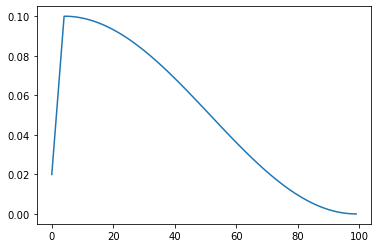

In [6]:
import matplotlib.pyplot as plt
plt.plot(agent.lr_list)

# 60 % drop

In [3]:
total_best = []
total_history = []
for i, seed in enumerate(RandomListOfIntegers):
    config = easydict.EasyDict()
    config.exp_name = "vgg16_exp_cifar100_0"
    config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

    config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
    config.cuda = True
    config.gpu_device = 0
    config.seed = seed
    config.milestones = [10, 20,30,40]
    config.gamma = 0.9
    config.img_size = 32
    config.num_classes = 100
    config.data_mode = "download"
    config.data_loader_workers = 4
    config.pin_memory = True
    config.async_loading = True
    config.batch_size = 128
    config.async_loading = True
    config.max_epoch = 100
    torch.cuda.init()
    
    agent = globals()["VGG_BN_cifar"](config)
    agent.init_graph()
    agent.load_checkpoint(config.load_file)
    agent.compress(method = 'greedy',k=0.65)
    best,history = agent.train(specializing=False, freeze_conv=False,cosine_decay = True)
    total_best.append(best)
    total_history.append(history)
    summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

    

Files already downloaded and verified
num_pruned 23
indices_pruned !!!  [10, 11, 16, 20, 24, 25, 26, 27, 31, 32, 41, 43, 49, 58, 60, 42, 22, 13, 8, 33, 23, 63, 14]
num_pruned 23
indices_pruned !!!  [11, 55, 48, 23, 1, 13, 50, 44, 21, 18, 24, 27, 14, 39, 2, 7, 0, 22, 3, 31, 28, 53, 16]
num_pruned 45
indices_pruned !!!  [1, 116, 73, 7, 127, 74, 105, 99, 23, 101, 97, 84, 57, 100, 47, 56, 33, 69, 75, 42, 109, 71, 113, 25, 32, 120, 4, 12, 59, 103, 62, 16, 22, 10, 65, 14, 9, 18, 3, 79, 60, 61, 38, 40, 95]
num_pruned 45
indices_pruned !!!  [113, 33, 1, 125, 27, 32, 81, 15, 43, 97, 88, 89, 82, 8, 73, 0, 101, 118, 53, 122, 93, 92, 110, 6, 13, 28, 90, 98, 75, 54, 83, 44, 126, 115, 78, 114, 41, 52, 121, 66, 124, 36, 56, 103, 47]
num_pruned 90
indices_pruned !!!  [122, 137, 201, 18, 221, 176, 187, 166, 2, 42, 199, 78, 110, 183, 115, 26, 44, 6, 220, 12, 151, 154, 50, 180, 244, 142, 66, 86, 101, 228, 224, 191, 13, 205, 198, 225, 178, 175, 4, 89, 238, 21, 69, 49, 241, 144, 99, 52, 97, 90, 121, 113, 5

Epoch-0-:   2%|▏         | 6/391 [00:00<01:09,  5.55it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.714241310153776	Top1 Acc: 0.4152000000190735


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.1383233553246606	Top1 Acc: 0.4691


Epoch-1-:   1%|▏         | 5/391 [00:00<01:04,  5.97it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.7698189776266933	Top1 Acc: 0.5261000000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.18795368339442	Top1 Acc: 0.4588


Epoch-2-:   2%|▏         | 6/391 [00:00<01:06,  5.83it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.7801960773785095	Top1 Acc: 0.5235200000572204


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.0814713360388066	Top1 Acc: 0.4715


Epoch-3-:   2%|▏         | 6/391 [00:00<01:18,  4.88it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.7832079278233717	Top1 Acc: 0.5236400000190735


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.125997591622268	Top1 Acc: 0.4731


Epoch-4-:   2%|▏         | 6/391 [00:00<01:10,  5.46it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.8063719083586007	Top1 Acc: 0.51856


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.242990730684015	Top1 Acc: 0.4475


Epoch-5-:   2%|▏         | 6/391 [00:00<01:14,  5.15it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.779773281358392	Top1 Acc: 0.5231600000286102


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.8843189538279665	Top1 Acc: 0.5033


Epoch-6-:   2%|▏         | 6/391 [00:00<01:08,  5.60it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.7232428563525304	Top1 Acc: 0.53394


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.95786516274078	Top1 Acc: 0.4794


Epoch-7-:   2%|▏         | 6/391 [00:00<01:14,  5.17it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.6913905055321696	Top1 Acc: 0.54322


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.7540944633604605	Top1 Acc: 0.5292


Epoch-8-:   2%|▏         | 6/391 [00:00<01:09,  5.53it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.6686271575405776	Top1 Acc: 0.54644


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.068696729744537	Top1 Acc: 0.4811


Epoch-9-:   2%|▏         | 6/391 [00:00<01:08,  5.62it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.6515074398206628	Top1 Acc: 0.54934


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.0308635717705834	Top1 Acc: 0.4786


Epoch-10-:   2%|▏         | 6/391 [00:00<01:09,  5.56it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.6362819391138412	Top1 Acc: 0.5555800000190735


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.2143991974335684	Top1 Acc: 0.4448


Epoch-11-:   2%|▏         | 6/391 [00:00<01:14,  5.18it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.6429307893718905	Top1 Acc: 0.5546799999809265


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.089594883254812	Top1 Acc: 0.4661


Epoch-12-:   2%|▏         | 6/391 [00:00<01:09,  5.57it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.6225037379642886	Top1 Acc: 0.55834


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.751710780059235	Top1 Acc: 0.5307


Epoch-13-:   2%|▏         | 6/391 [00:00<01:15,  5.07it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.6146113061539047	Top1 Acc: 0.5605599999904632


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.061258151561399	Top1 Acc: 0.4762


Epoch-14-:   2%|▏         | 6/391 [00:00<01:02,  6.16it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.6108162936652104	Top1 Acc: 0.5611000000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.2190623947336703	Top1 Acc: 0.4488


Epoch-15-:   2%|▏         | 6/391 [00:00<01:19,  4.84it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.604245173351844	Top1 Acc: 0.56278


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.049075126647949	Top1 Acc: 0.4802


Epoch-16-:   1%|▏         | 5/391 [00:00<01:08,  5.61it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.592479370439144	Top1 Acc: 0.5624600000190735


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 2.016575449629675	Top1 Acc: 0.4871


Epoch-17-:   2%|▏         | 6/391 [00:00<01:07,  5.67it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.595962473803469	Top1 Acc: 0.56556


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.0830776993232436	Top1 Acc: 0.4755


Epoch-18-:   2%|▏         | 6/391 [00:00<01:20,  4.80it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5798833937291294	Top1 Acc: 0.5682


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.9544167699693125	Top1 Acc: 0.4972


Epoch-19-:   2%|▏         | 6/391 [00:00<01:07,  5.73it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.565942644768054	Top1 Acc: 0.57104


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 2.027798918229115	Top1 Acc: 0.4845


Epoch-20-:   2%|▏         | 6/391 [00:00<01:05,  5.92it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.5809468585816795	Top1 Acc: 0.5678999999809266


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 2.16627934914601	Top1 Acc: 0.4686


Epoch-21-:   2%|▏         | 6/391 [00:00<01:08,  5.65it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.5671530818695303	Top1 Acc: 0.5710399999809265


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.8498895968062967	Top1 Acc: 0.5255


Epoch-22-:   2%|▏         | 6/391 [00:00<01:10,  5.46it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.549035952219268	Top1 Acc: 0.577540000038147


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.9171910180321223	Top1 Acc: 0.5105


Epoch-23-:   2%|▏         | 6/391 [00:00<01:05,  5.86it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.5464906658967743	Top1 Acc: 0.5738600000190734


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.7638296613210365	Top1 Acc: 0.5352


Epoch-24-:   2%|▏         | 6/391 [00:00<01:08,  5.59it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.53379327836244	Top1 Acc: 0.57926


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.784103262273571	Top1 Acc: 0.5292


Epoch-25-:   2%|▏         | 6/391 [00:00<01:06,  5.77it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.5172897967536125	Top1 Acc: 0.5813400000572204


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.7756634829919549	Top1 Acc: 0.5345


Epoch-26-:   2%|▏         | 6/391 [00:00<01:14,  5.19it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.5177353056495453	Top1 Acc: 0.5839400000095367


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.8761205416691453	Top1 Acc: 0.5153


Epoch-27-:   2%|▏         | 6/391 [00:00<01:06,  5.78it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.5013698324218125	Top1 Acc: 0.5879800000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.715100710905051	Top1 Acc: 0.5446


Epoch-28-:   2%|▏         | 6/391 [00:00<01:11,  5.37it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.5020093180029594	Top1 Acc: 0.5873799999809265


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.8268166614484183	Top1 Acc: 0.5263


Epoch-29-:   2%|▏         | 6/391 [00:00<01:05,  5.87it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.492228891538537	Top1 Acc: 0.58876


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.8008574700053734	Top1 Acc: 0.5277


Epoch-30-:   2%|▏         | 6/391 [00:00<01:10,  5.48it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4853404455477623	Top1 Acc: 0.5882999999809265


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.676374056671239	Top1 Acc: 0.5538


Epoch-31-:   2%|▏         | 6/391 [00:00<01:10,  5.49it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.4716237265130747	Top1 Acc: 0.59336


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.7896153670323045	Top1 Acc: 0.5355


Epoch-32-:   2%|▏         | 6/391 [00:00<01:10,  5.49it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.4500936757573082	Top1 Acc: 0.5967000000572205


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.6843089393422574	Top1 Acc: 0.5416


Epoch-33-:   2%|▏         | 6/391 [00:00<01:08,  5.58it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.4493392044321045	Top1 Acc: 0.60032


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.9424702472324613	Top1 Acc: 0.509


Epoch-34-:   2%|▏         | 6/391 [00:00<01:12,  5.31it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.4366288307072865	Top1 Acc: 0.6004000000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.6883438418183145	Top1 Acc: 0.5505


Epoch-35-:   2%|▏         | 6/391 [00:00<01:08,  5.62it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.4209347374908758	Top1 Acc: 0.6063999999809265


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.6635749913469147	Top1 Acc: 0.5626


Epoch-36-:   2%|▏         | 6/391 [00:00<01:03,  6.02it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.4115180630818047	Top1 Acc: 0.6070000000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.806553386434724	Top1 Acc: 0.5317


Epoch-37-:   2%|▏         | 6/391 [00:00<01:09,  5.50it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.4069291737378407	Top1 Acc: 0.6103799999809265


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.6973974961268752	Top1 Acc: 0.5542


Epoch-38-:   2%|▏         | 6/391 [00:00<01:15,  5.11it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3783895990732686	Top1 Acc: 0.6163200000572204


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.8176757746104952	Top1 Acc: 0.5304


Epoch-39-:   2%|▏         | 6/391 [00:00<01:13,  5.27it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3746599251656886	Top1 Acc: 0.6169600000190735


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.7526343170600602	Top1 Acc: 0.5374


Epoch-40-:   2%|▏         | 6/391 [00:00<01:05,  5.84it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.361883315283929	Top1 Acc: 0.6209600000190735


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.6759060093119174	Top1 Acc: 0.5596


Epoch-41-:   2%|▏         | 6/391 [00:00<01:11,  5.40it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.3457587623535214	Top1 Acc: 0.6250600000190735


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.732939293112936	Top1 Acc: 0.5452


Epoch-42-:   2%|▏         | 6/391 [00:00<01:06,  5.83it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.3309937372536915	Top1 Acc: 0.628400000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.7724007881140407	Top1 Acc: 0.535


Epoch-43-:   2%|▏         | 6/391 [00:00<01:10,  5.50it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.308690570199581	Top1 Acc: 0.6355400000572204


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.708602716651144	Top1 Acc: 0.5498


Epoch-44-:   2%|▏         | 6/391 [00:00<01:05,  5.89it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.3097906705668516	Top1 Acc: 0.6331000000095367


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.6171334891379634	Top1 Acc: 0.5733


Epoch-45-:   2%|▏         | 6/391 [00:00<01:13,  5.22it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.292425075760278	Top1 Acc: 0.6363800000190735


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.6143328026880193	Top1 Acc: 0.5728


Epoch-46-:   2%|▏         | 6/391 [00:00<01:03,  6.02it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.2706765537066838	Top1 Acc: 0.6417400000190735


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.722173900543889	Top1 Acc: 0.551


Epoch-47-:   2%|▏         | 6/391 [00:00<01:08,  5.65it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.2551548990142314	Top1 Acc: 0.6466799999809265


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.742218631732313	Top1 Acc: 0.5488


Epoch-48-:   2%|▏         | 6/391 [00:00<01:07,  5.69it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.2313876130696757	Top1 Acc: 0.6521800000572204


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6610618633559988	Top1 Acc: 0.5635


Epoch-49-:   2%|▏         | 6/391 [00:00<01:07,  5.72it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.2122854942555927	Top1 Acc: 0.6572


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.6722203870362873	Top1 Acc: 0.5558


Epoch-50-:   2%|▏         | 6/391 [00:00<01:09,  5.53it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.19974789381637	Top1 Acc: 0.6586799999809265


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.6711759235285506	Top1 Acc: 0.5643


Epoch-51-:   2%|▏         | 6/391 [00:00<01:07,  5.72it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1865687531888331	Top1 Acc: 0.66384


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6801764150209064	Top1 Acc: 0.5671


Epoch-52-:   2%|▏         | 6/391 [00:00<01:06,  5.82it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.1632375811676845	Top1 Acc: 0.6704200000572205


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.4945531540279147	Top1 Acc: 0.6012


Epoch-53-:   2%|▏         | 6/391 [00:00<01:02,  6.13it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.1395156244792597	Top1 Acc: 0.6739199999809266


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.6344725829136522	Top1 Acc: 0.5786


Epoch-54-:   2%|▏         | 6/391 [00:00<01:07,  5.67it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.1215451873476854	Top1 Acc: 0.6785800000572204


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.7055543585668635	Top1 Acc: 0.5606


Epoch-55-:   2%|▏         | 6/391 [00:00<01:06,  5.80it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.097530679172262	Top1 Acc: 0.6861599999809265


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.4961606369742864	Top1 Acc: 0.6015


Epoch-56-:   2%|▏         | 6/391 [00:00<01:05,  5.92it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0894138201728196	Top1 Acc: 0.6876599999809265


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.4760755013815965	Top1 Acc: 0.6079


Epoch-57-:   2%|▏         | 6/391 [00:00<01:08,  5.59it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.0516962384628823	Top1 Acc: 0.6973000000190734


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.6421317269530478	Top1 Acc: 0.5801


Epoch-58-:   2%|▏         | 6/391 [00:00<01:09,  5.57it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.042434491769737	Top1 Acc: 0.6989800000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.4828425796726081	Top1 Acc: 0.6064


Epoch-59-:   2%|▏         | 6/391 [00:00<01:08,  5.60it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.013372845814356	Top1 Acc: 0.7054199999809265


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5199952744230438	Top1 Acc: 0.5997


Epoch-60-:   2%|▏         | 6/391 [00:00<01:10,  5.48it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9763714608633914	Top1 Acc: 0.716120000038147


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4327792563015902	Top1 Acc: 0.621


Epoch-61-:   2%|▏         | 6/391 [00:00<01:10,  5.47it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.9650839097664484	Top1 Acc: 0.71724


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.497824662848364	Top1 Acc: 0.6106


Epoch-62-:   2%|▏         | 6/391 [00:00<01:06,  5.82it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.9476744622525657	Top1 Acc: 0.72474


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4272523311120044	Top1 Acc: 0.6296


Epoch-63-:   2%|▏         | 6/391 [00:00<01:14,  5.17it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.9170907549845898	Top1 Acc: 0.7315


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4420713759675812	Top1 Acc: 0.6213


Epoch-64-:   2%|▏         | 6/391 [00:00<01:12,  5.32it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.8903281020996211	Top1 Acc: 0.7383800000572205


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.394620448728151	Top1 Acc: 0.6339


Epoch-65-:   2%|▏         | 6/391 [00:00<01:08,  5.63it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.859040302846133	Top1 Acc: 0.7460199999809265


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.4316413576089884	Top1 Acc: 0.6226


Epoch-66-:   2%|▏         | 6/391 [00:00<01:08,  5.64it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.8325693883249522	Top1 Acc: 0.7552199999809265


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.462265778191482	Top1 Acc: 0.619


Epoch-67-:   2%|▏         | 6/391 [00:00<01:08,  5.59it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.8053921063995118	Top1 Acc: 0.7612000000381469


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.358853583848929	Top1 Acc: 0.6417


Epoch-68-:   2%|▏         | 6/391 [00:00<01:10,  5.45it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.7809421554245912	Top1 Acc: 0.7642400000572205


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3600594069384322	Top1 Acc: 0.6474


Epoch-69-:   2%|▏         | 6/391 [00:00<01:10,  5.50it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.7455699597020893	Top1 Acc: 0.7748


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3568449412720114	Top1 Acc: 0.6479


Epoch-70-:   2%|▏         | 6/391 [00:00<01:06,  5.83it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.7192660642554388	Top1 Acc: 0.7838000000572205


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3694456695001336	Top1 Acc: 0.6498


Epoch-71-:   2%|▏         | 6/391 [00:00<01:11,  5.42it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.686592429723886	Top1 Acc: 0.7927000000190735


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3514175777193866	Top1 Acc: 0.6502


Epoch-72-:   2%|▏         | 6/391 [00:00<01:05,  5.86it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6541320129733561	Top1 Acc: 0.8020200000190735


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.4067540319660041	Top1 Acc: 0.6428


Epoch-73-:   2%|▏         | 6/391 [00:00<01:12,  5.34it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6220194193560754	Top1 Acc: 0.8110599999809265


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.4171024938172931	Top1 Acc: 0.6499


Epoch-74-:   2%|▏         | 6/391 [00:00<01:10,  5.47it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.5843684837946197	Top1 Acc: 0.8207399999809265


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3500268821474872	Top1 Acc: 0.6633


Epoch-75-:   2%|▏         | 6/391 [00:00<01:10,  5.49it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.5576650549078841	Top1 Acc: 0.8272199999809265


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3609588779980624	Top1 Acc: 0.66


Epoch-76-:   2%|▏         | 6/391 [00:00<01:11,  5.42it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.5164373591732796	Top1 Acc: 0.8397999999809265


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.2896498592594001	Top1 Acc: 0.6782


Epoch-77-:   2%|▏         | 6/391 [00:00<01:03,  6.06it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.48813593604832967	Top1 Acc: 0.8486199999809265


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3563133674331858	Top1 Acc: 0.6674


Epoch-78-:   2%|▏         | 6/391 [00:00<01:09,  5.51it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.44276169399776116	Top1 Acc: 0.8603000000572204


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3537278612957726	Top1 Acc: 0.6725


Epoch-79-:   2%|▏         | 6/391 [00:00<01:15,  5.12it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.40426979029117643	Top1 Acc: 0.8735800000572205


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3405218380915969	Top1 Acc: 0.6814


Epoch-80-:   2%|▏         | 6/391 [00:00<01:16,  5.06it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.38149480914215905	Top1 Acc: 0.8812400000190734


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.2847199372098417	Top1 Acc: 0.6913


Epoch-81-:   2%|▏         | 6/391 [00:00<01:06,  5.80it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.3393142087304074	Top1 Acc: 0.8926599999809265


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3435609257673915	Top1 Acc: 0.684


Epoch-82-:   2%|▏         | 6/391 [00:00<01:09,  5.51it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.30798677745682507	Top1 Acc: 0.90472


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3791894890085052	Top1 Acc: 0.679


Epoch-83-:   2%|▏         | 6/391 [00:00<01:09,  5.58it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.2781402972119544	Top1 Acc: 0.91168


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3300640190703958	Top1 Acc: 0.6931


Epoch-84-:   2%|▏         | 6/391 [00:00<01:03,  6.02it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.24629032097356704	Top1 Acc: 0.9224000000381469


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.316524400741239	Top1 Acc: 0.6975


Epoch-85-:   2%|▏         | 6/391 [00:00<01:10,  5.43it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.2186255738367815	Top1 Acc: 0.9318399999809265


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3274443028848382	Top1 Acc: 0.6973


Epoch-86-:   2%|▏         | 6/391 [00:00<01:10,  5.45it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.1925013361836943	Top1 Acc: 0.9388


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.348297746875618	Top1 Acc: 0.6949


Epoch-87-:   2%|▏         | 6/391 [00:00<01:07,  5.67it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.17114620924453297	Top1 Acc: 0.9471600000572205


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3327452676205696	Top1 Acc: 0.7032


Epoch-88-:   2%|▏         | 6/391 [00:00<01:18,  4.89it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.14962599917179178	Top1 Acc: 0.9534400000572204


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3199259253996838	Top1 Acc: 0.709


Epoch-89-:   2%|▏         | 6/391 [00:00<01:15,  5.07it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.13245083707982622	Top1 Acc: 0.959520000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3294677289226386	Top1 Acc: 0.7075


Epoch-90-:   2%|▏         | 6/391 [00:00<01:12,  5.30it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.1164698883738664	Top1 Acc: 0.9648000000190735


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3218520457231546	Top1 Acc: 0.7109


Epoch-91-:   2%|▏         | 6/391 [00:00<01:06,  5.76it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.11166169422933513	Top1 Acc: 0.966440000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3380431495135343	Top1 Acc: 0.7113


Epoch-92-:   2%|▏         | 6/391 [00:00<01:10,  5.48it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.09853892744330646	Top1 Acc: 0.9704800000381469


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3251573782932908	Top1 Acc: 0.7122


Epoch-93-:   2%|▏         | 6/391 [00:00<01:08,  5.60it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.08784469284231552	Top1 Acc: 0.9743400000190735


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.328526791137985	Top1 Acc: 0.7099


Epoch-94-:   2%|▏         | 6/391 [00:00<01:11,  5.42it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.08509796373831952	Top1 Acc: 0.9750199999809265


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3358453225485887	Top1 Acc: 0.7132


Epoch-95-:   2%|▏         | 6/391 [00:00<01:16,  5.06it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.079543068757295	Top1 Acc: 0.9767999999809265


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3350623793239835	Top1 Acc: 0.7135


Epoch-96-:   2%|▏         | 6/391 [00:00<01:14,  5.19it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.07571992575360076	Top1 Acc: 0.9785200000572205


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3388369422924669	Top1 Acc: 0.7145


Epoch-97-:   2%|▏         | 6/391 [00:00<01:02,  6.14it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.07493273697107497	Top1 Acc: 0.978880000038147


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3344275151626974	Top1 Acc: 0.7147


Epoch-98-:   2%|▏         | 6/391 [00:00<01:07,  5.67it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.0742368541486428	Top1 Acc: 0.9788000000381469


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3339452351195902	Top1 Acc: 0.7156


Epoch-99-:   2%|▏         | 6/391 [00:00<01:07,  5.69it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.0754845399800164	Top1 Acc: 0.97758


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 77.33it/s]


Validation results at epoch-99 | loss: 1.3345063690897785	Top1 Acc: 0.7144
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

num_pruned 180
indices_pruned !!!  [398, 168, 56, 154, 217, 467, 155, 175, 350, 2, 244, 200, 504, 300, 321, 67, 19, 412, 68, 184, 421, 21, 357, 181, 178, 320, 400, 305, 441, 79, 73, 487, 82, 245, 119, 242, 384, 22, 347, 297, 26, 115, 215, 455, 33, 312, 76, 302, 239, 38, 443, 476, 492, 364, 105, 468, 104, 173, 48, 256, 499, 431, 349, 8, 100, 114, 493, 98, 46, 218, 329, 334, 260, 469, 343, 4, 325, 285, 252, 375, 144, 461, 91, 422, 303, 157, 77, 108, 125, 60, 503, 121, 471, 475, 506, 126, 428, 447, 498, 480, 122, 147, 510, 112, 353, 415, 65, 437, 143, 58, 202, 18, 111, 284, 336, 191, 424, 6, 192, 483, 458, 127, 55, 116, 23, 280, 425, 265, 11, 124, 392, 246, 94, 75, 399, 96, 511, 401, 85, 293, 138, 449, 388, 9, 466, 231, 362, 385, 292, 348, 132, 90, 322, 182, 439, 470, 102, 226, 369, 269, 289, 1, 190, 394, 241, 368, 301, 413, 160, 416, 463, 478, 140, 141, 166, 99, 266, 454, 462, 206]
num_pruned 180
indices_pruned !!!  [403, 38, 185, 43, 462, 113, 44, 136, 71, 206, 254, 169, 182, 181, 196, 

Epoch-0-:   2%|▏         | 6/391 [00:00<01:08,  5.65it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.7029052341685578	Top1 Acc: 0.42008000002861023


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.079511791844911	Top1 Acc: 0.4785


Epoch-1-:   2%|▏         | 6/391 [00:00<01:11,  5.38it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.7567564276478174	Top1 Acc: 0.5278600000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.4251754781867882	Top1 Acc: 0.4254


Epoch-2-:   2%|▏         | 6/391 [00:00<01:09,  5.53it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.7709458078569769	Top1 Acc: 0.5241800000190735


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.170854956288881	Top1 Acc: 0.4485


Epoch-3-:   2%|▏         | 6/391 [00:00<01:09,  5.51it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.7898180972584679	Top1 Acc: 0.5216800000286103


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.5402817997751357	Top1 Acc: 0.3789


Epoch-4-:   2%|▏         | 6/391 [00:00<01:14,  5.16it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.8066276406388149	Top1 Acc: 0.5171400000572205


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.2985124829449233	Top1 Acc: 0.4341


Epoch-5-:   2%|▏         | 6/391 [00:00<01:08,  5.58it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.7827646564644621	Top1 Acc: 0.5204999999809266


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.9919367017625254	Top1 Acc: 0.488
current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.7211934623815823	Top1 Acc: 0.53324


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.9122939351238781	Top1 Acc: 0.4988


Epoch-7-:   2%|▏         | 6/391 [00:00<01:13,  5.20it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.6845709558033273	Top1 Acc: 0.545780000038147


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.8713359576237352	Top1 Acc: 0.5122


Epoch-8-:   2%|▏         | 6/391 [00:00<01:09,  5.53it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.6695738869249974	Top1 Acc: 0.5471199999809265


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.1320579383946674	Top1 Acc: 0.4565


Epoch-9-:   2%|▏         | 6/391 [00:00<01:11,  5.37it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.6526523673016091	Top1 Acc: 0.5525000000190735


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.9277477022967762	Top1 Acc: 0.4938


Epoch-10-:   2%|▏         | 6/391 [00:00<01:12,  5.28it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.644240342747525	Top1 Acc: 0.5514999999809265


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.9583509858650496	Top1 Acc: 0.4875


Epoch-11-:   2%|▏         | 6/391 [00:00<01:10,  5.45it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.6361677988106027	Top1 Acc: 0.556900000038147


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.011032181450083	Top1 Acc: 0.4834


Epoch-12-:   2%|▏         | 6/391 [00:00<01:14,  5.19it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.6238422412091813	Top1 Acc: 0.5575200000572205


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.8754122076155264	Top1 Acc: 0.5128


Epoch-13-:   2%|▏         | 6/391 [00:00<01:15,  5.08it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.6173933808455991	Top1 Acc: 0.5594400000095368


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.7718200623234617	Top1 Acc: 0.5281


Epoch-14-:   2%|▏         | 6/391 [00:00<01:11,  5.41it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.6154664431691474	Top1 Acc: 0.5601


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.9360322303409818	Top1 Acc: 0.5023


Epoch-15-:   2%|▏         | 6/391 [00:00<01:11,  5.39it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.6000815989721158	Top1 Acc: 0.5627400000572205


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.882495845420451	Top1 Acc: 0.4988


Epoch-16-:   2%|▏         | 6/391 [00:00<01:09,  5.55it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.5925855682329144	Top1 Acc: 0.5672599999904633


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.9089054171043107	Top1 Acc: 0.5008


Epoch-17-:   2%|▏         | 6/391 [00:00<01:11,  5.36it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.5916977498842322	Top1 Acc: 0.5660599999809265


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.7397065011760857	Top1 Acc: 0.5333


Epoch-18-:   2%|▏         | 6/391 [00:00<01:08,  5.64it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5786630720128794	Top1 Acc: 0.5689399999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.8263068772569488	Top1 Acc: 0.5248


Epoch-19-:   2%|▏         | 6/391 [00:00<01:14,  5.17it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.5831978958281105	Top1 Acc: 0.57


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.794212641595285	Top1 Acc: 0.5261


Epoch-20-:   2%|▏         | 6/391 [00:00<01:15,  5.09it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.5682358418584175	Top1 Acc: 0.57236


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.759732528577877	Top1 Acc: 0.5313


Epoch-21-:   2%|▏         | 6/391 [00:00<01:17,  4.97it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.5597370887351463	Top1 Acc: 0.5752800000381469


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.8934997606881057	Top1 Acc: 0.5076


Epoch-22-:   2%|▏         | 6/391 [00:00<01:09,  5.52it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.551881917907149	Top1 Acc: 0.57452


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.9245425960685634	Top1 Acc: 0.5085


Epoch-23-:   2%|▏         | 6/391 [00:00<01:09,  5.56it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.549419175023618	Top1 Acc: 0.576440000038147


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.9017522787745995	Top1 Acc: 0.5005


Epoch-24-:   2%|▏         | 6/391 [00:00<01:13,  5.20it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.5353920438405497	Top1 Acc: 0.578100000038147


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.8935096897656405	Top1 Acc: 0.5065


Epoch-25-:   2%|▏         | 6/391 [00:00<01:08,  5.66it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.530482931820023	Top1 Acc: 0.5797200000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.7564743183836151	Top1 Acc: 0.5353


Epoch-26-:   2%|▏         | 6/391 [00:00<01:08,  5.59it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.5177400163982226	Top1 Acc: 0.5821799999809265


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.9926001648359661	Top1 Acc: 0.4965
current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.5093254939369534	Top1 Acc: 0.58488


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.9814648975299884	Top1 Acc: 0.4933


Epoch-28-:   2%|▏         | 6/391 [00:00<01:12,  5.32it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.499183781006757	Top1 Acc: 0.5895599999809266


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 2.0503930683377423	Top1 Acc: 0.483


Epoch-29-:   2%|▏         | 6/391 [00:00<01:09,  5.57it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.490263252307082	Top1 Acc: 0.588900000038147


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.9543594076663633	Top1 Acc: 0.4954


Epoch-30-:   2%|▏         | 6/391 [00:00<01:11,  5.35it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4760696301070015	Top1 Acc: 0.5927799999809266


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.9260148655010174	Top1 Acc: 0.5031


Epoch-31-:   2%|▏         | 6/391 [00:00<01:07,  5.71it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.4681463717194774	Top1 Acc: 0.5948800000190735


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.9690864282318308	Top1 Acc: 0.5


Epoch-32-:   2%|▏         | 6/391 [00:00<01:15,  5.11it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.460182733852845	Top1 Acc: 0.5964


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.7414358069625082	Top1 Acc: 0.5435


Epoch-33-:   2%|▏         | 6/391 [00:00<01:15,  5.12it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.443268318310418	Top1 Acc: 0.6027599999809266


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.6605457791799232	Top1 Acc: 0.5565


Epoch-34-:   2%|▏         | 6/391 [00:00<01:06,  5.79it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.4321935115872746	Top1 Acc: 0.60256


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.9287668511837344	Top1 Acc: 0.5092


Epoch-35-:   2%|▏         | 6/391 [00:00<01:17,  4.96it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.4314944695328813	Top1 Acc: 0.6035599999809265


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.6799620223950735	Top1 Acc: 0.5505


Epoch-36-:   2%|▏         | 6/391 [00:00<01:12,  5.33it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.4139695051685928	Top1 Acc: 0.6062


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.661524003065085	Top1 Acc: 0.5539


Epoch-37-:   2%|▏         | 6/391 [00:00<01:13,  5.20it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.3913544044470239	Top1 Acc: 0.6133400000381469


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.8325981822194932	Top1 Acc: 0.5172


Epoch-38-:   2%|▏         | 6/391 [00:00<01:12,  5.30it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.374767795090785	Top1 Acc: 0.61792


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.7121262565443787	Top1 Acc: 0.5537


Epoch-39-:   2%|▏         | 6/391 [00:00<01:08,  5.61it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3718329823535422	Top1 Acc: 0.6183799999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.838458516929723	Top1 Acc: 0.5255


Epoch-40-:   2%|▏         | 6/391 [00:00<01:12,  5.34it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.3580343619636868	Top1 Acc: 0.62288


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.8869778717620462	Top1 Acc: 0.5223


Epoch-41-:   2%|▏         | 6/391 [00:00<01:18,  4.89it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.3400031704731914	Top1 Acc: 0.62458


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.62013512623461	Top1 Acc: 0.5611


Epoch-42-:   2%|▏         | 6/391 [00:00<01:08,  5.65it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.337503048160192	Top1 Acc: 0.6267000000572205


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.7088934077492244	Top1 Acc: 0.5529


Epoch-43-:   2%|▏         | 6/391 [00:00<01:06,  5.82it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.3053383917149985	Top1 Acc: 0.6354


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.6339031488080569	Top1 Acc: 0.5624


Epoch-44-:   2%|▏         | 6/391 [00:00<01:08,  5.62it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.294147065685838	Top1 Acc: 0.6377400000190735


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.747784332384037	Top1 Acc: 0.5512


Epoch-45-:   2%|▏         | 6/391 [00:00<01:09,  5.50it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2885980834741422	Top1 Acc: 0.6378


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.6660122056550617	Top1 Acc: 0.567


Epoch-46-:   2%|▏         | 6/391 [00:00<01:09,  5.57it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.262608526155467	Top1 Acc: 0.64388


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.6038306785535208	Top1 Acc: 0.5763


Epoch-47-:   2%|▏         | 6/391 [00:00<01:11,  5.37it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.2603494819167935	Top1 Acc: 0.6458799999809265


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5856197785727586	Top1 Acc: 0.5863


Epoch-48-:   2%|▏         | 6/391 [00:00<01:15,  5.07it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.2417309041828146	Top1 Acc: 0.64938


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5720284649088412	Top1 Acc: 0.5812


Epoch-49-:   2%|▏         | 6/391 [00:00<01:10,  5.44it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.2204321072534527	Top1 Acc: 0.653960000038147


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.592306171791463	Top1 Acc: 0.5792


Epoch-50-:   2%|▏         | 6/391 [00:00<01:04,  5.98it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.190250060290022	Top1 Acc: 0.6612000000190735


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.506601869305478	Top1 Acc: 0.5903


Epoch-51-:   2%|▏         | 6/391 [00:00<01:08,  5.64it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1783566558757401	Top1 Acc: 0.66454


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6046851948846745	Top1 Acc: 0.5821


Epoch-52-:   2%|▏         | 6/391 [00:00<01:09,  5.55it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.1639170152756868	Top1 Acc: 0.6673999999809265


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.7433350252199777	Top1 Acc: 0.5581


Epoch-53-:   2%|▏         | 6/391 [00:00<01:14,  5.16it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.1374533807530123	Top1 Acc: 0.673600000038147


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.4779572803762895	Top1 Acc: 0.6036


Epoch-54-:   2%|▏         | 6/391 [00:00<01:19,  4.84it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.12510398220833	Top1 Acc: 0.6766800000572205


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.527687716333172	Top1 Acc: 0.5974


Epoch-55-:   2%|▏         | 6/391 [00:00<01:08,  5.66it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.103308877371766	Top1 Acc: 0.6838000000572204


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5418647452245784	Top1 Acc: 0.5974


Epoch-56-:   2%|▏         | 6/391 [00:00<01:13,  5.25it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0812586202950734	Top1 Acc: 0.6911000000572205


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.461665248569054	Top1 Acc: 0.6107


Epoch-57-:   2%|▏         | 6/391 [00:00<01:12,  5.28it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.0608540529485249	Top1 Acc: 0.6939600000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.4845718296268318	Top1 Acc: 0.6054


Epoch-58-:   2%|▏         | 6/391 [00:00<01:08,  5.61it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.0438581442893924	Top1 Acc: 0.6984999999809265


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.3891225502460818	Top1 Acc: 0.6266


Epoch-59-:   2%|▏         | 6/391 [00:00<01:05,  5.90it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.0157575621019543	Top1 Acc: 0.7039200000381469


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.4933903473841994	Top1 Acc: 0.6039


Epoch-60-:   2%|▏         | 6/391 [00:00<01:14,  5.17it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9914598478685559	Top1 Acc: 0.711980000038147


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4557992521720597	Top1 Acc: 0.6181


Epoch-61-:   2%|▏         | 6/391 [00:00<01:11,  5.40it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.9678846683038775	Top1 Acc: 0.71674


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.3655926743640174	Top1 Acc: 0.6272


Epoch-62-:   2%|▏         | 6/391 [00:00<01:10,  5.45it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.9424021498626455	Top1 Acc: 0.7264200000572204


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4886935421183138	Top1 Acc: 0.612


Epoch-63-:   2%|▏         | 6/391 [00:00<01:08,  5.64it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.9201955296804228	Top1 Acc: 0.7298399999809265


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.3819950139975246	Top1 Acc: 0.6332


Epoch-64-:   2%|▏         | 6/391 [00:00<01:14,  5.15it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.8929833717968153	Top1 Acc: 0.7373800000190734


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4838385853586318	Top1 Acc: 0.6118


Epoch-65-:   2%|▏         | 6/391 [00:00<01:13,  5.25it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.8713435786764335	Top1 Acc: 0.7423


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.455825080599966	Top1 Acc: 0.6222


Epoch-66-:   2%|▏         | 6/391 [00:00<01:11,  5.41it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.828696976156186	Top1 Acc: 0.75078


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4021450854554962	Top1 Acc: 0.6352


Epoch-67-:   2%|▏         | 6/391 [00:00<01:11,  5.39it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.8044039657353745	Top1 Acc: 0.7595


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.386949161185494	Top1 Acc: 0.6374


Epoch-68-:   2%|▏         | 6/391 [00:00<01:07,  5.74it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.7771918810237094	Top1 Acc: 0.7679400000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3603241036209879	Top1 Acc: 0.6417


Epoch-69-:   2%|▏         | 6/391 [00:00<01:10,  5.47it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.748776867947615	Top1 Acc: 0.77518


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3925055642671222	Top1 Acc: 0.6431


Epoch-70-:   2%|▏         | 6/391 [00:00<01:10,  5.47it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.7211189817284684	Top1 Acc: 0.78262


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.361171608484244	Top1 Acc: 0.648


Epoch-71-:   2%|▏         | 6/391 [00:00<01:14,  5.18it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.6833220178361439	Top1 Acc: 0.7928600000572205


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3595280345482161	Top1 Acc: 0.6518


Epoch-72-:   2%|▏         | 6/391 [00:00<01:09,  5.55it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6562917442882762	Top1 Acc: 0.800460000038147


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.327919732920731	Top1 Acc: 0.6588


Epoch-73-:   2%|▏         | 6/391 [00:00<01:06,  5.81it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6279232093440298	Top1 Acc: 0.8098000000190735


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.2807855930509446	Top1 Acc: 0.6668


Epoch-74-:   2%|▏         | 6/391 [00:00<01:11,  5.38it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.5894458859472933	Top1 Acc: 0.81864


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.343691435041307	Top1 Acc: 0.6586


Epoch-75-:   2%|▏         | 6/391 [00:00<01:12,  5.30it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.5534029341567203	Top1 Acc: 0.8291600000381469


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3328559119490129	Top1 Acc: 0.6599


Epoch-76-:   2%|▏         | 6/391 [00:00<01:18,  4.87it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.5239987973971745	Top1 Acc: 0.83754


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3038146043125587	Top1 Acc: 0.6722


Epoch-77-:   2%|▏         | 6/391 [00:00<01:13,  5.23it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.4757178462374851	Top1 Acc: 0.852400000038147


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3310089548931847	Top1 Acc: 0.676


Epoch-78-:   2%|▏         | 6/391 [00:00<01:10,  5.50it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.4497801325738887	Top1 Acc: 0.8608199999809265


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3139435739456853	Top1 Acc: 0.6771


Epoch-79-:   2%|▏         | 6/391 [00:00<01:09,  5.50it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.4167038836442601	Top1 Acc: 0.868420000038147


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3106585054457942	Top1 Acc: 0.683


Epoch-80-:   2%|▏         | 6/391 [00:00<01:08,  5.61it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.3845528611136824	Top1 Acc: 0.877600000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3383576711521874	Top1 Acc: 0.6849


Epoch-81-:   2%|▏         | 6/391 [00:00<01:13,  5.26it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.3438798664780834	Top1 Acc: 0.8907200000572204


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3191957104055188	Top1 Acc: 0.6883


Epoch-82-:   2%|▏         | 6/391 [00:00<01:06,  5.78it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.3099169400913636	Top1 Acc: 0.9021799999809265


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.284142917470087	Top1 Acc: 0.6971


Epoch-83-:   2%|▏         | 6/391 [00:00<01:19,  4.82it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.27673585263207134	Top1 Acc: 0.9126200000572204


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.285611612132833	Top1 Acc: 0.7026


Epoch-84-:   2%|▏         | 6/391 [00:00<01:03,  6.05it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.24688116129478224	Top1 Acc: 0.9217799999809265


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3161275047290175	Top1 Acc: 0.7049


Epoch-85-:   2%|▏         | 6/391 [00:00<01:12,  5.28it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.22150282698976415	Top1 Acc: 0.9294600000190735


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3131326052206982	Top1 Acc: 0.7069


Epoch-86-:   2%|▏         | 6/391 [00:00<01:14,  5.15it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.18794642794696267	Top1 Acc: 0.9408400000572205


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3055972449387176	Top1 Acc: 0.7102


Epoch-87-:   2%|▏         | 6/391 [00:00<01:05,  5.84it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.1696721813867769	Top1 Acc: 0.9466400000572205


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.319686363769483	Top1 Acc: 0.7075


Epoch-88-:   2%|▏         | 6/391 [00:00<01:09,  5.51it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.14858767384534602	Top1 Acc: 0.9526400000572205


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3250602234767963	Top1 Acc: 0.7122


Epoch-89-:   2%|▏         | 6/391 [00:00<01:13,  5.26it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.1362713496188831	Top1 Acc: 0.95828


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3246526967121075	Top1 Acc: 0.7118


Epoch-90-:   2%|▏         | 6/391 [00:00<01:19,  4.83it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.12001041240056458	Top1 Acc: 0.9632199999809266


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3243577518040621	Top1 Acc: 0.713


Epoch-91-:   2%|▏         | 6/391 [00:00<01:08,  5.62it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.10459422130051933	Top1 Acc: 0.9682400000190735


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3240262134165703	Top1 Acc: 0.7128


Epoch-92-:   2%|▏         | 6/391 [00:00<01:14,  5.16it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.09922787226984263	Top1 Acc: 0.970640000038147


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3255501495131963	Top1 Acc: 0.7154


Epoch-93-:   2%|▏         | 6/391 [00:00<01:11,  5.42it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.09234286500784138	Top1 Acc: 0.9728800000190735


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3195159442817108	Top1 Acc: 0.7183


Epoch-94-:   2%|▏         | 6/391 [00:00<01:10,  5.49it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.08513869712953373	Top1 Acc: 0.97532


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3179460288603095	Top1 Acc: 0.7205


Epoch-95-:   2%|▏         | 6/391 [00:00<01:16,  5.05it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.08092153145243293	Top1 Acc: 0.976220000038147


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.316146814370457	Top1 Acc: 0.7228


Epoch-96-:   2%|▏         | 6/391 [00:00<01:15,  5.08it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.07737598099443309	Top1 Acc: 0.9778799999809266


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3144432570360884	Top1 Acc: 0.7206


Epoch-97-:   2%|▏         | 6/391 [00:00<01:18,  4.88it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.07479797740993292	Top1 Acc: 0.97908


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3165932916387726	Top1 Acc: 0.7237


Epoch-98-:   2%|▏         | 6/391 [00:00<01:06,  5.78it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.07536060898028829	Top1 Acc: 0.9790000000572204


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3141074867188176	Top1 Acc: 0.7223


Epoch-99-:   2%|▏         | 6/391 [00:00<01:09,  5.56it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.07232414629510449	Top1 Acc: 0.9788800000572204


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 81.09it/s]


Validation results at epoch-99 | loss: 1.3158037496518484	Top1 Acc: 0.7245
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

num_pruned 180
indices_pruned !!!  [154, 168, 421, 398, 19, 467, 300, 441, 1, 184, 343, 26, 350, 321, 105, 22, 175, 503, 115, 412, 244, 400, 155, 114, 305, 82, 91, 256, 245, 443, 195, 312, 38, 121, 173, 280, 56, 498, 431, 48, 218, 334, 357, 112, 469, 55, 427, 162, 104, 285, 455, 457, 2, 157, 143, 190, 147, 268, 329, 493, 415, 203, 495, 284, 63, 422, 292, 60, 191, 475, 260, 67, 353, 99, 259, 68, 181, 119, 29, 369, 302, 27, 215, 6, 384, 75, 39, 306, 347, 237, 144, 18, 160, 10, 178, 466, 33, 477, 318, 90, 492, 141, 85, 410, 176, 217, 241, 461, 468, 79, 444, 4, 439, 379, 454, 132, 394, 117, 192, 424, 207, 505, 200, 297, 511, 202, 480, 58, 186, 458, 485, 8, 76, 463, 348, 122, 148, 219, 142, 163, 108, 437, 322, 52, 303, 470, 124, 414, 166, 151, 287, 210, 32, 17, 510, 434, 310, 408, 252, 375, 182, 331, 320, 42, 138, 293, 478, 116, 50, 205, 238, 77, 140, 246, 474, 135, 336, 387, 392, 362]
num_pruned 180
indices_pruned !!!  [38, 403, 185, 136, 113, 462, 43, 65, 71, 182, 470, 211, 206, 367, 412,

Epoch-0-:   2%|▏         | 6/391 [00:00<01:13,  5.22it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.7028938544070935	Top1 Acc: 0.41811999999046323


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.0888547640812547	Top1 Acc: 0.4669


Epoch-1-:   2%|▏         | 6/391 [00:00<01:09,  5.57it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.7451252525724719	Top1 Acc: 0.5357600000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.173079646086391	Top1 Acc: 0.4676


Epoch-2-:   1%|▏         | 5/391 [00:00<01:04,  5.98it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.7876756127228213	Top1 Acc: 0.5218399999809266


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.1053092404256892	Top1 Acc: 0.4625


Epoch-3-:   2%|▏         | 6/391 [00:00<01:07,  5.72it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.7852975017274433	Top1 Acc: 0.5240399999809265


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.1579557596882686	Top1 Acc: 0.4519


Epoch-4-:   2%|▏         | 6/391 [00:00<01:14,  5.17it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.7936409830742175	Top1 Acc: 0.5208799999809265


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.2988351070428195	Top1 Acc: 0.4327


Epoch-5-:   2%|▏         | 6/391 [00:00<01:10,  5.46it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.7800035458391585	Top1 Acc: 0.5236399999809265


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.113080866729157	Top1 Acc: 0.4591


Epoch-6-:   2%|▏         | 6/391 [00:00<01:08,  5.60it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.7166975879913096	Top1 Acc: 0.53868


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.123778847199452	Top1 Acc: 0.4667


Epoch-7-:   2%|▏         | 6/391 [00:00<01:11,  5.42it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.6863241567636085	Top1 Acc: 0.5444200000190735


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.037269540979892	Top1 Acc: 0.4796


Epoch-8-:   2%|▏         | 6/391 [00:00<01:09,  5.57it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.666246996511279	Top1 Acc: 0.5498599999809265


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.9409811330747	Top1 Acc: 0.4993


Epoch-9-:   2%|▏         | 6/391 [00:00<01:17,  4.96it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.6513338092038088	Top1 Acc: 0.5519600000095367


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.160270514367502	Top1 Acc: 0.4656


Epoch-10-:   2%|▏         | 6/391 [00:00<01:09,  5.52it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.6518297213727555	Top1 Acc: 0.5543399999904632


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.8544229932978182	Top1 Acc: 0.5076


Epoch-11-:   2%|▏         | 6/391 [00:00<01:05,  5.86it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.6350070046037055	Top1 Acc: 0.5544600000572204


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.8556333478493026	Top1 Acc: 0.5234


Epoch-12-:   2%|▏         | 6/391 [00:00<01:09,  5.51it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.6276151313806129	Top1 Acc: 0.5573600000572204


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.9252514854262146	Top1 Acc: 0.5007


Epoch-13-:   2%|▏         | 6/391 [00:00<01:11,  5.35it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.611360358155292	Top1 Acc: 0.5638199999904633


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.9316775451732586	Top1 Acc: 0.5006


Epoch-14-:   2%|▏         | 6/391 [00:00<01:08,  5.60it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.610589323751152	Top1 Acc: 0.563420000038147


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.9377187188667586	Top1 Acc: 0.4975


Epoch-15-:   2%|▏         | 6/391 [00:00<01:05,  5.87it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.6016835992598473	Top1 Acc: 0.562960000038147


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.0908045466942125	Top1 Acc: 0.4794


Epoch-16-:   2%|▏         | 6/391 [00:00<01:09,  5.56it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.5939955629046312	Top1 Acc: 0.5669400000572205


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.8998402930513214	Top1 Acc: 0.5125


Epoch-17-:   2%|▏         | 6/391 [00:00<01:08,  5.58it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.5884490818013925	Top1 Acc: 0.5664200000572205


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.907126260709159	Top1 Acc: 0.5065


Epoch-18-:   2%|▏         | 6/391 [00:00<01:13,  5.27it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5829258263873323	Top1 Acc: 0.569480000038147


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 2.0543307413028766	Top1 Acc: 0.4736


Epoch-19-:   2%|▏         | 6/391 [00:00<01:11,  5.40it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.5682945495371319	Top1 Acc: 0.5740200000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.9515266871150536	Top1 Acc: 0.4977


Epoch-20-:   2%|▏         | 6/391 [00:00<01:11,  5.38it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.567658387181704	Top1 Acc: 0.5726800000572204


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.8414114215705968	Top1 Acc: 0.5204


Epoch-21-:   2%|▏         | 6/391 [00:00<01:09,  5.51it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.5611383603966755	Top1 Acc: 0.57282


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.8525103466420234	Top1 Acc: 0.5179


Epoch-22-:   2%|▏         | 6/391 [00:00<01:18,  4.90it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.560505803283828	Top1 Acc: 0.574560000038147


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.940370040603831	Top1 Acc: 0.4899


Epoch-23-:   2%|▏         | 6/391 [00:00<01:10,  5.46it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.551456557210449	Top1 Acc: 0.5771999999904632


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.840459034412722	Top1 Acc: 0.5144


Epoch-24-:   2%|▏         | 6/391 [00:00<01:07,  5.67it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.535829854438372	Top1 Acc: 0.5791000000095368


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 2.2411594843562646	Top1 Acc: 0.4518


Epoch-25-:   2%|▏         | 6/391 [00:00<01:10,  5.44it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.532268824784652	Top1 Acc: 0.5797599999809265


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 2.3156261836426166	Top1 Acc: 0.4525


Epoch-26-:   2%|▏         | 6/391 [00:00<01:12,  5.31it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.5112262147161968	Top1 Acc: 0.5861000000572204


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.798247507855862	Top1 Acc: 0.5374


Epoch-27-:   2%|▏         | 6/391 [00:00<01:10,  5.44it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.5101476249182622	Top1 Acc: 0.5866000000572205


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.7849397764930242	Top1 Acc: 0.5301


Epoch-28-:   2%|▏         | 6/391 [00:00<01:06,  5.77it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.4986662962247648	Top1 Acc: 0.5878199999809265


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.86066473435752	Top1 Acc: 0.521


Epoch-29-:   2%|▏         | 6/391 [00:00<01:07,  5.68it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.4952632463191782	Top1 Acc: 0.5876000000190735


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.840494077416915	Top1 Acc: 0.5255


Epoch-30-:   2%|▏         | 6/391 [00:00<01:06,  5.80it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4807704400528423	Top1 Acc: 0.5924000000190734


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.9239655416223067	Top1 Acc: 0.504


Epoch-31-:   2%|▏         | 6/391 [00:00<01:17,  4.95it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.473427789595426	Top1 Acc: 0.5915200000190735


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.8445764704595637	Top1 Acc: 0.5201


Epoch-32-:   2%|▏         | 6/391 [00:00<01:11,  5.40it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.4512236557348306	Top1 Acc: 0.5999000000572204


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.6455632946159267	Top1 Acc: 0.5519


Epoch-33-:   2%|▏         | 6/391 [00:00<01:15,  5.13it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.4443657983599416	Top1 Acc: 0.6013200000572204


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.8010199311413342	Top1 Acc: 0.5279


Epoch-34-:   2%|▏         | 6/391 [00:00<01:09,  5.52it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.4400531038298936	Top1 Acc: 0.60206


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.910245786739301	Top1 Acc: 0.5132


Epoch-35-:   2%|▏         | 6/391 [00:00<01:11,  5.42it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.4281528593634096	Top1 Acc: 0.6062200000572204


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.5349799454966677	Top1 Acc: 0.5777


Epoch-36-:   2%|▏         | 6/391 [00:00<01:08,  5.60it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.4180103746216621	Top1 Acc: 0.60686


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.6603865955449357	Top1 Acc: 0.5554


Epoch-37-:   2%|▏         | 6/391 [00:00<01:05,  5.90it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.3970837862900152	Top1 Acc: 0.61036


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.777495723736437	Top1 Acc: 0.5285


Epoch-38-:   2%|▏         | 6/391 [00:00<01:11,  5.41it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3915928586974473	Top1 Acc: 0.6142799999809265


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.6959757759601255	Top1 Acc: 0.5496


Epoch-39-:   2%|▏         | 6/391 [00:00<01:12,  5.34it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3676464490573426	Top1 Acc: 0.619140000038147


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.6620941599713097	Top1 Acc: 0.5631


Epoch-40-:   2%|▏         | 6/391 [00:00<01:12,  5.32it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.3561211492094543	Top1 Acc: 0.621540000038147


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.7321617950367023	Top1 Acc: 0.5493


Epoch-41-:   2%|▏         | 6/391 [00:00<01:11,  5.38it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.3537445240618322	Top1 Acc: 0.62166


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.6865249857117859	Top1 Acc: 0.5575


Epoch-42-:   2%|▏         | 6/391 [00:00<01:11,  5.41it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.3410902779425502	Top1 Acc: 0.625400000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.529435980169079	Top1 Acc: 0.5856


Epoch-43-:   2%|▏         | 6/391 [00:00<01:13,  5.22it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.3136363488329037	Top1 Acc: 0.6340000000190735


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.806434768664686	Top1 Acc: 0.533


Epoch-44-:   2%|▏         | 6/391 [00:00<01:14,  5.17it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.304386536636011	Top1 Acc: 0.6322599999809265


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.6224099835263024	Top1 Acc: 0.5699


Epoch-45-:   2%|▏         | 6/391 [00:00<01:09,  5.54it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2893239916742916	Top1 Acc: 0.6368599999809265


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.536209221127667	Top1 Acc: 0.5888


Epoch-46-:   2%|▏         | 6/391 [00:00<01:10,  5.50it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.253169965103764	Top1 Acc: 0.647360000038147


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.6770191811308075	Top1 Acc: 0.5696


Epoch-47-:   2%|▏         | 6/391 [00:00<01:08,  5.59it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.2559372631790082	Top1 Acc: 0.6476000000190735


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.7497269911102102	Top1 Acc: 0.5496


Epoch-48-:   2%|▏         | 6/391 [00:00<01:03,  6.03it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.2402090835754218	Top1 Acc: 0.6514600000190734


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5843457285361955	Top1 Acc: 0.5774


Epoch-49-:   2%|▏         | 6/391 [00:00<01:06,  5.82it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.2154975788062796	Top1 Acc: 0.65578


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5823436809491507	Top1 Acc: 0.5831


Epoch-50-:   2%|▏         | 6/391 [00:00<01:05,  5.91it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.2023707259341578	Top1 Acc: 0.6582400000572205


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.696643382688112	Top1 Acc: 0.5654


Epoch-51-:   2%|▏         | 6/391 [00:00<01:08,  5.66it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1851255347966538	Top1 Acc: 0.664900000038147


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.603721727298785	Top1 Acc: 0.5748


Epoch-52-:   2%|▏         | 6/391 [00:00<01:15,  5.07it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.164108053192763	Top1 Acc: 0.667880000038147


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5843030252034151	Top1 Acc: 0.5848


Epoch-53-:   2%|▏         | 6/391 [00:00<01:08,  5.61it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.1361161520718919	Top1 Acc: 0.6773400000572205


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.483379222169707	Top1 Acc: 0.5996


Epoch-54-:   2%|▏         | 6/391 [00:00<01:08,  5.58it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.1253331593235436	Top1 Acc: 0.6773


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5241628870179382	Top1 Acc: 0.5967


Epoch-55-:   2%|▏         | 6/391 [00:00<01:16,  5.05it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.1052546960008724	Top1 Acc: 0.682600000038147


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.4700006548362443	Top1 Acc: 0.6144


Epoch-56-:   2%|▏         | 6/391 [00:00<01:15,  5.12it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0852311184948973	Top1 Acc: 0.6875999999809265


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5160966492906403	Top1 Acc: 0.5989


Epoch-57-:   2%|▏         | 6/391 [00:00<01:16,  5.00it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.0574934592332377	Top1 Acc: 0.694680000038147


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.4168951375575005	Top1 Acc: 0.6187


Epoch-58-:   2%|▏         | 6/391 [00:00<01:10,  5.47it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.0304203169120243	Top1 Acc: 0.70298


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.678421749344355	Top1 Acc: 0.5653


Epoch-59-:   2%|▏         | 6/391 [00:00<01:05,  5.92it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.01489256135643	Top1 Acc: 0.7056800000190735


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.439033580731742	Top1 Acc: 0.6154


Epoch-60-:   2%|▏         | 6/391 [00:00<01:19,  4.83it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9865440970186687	Top1 Acc: 0.7139200000381469


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.550673281090169	Top1 Acc: 0.599


Epoch-61-:   2%|▏         | 6/391 [00:00<01:17,  5.00it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.9633224644624364	Top1 Acc: 0.720940000038147


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.4445467153681983	Top1 Acc: 0.6192


Epoch-62-:   2%|▏         | 6/391 [00:00<01:05,  5.88it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.9420806082618206	Top1 Acc: 0.72384


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.410921552513219	Top1 Acc: 0.6328


Epoch-63-:   2%|▏         | 6/391 [00:00<01:11,  5.39it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.9177756146396823	Top1 Acc: 0.7322999999809265


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4833911446076404	Top1 Acc: 0.6146


Epoch-64-:   2%|▏         | 6/391 [00:00<01:15,  5.12it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.8912176889226869	Top1 Acc: 0.7381600000190734


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5306630889071693	Top1 Acc: 0.609


Epoch-65-:   2%|▏         | 6/391 [00:00<01:10,  5.43it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.8632914320282314	Top1 Acc: 0.74406


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3546975481359265	Top1 Acc: 0.6409


Epoch-66-:   2%|▏         | 6/391 [00:00<01:11,  5.35it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.8311697749225685	Top1 Acc: 0.75468


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.3817373257649095	Top1 Acc: 0.6394


Epoch-67-:   2%|▏         | 6/391 [00:00<01:12,  5.32it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.8125856317522581	Top1 Acc: 0.76168


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3403030234047129	Top1 Acc: 0.6443


Epoch-68-:   2%|▏         | 6/391 [00:00<01:06,  5.75it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.7821114214942279	Top1 Acc: 0.766300000038147


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3752373570128331	Top1 Acc: 0.642
current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.745147143102363	Top1 Acc: 0.775660000038147


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.369529533989822	Top1 Acc: 0.65


Epoch-70-:   2%|▏         | 6/391 [00:00<01:09,  5.52it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.7169670611238845	Top1 Acc: 0.7818200000572204


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.4082316054573543	Top1 Acc: 0.6392


Epoch-71-:   2%|▏         | 6/391 [00:00<01:15,  5.11it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.678966894479054	Top1 Acc: 0.79328


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3741032669815836	Top1 Acc: 0.6538


Epoch-72-:   2%|▏         | 6/391 [00:00<01:08,  5.63it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6573624161960524	Top1 Acc: 0.80074


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3373591160472436	Top1 Acc: 0.6591


Epoch-73-:   2%|▏         | 6/391 [00:00<01:11,  5.36it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6284012718273856	Top1 Acc: 0.8089400000572204


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3556600039518332	Top1 Acc: 0.6603


Epoch-74-:   2%|▏         | 6/391 [00:00<01:11,  5.37it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.5870174039202882	Top1 Acc: 0.8198000000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3498501506032823	Top1 Acc: 0.659


Epoch-75-:   2%|▏         | 6/391 [00:00<01:15,  5.11it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.5598016802002402	Top1 Acc: 0.8274400000572204


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3032057096686545	Top1 Acc: 0.67


Epoch-76-:   2%|▏         | 6/391 [00:00<01:10,  5.48it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.5235857472700232	Top1 Acc: 0.8375599999809266


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3387032045593745	Top1 Acc: 0.669


Epoch-77-:   2%|▏         | 6/391 [00:00<01:08,  5.65it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.47829464020783946	Top1 Acc: 0.8514199999809265


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.335076110272468	Top1 Acc: 0.672


Epoch-78-:   2%|▏         | 6/391 [00:00<01:13,  5.23it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.4510596791268005	Top1 Acc: 0.8577800000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3600822453257404	Top1 Acc: 0.6715


Epoch-79-:   2%|▏         | 6/391 [00:00<01:12,  5.30it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.4181492695265719	Top1 Acc: 0.8705200000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.282150780852837	Top1 Acc: 0.6842


Epoch-80-:   2%|▏         | 6/391 [00:00<01:03,  6.08it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.3742484787998297	Top1 Acc: 0.8826600000572205


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.312824474105352	Top1 Acc: 0.687


Epoch-81-:   2%|▏         | 6/391 [00:00<01:07,  5.70it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.3473589182128687	Top1 Acc: 0.8890000000190735


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3435069269771818	Top1 Acc: 0.6836


Epoch-82-:   2%|▏         | 6/391 [00:00<01:14,  5.18it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.31004294202379556	Top1 Acc: 0.9011200000572205


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3183631067034565	Top1 Acc: 0.691


Epoch-83-:   2%|▏         | 6/391 [00:00<01:11,  5.40it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.27746369621104294	Top1 Acc: 0.9119600000572204


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.313336020783533	Top1 Acc: 0.6947


Epoch-84-:   2%|▏         | 6/391 [00:00<01:02,  6.17it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.250320818894507	Top1 Acc: 0.9201800000381469


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3477098323121857	Top1 Acc: 0.6907


Epoch-85-:   2%|▏         | 6/391 [00:00<01:09,  5.50it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.22533677785140474	Top1 Acc: 0.927640000038147


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3213199618496472	Top1 Acc: 0.6981


Epoch-86-:   2%|▏         | 6/391 [00:00<01:05,  5.89it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.19724156303555154	Top1 Acc: 0.938360000038147


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3327035398422917	Top1 Acc: 0.7015


Epoch-87-:   2%|▏         | 6/391 [00:00<01:13,  5.21it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.17098570212988598	Top1 Acc: 0.947340000038147


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3149885467336149	Top1 Acc: 0.7098


Epoch-88-:   2%|▏         | 6/391 [00:00<01:09,  5.55it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.14836106538925026	Top1 Acc: 0.9521000000572205


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3280545782439317	Top1 Acc: 0.7137


Epoch-89-:   2%|▏         | 6/391 [00:00<01:11,  5.40it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.1371825000133051	Top1 Acc: 0.9576600000190735


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3216186090360713	Top1 Acc: 0.7136


Epoch-90-:   2%|▏         | 6/391 [00:00<01:13,  5.25it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.12351753358798259	Top1 Acc: 0.9628600000572205


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3299510478973389	Top1 Acc: 0.7114


Epoch-91-:   2%|▏         | 6/391 [00:00<01:11,  5.40it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.10907923470220297	Top1 Acc: 0.9671800000190734


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3269478180740453	Top1 Acc: 0.711


Epoch-92-:   2%|▏         | 6/391 [00:00<01:06,  5.75it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.10006216036922791	Top1 Acc: 0.9693599999809265


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3294270023514954	Top1 Acc: 0.7118


Epoch-93-:   2%|▏         | 6/391 [00:00<01:14,  5.17it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.08971931557159138	Top1 Acc: 0.9742800000572205


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3319869018808197	Top1 Acc: 0.7126


Epoch-94-:   2%|▏         | 6/391 [00:00<01:11,  5.42it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.09042432108689147	Top1 Acc: 0.973280000038147


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3238975201980978	Top1 Acc: 0.715


Epoch-95-:   2%|▏         | 6/391 [00:00<01:08,  5.59it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.08107242335939346	Top1 Acc: 0.976220000038147


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3258870643905447	Top1 Acc: 0.7166


Epoch-96-:   2%|▏         | 6/391 [00:00<01:11,  5.41it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.07830042108569456	Top1 Acc: 0.9772200000572204


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3206682288194005	Top1 Acc: 0.718


Epoch-97-:   2%|▏         | 6/391 [00:00<01:07,  5.70it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.07545281002950638	Top1 Acc: 0.9776000000572205


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3286020951935007	Top1 Acc: 0.7162


Epoch-98-:   2%|▏         | 6/391 [00:00<01:16,  5.02it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.07393074949817433	Top1 Acc: 0.9788


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3246264631235147	Top1 Acc: 0.7158


Epoch-99-:   2%|▏         | 6/391 [00:00<01:20,  4.81it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.07243753418021495	Top1 Acc: 0.97908


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 87.32it/s]


Validation results at epoch-99 | loss: 1.3260898099669927	Top1 Acc: 0.7173
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

num_pruned 180
indices_pruned !!!  [168, 398, 467, 154, 421, 67, 2, 493, 155, 300, 280, 441, 321, 384, 173, 19, 124, 178, 1, 237, 343, 412, 469, 104, 33, 119, 320, 503, 60, 56, 38, 121, 184, 360, 217, 305, 443, 245, 334, 369, 400, 292, 182, 91, 206, 108, 135, 18, 218, 504, 461, 350, 495, 8, 429, 312, 22, 342, 98, 175, 146, 431, 498, 475, 349, 244, 357, 202, 468, 322, 114, 26, 115, 302, 186, 181, 215, 160, 347, 36, 39, 455, 99, 207, 76, 157, 143, 470, 177, 442, 471, 222, 100, 422, 77, 285, 410, 458, 505, 359, 408, 394, 90, 21, 477, 46, 425, 287, 200, 260, 123, 231, 75, 166, 176, 6, 256, 388, 82, 437, 32, 454, 29, 415, 144, 427, 480, 85, 174, 122, 374, 484, 259, 506, 478, 80, 293, 107, 94, 165, 283, 269, 404, 140, 385, 23, 284, 112, 457, 329, 450, 403, 105, 511, 141, 191, 79, 459, 17, 15, 413, 387, 399, 96, 330, 210, 27, 362, 63, 216, 335, 272, 492, 375, 368, 301, 68, 9, 234, 188]
num_pruned 180
indices_pruned !!!  [403, 38, 185, 136, 113, 43, 462, 65, 470, 182, 211, 71, 44, 161, 196, 48

Epoch-0-:   2%|▏         | 6/391 [00:00<01:04,  6.00it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.712822665948697	Top1 Acc: 0.4185


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 1.963999654673323	Top1 Acc: 0.4926


Epoch-1-:   2%|▏         | 6/391 [00:00<01:08,  5.59it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.7529253447452164	Top1 Acc: 0.53178


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.5266686708112305	Top1 Acc: 0.4


Epoch-2-:   2%|▏         | 6/391 [00:00<01:10,  5.45it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.7763657539396944	Top1 Acc: 0.5268800000190735


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.241045580634588	Top1 Acc: 0.442


Epoch-3-:   2%|▏         | 6/391 [00:00<01:12,  5.34it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.7803708330139785	Top1 Acc: 0.5250000000572205


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.162058523938626	Top1 Acc: 0.4565


Epoch-4-:   2%|▏         | 6/391 [00:00<01:06,  5.79it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.8007650997327722	Top1 Acc: 0.5193399999904632


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.1197810293752934	Top1 Acc: 0.4541


Epoch-5-:   2%|▏         | 6/391 [00:00<01:04,  5.96it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.7760197296166969	Top1 Acc: 0.5212799999809266


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.4367699743826177	Top1 Acc: 0.4232


Epoch-6-:   2%|▏         | 6/391 [00:00<01:10,  5.45it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.717100205019002	Top1 Acc: 0.5366400000190735


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.136768280705319	Top1 Acc: 0.4559


Epoch-7-:   2%|▏         | 6/391 [00:00<01:11,  5.35it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.6864498280503255	Top1 Acc: 0.5452


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.933134424535534	Top1 Acc: 0.4989


Epoch-8-:   2%|▏         | 6/391 [00:00<01:10,  5.43it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.6815241563045764	Top1 Acc: 0.5467599999904632


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.9340793950648247	Top1 Acc: 0.5015


Epoch-9-:   2%|▏         | 6/391 [00:00<01:17,  4.96it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.6664816302716579	Top1 Acc: 0.5498400000381469


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.9119155422041687	Top1 Acc: 0.4949


Epoch-10-:   2%|▏         | 6/391 [00:00<01:05,  5.92it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.6470460437447823	Top1 Acc: 0.55306


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.024974447262438	Top1 Acc: 0.4813


Epoch-11-:   2%|▏         | 6/391 [00:00<01:08,  5.65it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.6377416361323403	Top1 Acc: 0.5546200000572205


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.252145079117787	Top1 Acc: 0.4402


Epoch-12-:   2%|▏         | 6/391 [00:00<01:04,  6.01it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.6276520307716507	Top1 Acc: 0.5577


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.9016214609146118	Top1 Acc: 0.5027


Epoch-13-:   2%|▏         | 6/391 [00:00<01:07,  5.68it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.6257829858214043	Top1 Acc: 0.5578


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.8535258136218107	Top1 Acc: 0.5174


Epoch-14-:   2%|▏         | 6/391 [00:00<01:17,  4.99it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.614508844702445	Top1 Acc: 0.5621200000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.9160728862013998	Top1 Acc: 0.5014


Epoch-15-:   2%|▏         | 6/391 [00:00<01:14,  5.20it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.6088675763600928	Top1 Acc: 0.5621000000572205


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.8609979680821866	Top1 Acc: 0.5176


Epoch-16-:   2%|▏         | 6/391 [00:00<01:10,  5.49it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.6056891335245898	Top1 Acc: 0.5641800000190735


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.9533608442620387	Top1 Acc: 0.4958


Epoch-17-:   2%|▏         | 6/391 [00:00<01:08,  5.61it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.6000404321324184	Top1 Acc: 0.565560000038147


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.137756543823435	Top1 Acc: 0.4613


Epoch-18-:   2%|▏         | 6/391 [00:00<01:16,  5.04it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5851204187973686	Top1 Acc: 0.5698199999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.8522752583781374	Top1 Acc: 0.5189


Epoch-19-:   2%|▏         | 6/391 [00:00<01:10,  5.48it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.5863242835339988	Top1 Acc: 0.5656399999809265


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.7824203892599177	Top1 Acc: 0.5167


Epoch-20-:   2%|▏         | 6/391 [00:00<01:11,  5.37it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.57519157524304	Top1 Acc: 0.570360000038147


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.8204638429834872	Top1 Acc: 0.5189


Epoch-21-:   2%|▏         | 6/391 [00:00<01:18,  4.90it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.5661359674790327	Top1 Acc: 0.5746200000190735


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 2.061811275120023	Top1 Acc: 0.4863


Epoch-22-:   2%|▏         | 6/391 [00:00<01:14,  5.16it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.5543931311048815	Top1 Acc: 0.5732600000095367


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 2.1822995656653297	Top1 Acc: 0.4542


Epoch-23-:   2%|▏         | 6/391 [00:00<01:10,  5.45it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.5427778508047314	Top1 Acc: 0.5764799999809265


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.8828989388067512	Top1 Acc: 0.5121


Epoch-24-:   2%|▏         | 6/391 [00:00<01:10,  5.44it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.543216396780575	Top1 Acc: 0.5759599999809265


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 2.0822368407551246	Top1 Acc: 0.4752


Epoch-25-:   2%|▏         | 6/391 [00:00<01:11,  5.35it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.5310547982945162	Top1 Acc: 0.5802000000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.9331166819681096	Top1 Acc: 0.5123


Epoch-26-:   2%|▏         | 6/391 [00:00<01:17,  4.98it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.5196728904533874	Top1 Acc: 0.58116


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.81798631028284	Top1 Acc: 0.524


Epoch-27-:   2%|▏         | 6/391 [00:00<01:05,  5.91it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.5131547847367308	Top1 Acc: 0.5841199999809266


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.965781344643122	Top1 Acc: 0.5049


Epoch-28-:   2%|▏         | 6/391 [00:00<01:13,  5.22it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.4919038071961659	Top1 Acc: 0.5871600000572205


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.829696116568167	Top1 Acc: 0.52


Epoch-29-:   2%|▏         | 6/391 [00:00<01:10,  5.46it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.493186735741013	Top1 Acc: 0.590420000038147


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.7639194711854187	Top1 Acc: 0.5402


Epoch-30-:   2%|▏         | 6/391 [00:00<01:15,  5.09it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4779129381984701	Top1 Acc: 0.5929200000381469


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.7979697502112086	Top1 Acc: 0.525


Epoch-31-:   2%|▏         | 6/391 [00:00<01:13,  5.26it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.471245354398742	Top1 Acc: 0.59294


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.8397199337995505	Top1 Acc: 0.5175


Epoch-32-:   2%|▏         | 6/391 [00:00<01:12,  5.30it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.4606252166316331	Top1 Acc: 0.5966200000572205


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.9585753815083564	Top1 Acc: 0.4929


Epoch-33-:   2%|▏         | 6/391 [00:00<01:15,  5.07it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.4445264586402327	Top1 Acc: 0.6028400000190735


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.9869926488852199	Top1 Acc: 0.4873


Epoch-34-:   2%|▏         | 6/391 [00:00<01:13,  5.21it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.4360425905193515	Top1 Acc: 0.6037000000572205


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.7664216560653494	Top1 Acc: 0.5317


Epoch-35-:   2%|▏         | 6/391 [00:00<01:10,  5.42it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.4234156847914772	Top1 Acc: 0.603740000038147


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.8577831259256676	Top1 Acc: 0.5199


Epoch-36-:   2%|▏         | 6/391 [00:00<01:09,  5.53it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.413717208615959	Top1 Acc: 0.6102200000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.667430960679356	Top1 Acc: 0.557


Epoch-37-:   2%|▏         | 6/391 [00:00<01:09,  5.58it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.3972220968102556	Top1 Acc: 0.612920000038147


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 2.037770997119855	Top1 Acc: 0.5004


Epoch-38-:   2%|▏         | 6/391 [00:00<01:09,  5.55it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3891924316316004	Top1 Acc: 0.61272


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.7017607854891428	Top1 Acc: 0.5512


Epoch-39-:   2%|▏         | 6/391 [00:00<01:16,  5.06it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3800570734626496	Top1 Acc: 0.61426


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.8081400303900996	Top1 Acc: 0.5371


Epoch-40-:   2%|▏         | 6/391 [00:00<01:12,  5.30it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.3589433242597848	Top1 Acc: 0.6239199999809265


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.73363260830505	Top1 Acc: 0.5489


Epoch-41-:   2%|▏         | 6/391 [00:00<01:04,  5.98it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.3504021902523382	Top1 Acc: 0.6240600000572205


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.8122238162197644	Top1 Acc: 0.5377


Epoch-42-:   2%|▏         | 6/391 [00:00<01:10,  5.47it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.3318026514004564	Top1 Acc: 0.62744


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.6493584174144118	Top1 Acc: 0.5639


Epoch-43-:   2%|▏         | 6/391 [00:00<01:12,  5.29it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.3109686540825594	Top1 Acc: 0.6315400000381469


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.7547281663629073	Top1 Acc: 0.5447


Epoch-44-:   2%|▏         | 6/391 [00:00<01:11,  5.41it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.293755043345644	Top1 Acc: 0.6375200000572204


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.6791768496549582	Top1 Acc: 0.5616


Epoch-45-:   2%|▏         | 6/391 [00:00<01:08,  5.63it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.284640264785503	Top1 Acc: 0.6376600000190735


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.62973086894313	Top1 Acc: 0.5813


Epoch-46-:   2%|▏         | 6/391 [00:00<01:12,  5.33it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.2759083757924912	Top1 Acc: 0.641800000038147


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.6198045090784001	Top1 Acc: 0.5747


Epoch-47-:   2%|▏         | 6/391 [00:00<01:11,  5.37it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.2494592564490141	Top1 Acc: 0.6454999999809266


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.636099783680107	Top1 Acc: 0.5676


Epoch-48-:   2%|▏         | 6/391 [00:00<01:13,  5.23it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.2407450383276586	Top1 Acc: 0.6487400000572204


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.581389627879179	Top1 Acc: 0.58


Epoch-49-:   2%|▏         | 6/391 [00:00<01:15,  5.07it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.2048312407320418	Top1 Acc: 0.65904


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5707735094843032	Top1 Acc: 0.5729


Epoch-50-:   2%|▏         | 6/391 [00:00<01:09,  5.52it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.2023893103880041	Top1 Acc: 0.657220000038147


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.55703165561338	Top1 Acc: 0.5904


Epoch-51-:   2%|▏         | 6/391 [00:00<01:08,  5.65it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1781497516900377	Top1 Acc: 0.6648799999809265


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6345173890077616	Top1 Acc: 0.5662


Epoch-52-:   2%|▏         | 6/391 [00:00<01:07,  5.68it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.1647074807940236	Top1 Acc: 0.6677200000572204


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5878705359712433	Top1 Acc: 0.5769


Epoch-53-:   2%|▏         | 6/391 [00:00<01:19,  4.87it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.138559338381833	Top1 Acc: 0.67398


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5616022740738302	Top1 Acc: 0.5898


Epoch-54-:   2%|▏         | 6/391 [00:00<01:14,  5.20it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.1158640009667866	Top1 Acc: 0.6801600000572204


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.4357076128826867	Top1 Acc: 0.6069


Epoch-55-:   2%|▏         | 6/391 [00:00<01:09,  5.56it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.101618479889677	Top1 Acc: 0.6829200000190735


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.6283648119697087	Top1 Acc: 0.5778


Epoch-56-:   2%|▏         | 6/391 [00:00<01:13,  5.24it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0801435873636505	Top1 Acc: 0.68904


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.602966771850103	Top1 Acc: 0.5843


Epoch-57-:   2%|▏         | 6/391 [00:00<01:09,  5.54it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.055631716690405	Top1 Acc: 0.69596


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.4664271089095104	Top1 Acc: 0.6127


Epoch-58-:   2%|▏         | 6/391 [00:00<01:09,  5.56it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.0398376184656186	Top1 Acc: 0.69902


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5257382845576806	Top1 Acc: 0.5976


Epoch-59-:   2%|▏         | 6/391 [00:00<01:07,  5.69it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.0181440938159327	Top1 Acc: 0.7037200000572205


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.4695309807982626	Top1 Acc: 0.6118


Epoch-60-:   2%|▏         | 6/391 [00:00<01:15,  5.11it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9858730770742802	Top1 Acc: 0.7145999999809265


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4373277606843393	Top1 Acc: 0.6169


Epoch-61-:   2%|▏         | 6/391 [00:00<01:09,  5.55it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.9580888235965348	Top1 Acc: 0.7190200000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.4549840266191507	Top1 Acc: 0.6187


Epoch-62-:   2%|▏         | 6/391 [00:00<01:10,  5.46it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.936150517610028	Top1 Acc: 0.7275599999809265


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.497200469427471	Top1 Acc: 0.6086


Epoch-63-:   2%|▏         | 6/391 [00:00<01:14,  5.19it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.9165590304852752	Top1 Acc: 0.7305800000381469


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.3931914386869986	Top1 Acc: 0.6282


Epoch-64-:   2%|▏         | 6/391 [00:00<01:10,  5.49it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.893451991745883	Top1 Acc: 0.7377199999809265


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.3711540736729586	Top1 Acc: 0.6368


Epoch-65-:   2%|▏         | 6/391 [00:00<01:09,  5.53it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.8574374057447819	Top1 Acc: 0.7447


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5086275580563122	Top1 Acc: 0.6149


Epoch-66-:   2%|▏         | 6/391 [00:00<01:13,  5.26it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.8302078689150798	Top1 Acc: 0.7538400000572204


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5023819057247307	Top1 Acc: 0.6152


Epoch-67-:   2%|▏         | 6/391 [00:00<01:11,  5.36it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.8073783196756602	Top1 Acc: 0.75884


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3973895990395848	Top1 Acc: 0.6341


Epoch-68-:   2%|▏         | 6/391 [00:00<01:18,  4.88it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.7830165741998522	Top1 Acc: 0.7662


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.373728187778328	Top1 Acc: 0.6447


Epoch-69-:   2%|▏         | 6/391 [00:00<01:12,  5.32it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.7320356658657493	Top1 Acc: 0.78072


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.4788615356517743	Top1 Acc: 0.6271


Epoch-70-:   2%|▏         | 6/391 [00:00<01:23,  4.61it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.7148310922448288	Top1 Acc: 0.78388


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.4107670286033727	Top1 Acc: 0.6406


Epoch-71-:   2%|▏         | 6/391 [00:00<01:04,  5.98it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.6891170821683791	Top1 Acc: 0.7906600000190734


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.370839679542976	Top1 Acc: 0.6512


Epoch-72-:   2%|▏         | 6/391 [00:00<01:03,  6.07it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6540728028473037	Top1 Acc: 0.79972


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3364521257485016	Top1 Acc: 0.6603


Epoch-73-:   2%|▏         | 6/391 [00:00<01:20,  4.80it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6181576896049178	Top1 Acc: 0.8127799999809265


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.348626971244812	Top1 Acc: 0.6566


Epoch-74-:   2%|▏         | 6/391 [00:00<01:20,  4.77it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.5915958688539618	Top1 Acc: 0.8180200000572204


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3138750248317477	Top1 Acc: 0.662


Epoch-75-:   2%|▏         | 6/391 [00:00<01:15,  5.08it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.5424219451444533	Top1 Acc: 0.8297399999809265


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3754328112059002	Top1 Acc: 0.6571


Epoch-76-:   2%|▏         | 6/391 [00:00<01:14,  5.19it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.5087419811569517	Top1 Acc: 0.8440200000190735


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3330556569220144	Top1 Acc: 0.6689


Epoch-77-:   2%|▏         | 6/391 [00:00<01:16,  5.05it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.4824241292674828	Top1 Acc: 0.8482800000572205


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.2935982587971264	Top1 Acc: 0.6798


Epoch-78-:   2%|▏         | 6/391 [00:00<01:10,  5.43it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.44640855350152914	Top1 Acc: 0.8596000000572205


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3227131268646144	Top1 Acc: 0.6753


Epoch-79-:   2%|▏         | 6/391 [00:00<01:09,  5.56it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.40730422079715584	Top1 Acc: 0.8723200000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3527542616747603	Top1 Acc: 0.6714


Epoch-80-:   2%|▏         | 6/391 [00:00<01:08,  5.62it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.37580079510998543	Top1 Acc: 0.8789999999809265


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3702787606022027	Top1 Acc: 0.6779


Epoch-81-:   2%|▏         | 6/391 [00:00<01:15,  5.09it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.3391653009692726	Top1 Acc: 0.8915400000381469


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3427952301653125	Top1 Acc: 0.6824


Epoch-82-:   2%|▏         | 6/391 [00:00<01:18,  4.89it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.3101542923990113	Top1 Acc: 0.9006600000190735


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3264561272874664	Top1 Acc: 0.6922


Epoch-83-:   2%|▏         | 6/391 [00:00<01:15,  5.10it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.2745265639803903	Top1 Acc: 0.91312


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.355388490459587	Top1 Acc: 0.6827


Epoch-84-:   2%|▏         | 6/391 [00:00<01:06,  5.82it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.24898700400843948	Top1 Acc: 0.9221399999809266


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3237518049493622	Top1 Acc: 0.6969


Epoch-85-:   2%|▏         | 6/391 [00:00<01:12,  5.28it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.21633050451650643	Top1 Acc: 0.93136


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3400562066066115	Top1 Acc: 0.7011


Epoch-86-:   2%|▏         | 6/391 [00:00<01:16,  5.02it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.19216137404179634	Top1 Acc: 0.9391399999809266


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3401457863517954	Top1 Acc: 0.7018


Epoch-87-:   2%|▏         | 6/391 [00:00<01:10,  5.49it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.16987684473890782	Top1 Acc: 0.9459600000190734


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.341657911674886	Top1 Acc: 0.7025


Epoch-88-:   2%|▏         | 6/391 [00:00<01:33,  4.10it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.1506016646485652	Top1 Acc: 0.9521200000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3430539792097067	Top1 Acc: 0.7009


Epoch-89-:   2%|▏         | 6/391 [00:00<01:15,  5.13it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.13681982000313148	Top1 Acc: 0.9576799999809266


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3282708970806267	Top1 Acc: 0.7071


Epoch-90-:   2%|▏         | 6/391 [00:00<01:11,  5.39it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.11482083617383257	Top1 Acc: 0.9653599999809265


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3467538651031783	Top1 Acc: 0.709


Epoch-91-:   2%|▏         | 6/391 [00:00<01:09,  5.51it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.10700643690460174	Top1 Acc: 0.967000000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3480090883713733	Top1 Acc: 0.7107


Epoch-92-:   2%|▏         | 6/391 [00:00<01:11,  5.39it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.09734399387579593	Top1 Acc: 0.9709000000572204


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3367933774296241	Top1 Acc: 0.7113


Epoch-93-:   2%|▏         | 6/391 [00:00<01:09,  5.57it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.09109533547192736	Top1 Acc: 0.97354


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3362583963176873	Top1 Acc: 0.7115


Epoch-94-:   2%|▏         | 6/391 [00:00<01:09,  5.52it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.08318382918910908	Top1 Acc: 0.9753200000190735


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3325297711770745	Top1 Acc: 0.7108


Epoch-95-:   1%|▏         | 5/391 [00:00<01:04,  5.95it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.07889776928421786	Top1 Acc: 0.9769200000381469


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3314433822148963	Top1 Acc: 0.7147


Epoch-96-:   2%|▏         | 6/391 [00:00<01:06,  5.77it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.07622125670504387	Top1 Acc: 0.978060000038147


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3352500834042513	Top1 Acc: 0.7146


Epoch-97-:   2%|▏         | 6/391 [00:00<01:09,  5.55it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.0751036341109163	Top1 Acc: 0.978040000038147


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3315752012820183	Top1 Acc: 0.7151


Epoch-98-:   2%|▏         | 6/391 [00:00<01:04,  6.00it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.07421921456084989	Top1 Acc: 0.97912


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.332351548007772	Top1 Acc: 0.714


Epoch-99-:   2%|▏         | 6/391 [00:00<01:10,  5.45it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.07490471757643516	Top1 Acc: 0.977820000038147


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 90.10it/s]


Validation results at epoch-99 | loss: 1.3369432423688188	Top1 Acc: 0.7159
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

num_pruned 180
indices_pruned !!!  [154, 168, 398, 217, 67, 300, 155, 178, 467, 56, 441, 184, 82, 76, 305, 408, 38, 412, 443, 115, 218, 511, 244, 79, 503, 21, 207, 26, 175, 200, 320, 421, 455, 27, 454, 2, 8, 334, 492, 19, 173, 98, 400, 331, 349, 105, 29, 477, 85, 33, 237, 245, 256, 353, 22, 99, 371, 399, 75, 292, 176, 329, 478, 410, 280, 77, 428, 119, 18, 166, 404, 302, 131, 510, 132, 287, 348, 39, 6, 55, 384, 104, 143, 297, 350, 385, 284, 192, 343, 191, 60, 471, 321, 330, 215, 100, 190, 379, 469, 260, 4, 439, 122, 157, 285, 493, 147, 357, 50, 108, 272, 1, 68, 123, 415, 94, 458, 246, 124, 293, 495, 140, 431, 487, 466, 11, 252, 144, 268, 369, 65, 181, 225, 202, 62, 498, 231, 490, 182, 303, 121, 368, 142, 241, 12, 424, 160, 177, 347, 269, 444, 117, 425, 114, 289, 485, 274, 504, 239, 3, 146, 318, 216, 148, 255, 63, 266, 80, 5, 103, 206, 364, 96, 391, 461, 388, 434, 238, 375, 468]
num_pruned 180
indices_pruned !!!  [185, 403, 136, 43, 462, 470, 65, 38, 206, 71, 412, 367, 161, 196, 181, 44,

Epoch-0-:   2%|▏         | 6/391 [00:00<01:07,  5.70it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.7324160538670963	Top1 Acc: 0.41036000002861023


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 1.9587208258954785	Top1 Acc: 0.4988


Epoch-1-:   2%|▏         | 6/391 [00:00<01:17,  4.96it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.7598635586326385	Top1 Acc: 0.5273200000381469


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.2069016453586046	Top1 Acc: 0.4463


Epoch-2-:   2%|▏         | 6/391 [00:00<01:11,  5.35it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.788498412312754	Top1 Acc: 0.5196999999904632


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.3002552458002596	Top1 Acc: 0.4428


Epoch-3-:   2%|▏         | 6/391 [00:00<01:16,  5.01it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.777025655102547	Top1 Acc: 0.5242400000190734


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.245011675206921	Top1 Acc: 0.4353


Epoch-4-:   2%|▏         | 6/391 [00:00<01:09,  5.58it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.8085399994155025	Top1 Acc: 0.5196200000286102


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.449692056148867	Top1 Acc: 0.4042


Epoch-5-:   2%|▏         | 6/391 [00:00<01:03,  6.06it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.7809984854725012	Top1 Acc: 0.52224


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.9378262411189984	Top1 Acc: 0.4992


Epoch-6-:   2%|▏         | 6/391 [00:00<01:16,  5.01it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.726598849077054	Top1 Acc: 0.5344200000381469


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.07476547096349	Top1 Acc: 0.474


Epoch-7-:   2%|▏         | 6/391 [00:00<01:04,  6.01it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.6969362357083488	Top1 Acc: 0.5416800000190735


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.851785187479816	Top1 Acc: 0.5077


Epoch-8-:   2%|▏         | 6/391 [00:00<01:05,  5.91it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.6616411132885671	Top1 Acc: 0.5490200000572205


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.853534758845462	Top1 Acc: 0.5094


Epoch-9-:   2%|▏         | 6/391 [00:00<01:15,  5.08it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.654746487927254	Top1 Acc: 0.5537399999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.146157261691516	Top1 Acc: 0.4641


Epoch-10-:   2%|▏         | 6/391 [00:00<01:23,  4.59it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.6508768208496405	Top1 Acc: 0.55238


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.9381064689612086	Top1 Acc: 0.4947


Epoch-11-:   2%|▏         | 6/391 [00:00<01:04,  5.95it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.6290477767319935	Top1 Acc: 0.55696


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.8767366861995263	Top1 Acc: 0.5162


Epoch-12-:   2%|▏         | 6/391 [00:00<01:15,  5.07it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.6332457419246664	Top1 Acc: 0.557140000038147


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.9743829422359225	Top1 Acc: 0.4922


Epoch-13-:   2%|▏         | 6/391 [00:00<01:11,  5.35it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.62244979408391	Top1 Acc: 0.5581799999904633


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.8966543704648562	Top1 Acc: 0.505


Epoch-14-:   1%|▏         | 5/391 [00:00<01:22,  4.68it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.6106222267346004	Top1 Acc: 0.5645


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.2326471035993554	Top1 Acc: 0.4622


Epoch-15-:   2%|▏         | 6/391 [00:00<01:05,  5.85it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.6096857472149002	Top1 Acc: 0.5621200000190735


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.9342157418214823	Top1 Acc: 0.4969


Epoch-16-:   2%|▏         | 6/391 [00:00<01:10,  5.50it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.6028283544818458	Top1 Acc: 0.5635200000572205


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.8037864799740948	Top1 Acc: 0.5293


Epoch-17-:   2%|▏         | 6/391 [00:00<01:16,  5.04it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.591854981144371	Top1 Acc: 0.5678999999809266


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.9053366621838341	Top1 Acc: 0.5026


Epoch-18-:   2%|▏         | 6/391 [00:00<01:06,  5.81it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5863476061760007	Top1 Acc: 0.5663400000190735


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.7973945110659055	Top1 Acc: 0.5253


Epoch-19-:   2%|▏         | 6/391 [00:00<01:38,  3.91it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.5781343827772019	Top1 Acc: 0.5718200000572204


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 2.00880798810645	Top1 Acc: 0.4907


Epoch-20-:   2%|▏         | 6/391 [00:00<01:33,  4.14it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.569070727623942	Top1 Acc: 0.5701600000381469


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.9594253467608103	Top1 Acc: 0.4858


Epoch-21-:   2%|▏         | 6/391 [00:00<01:31,  4.23it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.5731838279977783	Top1 Acc: 0.5698200000572204


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.8809045673925666	Top1 Acc: 0.5057


Epoch-22-:   1%|▏         | 5/391 [00:00<01:43,  3.72it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.5528540989322126	Top1 Acc: 0.57452


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.8759710336033302	Top1 Acc: 0.5155
current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.5546215522624647	Top1 Acc: 0.5737200000381469


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.75122347210027	Top1 Acc: 0.5356


Epoch-24-:   2%|▏         | 6/391 [00:00<01:15,  5.07it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.5300409147501601	Top1 Acc: 0.579200000038147


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.6916959315915652	Top1 Acc: 0.5494


Epoch-25-:   2%|▏         | 6/391 [00:00<01:05,  5.85it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.5310166769320397	Top1 Acc: 0.57654


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.7455755562721929	Top1 Acc: 0.5385


Epoch-26-:   2%|▏         | 6/391 [00:00<01:08,  5.64it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.5214960697056996	Top1 Acc: 0.5809800000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.7676220075993598	Top1 Acc: 0.5311


Epoch-27-:   2%|▏         | 6/391 [00:00<01:20,  4.79it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.5094485200579515	Top1 Acc: 0.5837


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.7603380544276177	Top1 Acc: 0.5351


Epoch-28-:   2%|▏         | 6/391 [00:00<01:06,  5.77it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.4931141781380108	Top1 Acc: 0.589380000038147


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.8475277137152757	Top1 Acc: 0.5186


Epoch-29-:   2%|▏         | 6/391 [00:00<01:03,  6.04it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.4925790509909316	Top1 Acc: 0.5897200000190734


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.8375625791428964	Top1 Acc: 0.5193


Epoch-30-:   2%|▏         | 6/391 [00:00<01:13,  5.27it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.475575924834327	Top1 Acc: 0.59548


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.7528870513167563	Top1 Acc: 0.5371


Epoch-31-:   2%|▏         | 6/391 [00:00<01:29,  4.28it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.4677249802957715	Top1 Acc: 0.5935600000190735


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.7438515741613847	Top1 Acc: 0.5467


Epoch-32-:   2%|▏         | 6/391 [00:00<01:05,  5.85it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.4533088057852157	Top1 Acc: 0.5997600000572204


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.7725504863111279	Top1 Acc: 0.5287


Epoch-33-:   2%|▏         | 6/391 [00:00<01:07,  5.68it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.4468892617603701	Top1 Acc: 0.6010200000572204


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.8969919138316866	Top1 Acc: 0.5117
current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.4338248567203122	Top1 Acc: 0.6037000000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.8277143028718006	Top1 Acc: 0.5285


Epoch-35-:   2%|▏         | 6/391 [00:00<01:13,  5.22it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.4263568622681795	Top1 Acc: 0.60678


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.8358338573310948	Top1 Acc: 0.5274


Epoch-36-:   2%|▏         | 6/391 [00:00<01:04,  5.97it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.4110523416563068	Top1 Acc: 0.608660000038147


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.7323088555396358	Top1 Acc: 0.5376


Epoch-37-:   2%|▏         | 6/391 [00:00<01:08,  5.64it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.4061817773772627	Top1 Acc: 0.6086800000286102


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.7416077278837372	Top1 Acc: 0.5429


Epoch-38-:   2%|▏         | 6/391 [00:00<01:05,  5.89it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3805571497248872	Top1 Acc: 0.6188800000572204


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.6054409742355347	Top1 Acc: 0.5729


Epoch-39-:   2%|▏         | 6/391 [00:00<01:07,  5.67it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3699893523055269	Top1 Acc: 0.618060000038147


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.9034180203570594	Top1 Acc: 0.512


Epoch-40-:   2%|▏         | 6/391 [00:00<01:07,  5.70it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.3549709335312514	Top1 Acc: 0.620620000038147


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.758829869801485	Top1 Acc: 0.5415


Epoch-41-:   2%|▏         | 6/391 [00:00<01:11,  5.39it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.3561365401653378	Top1 Acc: 0.62292


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.862798420688774	Top1 Acc: 0.5151


Epoch-42-:   2%|▏         | 6/391 [00:00<01:09,  5.51it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.3291282612649375	Top1 Acc: 0.630300000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.849302053451538	Top1 Acc: 0.5344


Epoch-43-:   2%|▏         | 6/391 [00:00<01:27,  4.41it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.3095378926038133	Top1 Acc: 0.6330799999809266


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5647334765784349	Top1 Acc: 0.5862


Epoch-44-:   2%|▏         | 6/391 [00:00<01:06,  5.80it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.2956803038601985	Top1 Acc: 0.6368600000572204


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.7921858512902562	Top1 Acc: 0.534


Epoch-45-:   2%|▏         | 6/391 [00:00<01:13,  5.25it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2838437226422303	Top1 Acc: 0.6394200000572204


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.635475270355804	Top1 Acc: 0.5627


Epoch-46-:   2%|▏         | 6/391 [00:00<01:09,  5.54it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.2717712725824712	Top1 Acc: 0.6422200000572205


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5648687610143348	Top1 Acc: 0.5839


Epoch-47-:   2%|▏         | 6/391 [00:00<01:10,  5.48it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.2501206670880622	Top1 Acc: 0.64944


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.598218949535225	Top1 Acc: 0.5757


Epoch-48-:   1%|▏         | 5/391 [00:00<01:22,  4.67it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.228612745204545	Top1 Acc: 0.65266


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.635715036452571	Top1 Acc: 0.5693


Epoch-49-:   2%|▏         | 6/391 [00:00<01:08,  5.64it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.2132518181715475	Top1 Acc: 0.65424


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.6603701401360427	Top1 Acc: 0.5672


Epoch-50-:   2%|▏         | 6/391 [00:00<01:13,  5.27it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.1995629256643603	Top1 Acc: 0.66008


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.679200096975399	Top1 Acc: 0.5729


Epoch-51-:   2%|▏         | 6/391 [00:00<01:10,  5.50it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1824572360729013	Top1 Acc: 0.6635400000190735


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.7337893730477443	Top1 Acc: 0.5504


Epoch-52-:   2%|▏         | 6/391 [00:00<01:09,  5.57it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.1578455428638117	Top1 Acc: 0.6705800000190735


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.521882051154028	Top1 Acc: 0.5925


Epoch-53-:   2%|▏         | 6/391 [00:00<01:19,  4.83it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.1397739446071713	Top1 Acc: 0.6730800000572205


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5316716025147257	Top1 Acc: 0.5924


Epoch-54-:   2%|▏         | 6/391 [00:00<01:16,  5.06it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.1258172007168041	Top1 Acc: 0.6785200000381469


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.503644377370424	Top1 Acc: 0.6027


Epoch-55-:   2%|▏         | 6/391 [00:00<01:03,  6.08it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.095182954350396	Top1 Acc: 0.6861600000572204


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.6122172512585604	Top1 Acc: 0.58


Epoch-56-:   2%|▏         | 6/391 [00:00<01:06,  5.75it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0828506496861159	Top1 Acc: 0.68666


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5392196887656102	Top1 Acc: 0.5962


Epoch-57-:   2%|▏         | 6/391 [00:00<01:03,  6.06it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.0606091222189882	Top1 Acc: 0.6925599999809265


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.4907450796682624	Top1 Acc: 0.6054


Epoch-58-:   2%|▏         | 6/391 [00:00<01:10,  5.44it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.035463613927212	Top1 Acc: 0.6998999999809266


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5210526215879223	Top1 Acc: 0.6084


Epoch-59-:   2%|▏         | 6/391 [00:00<01:13,  5.24it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.010289772697117	Top1 Acc: 0.7065


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.4646406913105445	Top1 Acc: 0.6162


Epoch-60-:   2%|▏         | 6/391 [00:00<01:10,  5.48it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9848756837418012	Top1 Acc: 0.71446


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.434053469307815	Top1 Acc: 0.6206


Epoch-61-:   2%|▏         | 6/391 [00:00<01:05,  5.87it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.9601267457313245	Top1 Acc: 0.7194400000572204


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5109887243826179	Top1 Acc: 0.6091


Epoch-62-:   2%|▏         | 6/391 [00:00<01:13,  5.26it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.9399067655853603	Top1 Acc: 0.7239399999809265


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.3921679635591144	Top1 Acc: 0.6331


Epoch-63-:   2%|▏         | 6/391 [00:00<01:09,  5.56it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.9139348321863453	Top1 Acc: 0.732


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.3361823226832137	Top1 Acc: 0.6451


Epoch-64-:   2%|▏         | 6/391 [00:00<01:14,  5.16it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.8811737591653224	Top1 Acc: 0.7406000000190734


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4397519660901419	Top1 Acc: 0.6276


Epoch-65-:   2%|▏         | 6/391 [00:00<01:13,  5.27it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.8525558286310767	Top1 Acc: 0.747480000038147


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.4305176221871678	Top1 Acc: 0.6252


Epoch-66-:   1%|▏         | 5/391 [00:00<01:14,  5.18it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.8377172235027909	Top1 Acc: 0.7499600000572204


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.462654739995546	Top1 Acc: 0.6167


Epoch-67-:   2%|▏         | 6/391 [00:00<01:08,  5.62it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.8066585134057438	Top1 Acc: 0.7583000000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3331318052509162	Top1 Acc: 0.6531


Epoch-68-:   2%|▏         | 6/391 [00:00<01:10,  5.45it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.7776049011960968	Top1 Acc: 0.76616


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.4486708248717874	Top1 Acc: 0.6303


Epoch-69-:   2%|▏         | 6/391 [00:00<01:15,  5.13it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.7492354678375946	Top1 Acc: 0.7749


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3401559810095196	Top1 Acc: 0.6564


Epoch-70-:   2%|▏         | 6/391 [00:00<01:08,  5.59it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.7103481331597203	Top1 Acc: 0.7850199999809265


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3555447338502618	Top1 Acc: 0.6532


Epoch-71-:   1%|▏         | 5/391 [00:00<01:08,  5.67it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.6707980954433646	Top1 Acc: 0.79512


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.371096150784553	Top1 Acc: 0.6499


Epoch-72-:   2%|▏         | 6/391 [00:00<01:14,  5.17it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6550014186698152	Top1 Acc: 0.8005


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3447713655761526	Top1 Acc: 0.655


Epoch-73-:   2%|▏         | 6/391 [00:00<01:14,  5.15it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6211121543441587	Top1 Acc: 0.8094599999809265


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.329149166994457	Top1 Acc: 0.6643


Epoch-74-:   2%|▏         | 6/391 [00:00<01:09,  5.51it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.5843151554732067	Top1 Acc: 0.820220000038147


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3589086328880697	Top1 Acc: 0.6639


Epoch-75-:   2%|▏         | 6/391 [00:00<01:07,  5.67it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.5556298486716912	Top1 Acc: 0.8292000000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.348192749898645	Top1 Acc: 0.6619


Epoch-76-:   2%|▏         | 6/391 [00:00<01:08,  5.62it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.515707113172697	Top1 Acc: 0.8387


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3818003821976577	Top1 Acc: 0.6589


Epoch-77-:   2%|▏         | 6/391 [00:00<01:09,  5.52it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.4807400975157233	Top1 Acc: 0.8494600000190735


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.4242470928385287	Top1 Acc: 0.6591


Epoch-78-:   2%|▏         | 6/391 [00:00<01:05,  5.86it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.45023380101794175	Top1 Acc: 0.858080000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3413398394101783	Top1 Acc: 0.6761


Epoch-79-:   2%|▏         | 6/391 [00:00<01:13,  5.24it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.4084214418364303	Top1 Acc: 0.871420000038147


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3135125056097778	Top1 Acc: 0.6841


Epoch-80-:   2%|▏         | 6/391 [00:00<01:11,  5.35it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.3787840408894717	Top1 Acc: 0.87902


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.321799224690546	Top1 Acc: 0.6843


Epoch-81-:   2%|▏         | 6/391 [00:00<01:02,  6.18it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.34096859612733205	Top1 Acc: 0.8928200000190735


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.393042581745341	Top1 Acc: 0.6767


Epoch-82-:   2%|▏         | 6/391 [00:00<01:15,  5.08it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.3139896984295467	Top1 Acc: 0.9001200000572205


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3712015008624596	Top1 Acc: 0.6882


Epoch-83-:   2%|▏         | 6/391 [00:00<01:10,  5.43it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.2757095829833804	Top1 Acc: 0.912540000038147


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3245787492281274	Top1 Acc: 0.6991


Epoch-84-:   2%|▏         | 6/391 [00:00<01:12,  5.30it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.24164288887358687	Top1 Acc: 0.92272


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3293839640255216	Top1 Acc: 0.6991


Epoch-85-:   2%|▏         | 6/391 [00:00<01:04,  6.00it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.2255911175209238	Top1 Acc: 0.927680000038147


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3466719803930838	Top1 Acc: 0.6954


Epoch-86-:   2%|▏         | 6/391 [00:00<01:17,  4.98it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.19580052440504894	Top1 Acc: 0.93892


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.357195210607746	Top1 Acc: 0.6988


Epoch-87-:   2%|▏         | 6/391 [00:00<01:06,  5.76it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.1675439136069449	Top1 Acc: 0.948080000038147


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3437462343445308	Top1 Acc: 0.7077


Epoch-88-:   2%|▏         | 6/391 [00:00<01:11,  5.37it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.149391247717011	Top1 Acc: 0.9535400000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3422614305834226	Top1 Acc: 0.7092


Epoch-89-:   2%|▏         | 6/391 [00:00<01:09,  5.50it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.13003248075390106	Top1 Acc: 0.95898


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3510438822492767	Top1 Acc: 0.7105


Epoch-90-:   2%|▏         | 6/391 [00:00<01:16,  5.03it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.11815954396105788	Top1 Acc: 0.9633200000572204


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3530341002005566	Top1 Acc: 0.7129


Epoch-91-:   2%|▏         | 6/391 [00:00<01:10,  5.46it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.11172209548599579	Top1 Acc: 0.96598


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.348316482350796	Top1 Acc: 0.7109


Epoch-92-:   2%|▏         | 6/391 [00:00<01:09,  5.51it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.09798502233212866	Top1 Acc: 0.970900000038147


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3543954657602915	Top1 Acc: 0.7126


Epoch-93-:   2%|▏         | 6/391 [00:00<01:16,  5.03it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.08748111207886121	Top1 Acc: 0.974320000038147


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3504982651034487	Top1 Acc: 0.7153


Epoch-94-:   2%|▏         | 6/391 [00:00<01:10,  5.49it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.08456769338844682	Top1 Acc: 0.9751000000572204


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.357600450515747	Top1 Acc: 0.7161


Epoch-95-:   2%|▏         | 6/391 [00:00<01:10,  5.47it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.07922869539626724	Top1 Acc: 0.9772200000572204


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3540157049517088	Top1 Acc: 0.7155


Epoch-96-:   2%|▏         | 6/391 [00:00<01:09,  5.52it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.07626678446626953	Top1 Acc: 0.9781


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.35225446616547	Top1 Acc: 0.715


Epoch-97-:   2%|▏         | 6/391 [00:00<01:09,  5.56it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.07380599112195127	Top1 Acc: 0.9782799999809265


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3487781452227243	Top1 Acc: 0.7156


Epoch-98-:   2%|▏         | 6/391 [00:00<01:15,  5.09it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.07437184518750976	Top1 Acc: 0.9788600000572205


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3545947844469095	Top1 Acc: 0.7151


Epoch-99-:   2%|▏         | 6/391 [00:00<01:12,  5.28it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.07275605837688269	Top1 Acc: 0.9793200000190735


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 82.13it/s]

Validation results at epoch-99 | loss: 1.350218034243282	Top1 Acc: 0.7171
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.Co

In [4]:
print(sum(total_best)/5)
print()
for i in np.array(total_history).sum(0)/5:
    print(i)

0.71822

0.48118
0.43961999999999996
0.4534599999999999
0.4391400000000001
0.4345199999999999
0.47456
0.47496
0.50552
0.48956
0.47940000000000005
0.48318000000000005
0.48586
0.5078199999999999
0.50546
0.48244
0.49458
0.5051
0.49584
0.50796
0.5031399999999999
0.5050000000000001
0.5086
0.49571999999999994
0.51956
0.50242
0.5146200000000001
0.52086
0.5216000000000001
0.51378
0.52162
0.5246000000000001
0.52396
0.53172
0.51848
0.52662
0.54762
0.5471199999999999
0.52864
0.5515599999999999
0.53502
0.5443200000000001
0.54332
0.55436
0.5552199999999999
0.558
0.5745199999999999
0.5710999999999999
0.5656
0.5742800000000001
0.57164
0.5766600000000001
0.5681200000000001
0.5827
0.5928
0.59286
0.59422
0.5995999999999999
0.60446
0.6008600000000001
0.6094
0.61512
0.61696
0.6232200000000001
0.62848
0.62382
0.62516
0.6251
0.64212
0.64122
0.6449
0.64616
0.6513800000000001
0.6552
0.6595799999999999
0.66136
0.66178
0.66944
0.67086
0.6745
0.68082
0.68508
0.683
0.6895
0.6944400000000001
0.69782
0.69976
0.7014

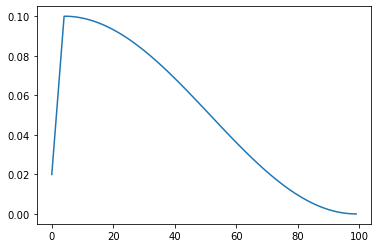

In [5]:
import matplotlib.pyplot as plt
plt.plot(agent.lr_list)

# 80 % drop

In [6]:
total_best = []
total_history = []
for i, seed in enumerate(RandomListOfIntegers):
    config = easydict.EasyDict()
    config.exp_name = "vgg16_exp_cifar100_0"
    config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

    config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
    config.cuda = True
    config.gpu_device = 0
    config.seed = seed
    config.milestones = [10, 20,30,40]
    config.gamma = 0.9
    config.img_size = 32
    config.num_classes = 100
    config.data_mode = "download"
    config.data_loader_workers = 4
    config.pin_memory = True
    config.async_loading = True
    config.batch_size = 128
    config.async_loading = True
    config.max_epoch = 100
    torch.cuda.init()
    
    agent = globals()["VGG_BN_cifar"](config)
    agent.init_graph()
    agent.load_checkpoint(config.load_file)
    agent.compress(method = 'greedy',k=0.48)
    best,history = agent.train(specializing=False, freeze_conv=False,cosine_decay = True)
    total_best.append(best)
    total_history.append(history)
    summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

    

Files already downloaded and verified
num_pruned 34
indices_pruned !!!  [10, 11, 16, 20, 24, 25, 26, 27, 31, 32, 41, 43, 49, 58, 60, 42, 22, 13, 8, 33, 23, 63, 14, 61, 59, 6, 29, 12, 35, 7, 47, 38, 40, 28]
num_pruned 34
indices_pruned !!!  [11, 55, 48, 23, 1, 13, 50, 44, 21, 18, 24, 27, 14, 39, 2, 7, 0, 22, 3, 31, 28, 53, 16, 49, 42, 32, 58, 33, 19, 38, 9, 54, 43, 41]
num_pruned 67
indices_pruned !!!  [116, 1, 73, 7, 127, 74, 101, 23, 99, 105, 97, 84, 57, 71, 100, 16, 109, 33, 69, 75, 42, 47, 56, 32, 113, 25, 103, 12, 62, 120, 18, 22, 4, 59, 3, 9, 60, 10, 65, 14, 79, 61, 38, 40, 95, 85, 111, 36, 6, 67, 46, 72, 90, 28, 26, 94, 76, 123, 63, 5, 29, 48, 50, 51, 53, 117, 86]
num_pruned 67
indices_pruned !!!  [113, 1, 33, 125, 53, 43, 73, 8, 15, 82, 27, 101, 89, 88, 6, 110, 93, 23, 32, 118, 122, 83, 92, 119, 20, 37, 54, 75, 67, 114, 81, 44, 126, 0, 52, 98, 28, 36, 103, 66, 90, 41, 30, 56, 31, 7, 48, 115, 13, 87, 34, 99, 107, 5, 74, 57, 123, 47, 55, 24, 78, 106, 17, 77, 2, 4, 68]
num_pruned 1

Epoch-0-:   2%|▏         | 8/391 [00:00<01:10,  5.46it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.6478163543564586	Top1 Acc: 0.15882000001907348


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.9799714118619507	Top1 Acc: 0.2626


Epoch-1-:   2%|▏         | 7/391 [00:00<01:14,  5.17it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.3820656897771695	Top1 Acc: 0.36882000000953674


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.49681866923465	Top1 Acc: 0.355


Epoch-2-:   2%|▏         | 7/391 [00:00<01:05,  5.86it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 2.1663338421555736	Top1 Acc: 0.4207599999809265


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.3459688198717337	Top1 Acc: 0.3997


Epoch-3-:   2%|▏         | 8/391 [00:00<01:08,  5.61it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 2.0843112054078476	Top1 Acc: 0.4405800000190735


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.547437793091883	Top1 Acc: 0.3654


Epoch-4-:   2%|▏         | 7/391 [00:00<01:06,  5.74it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.0455622633399866	Top1 Acc: 0.4492200000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.465549621400954	Top1 Acc: 0.3667


Epoch-5-:   2%|▏         | 9/391 [00:00<01:10,  5.45it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.000572837832029	Top1 Acc: 0.46062


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.3395189001590393	Top1 Acc: 0.4014


Epoch-6-:   2%|▏         | 8/391 [00:00<01:13,  5.22it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.9297069930054647	Top1 Acc: 0.47708000001907347


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.0178124980081487	Top1 Acc: 0.4574


Epoch-7-:   2%|▏         | 8/391 [00:00<01:11,  5.39it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.887018436666035	Top1 Acc: 0.4872799999809265


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.04350500770762	Top1 Acc: 0.4639


Epoch-8-:   2%|▏         | 8/391 [00:00<01:13,  5.23it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.8539826885208754	Top1 Acc: 0.498060000038147


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.0520969131324867	Top1 Acc: 0.4518


Epoch-9-:   2%|▏         | 7/391 [00:00<01:10,  5.42it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.8338061891248465	Top1 Acc: 0.50378


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.9001790737803979	Top1 Acc: 0.4895


Epoch-10-:   2%|▏         | 8/391 [00:00<01:05,  5.83it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.8128333268568033	Top1 Acc: 0.50604


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.2535017955152292	Top1 Acc: 0.4357


Epoch-11-:   2%|▏         | 8/391 [00:00<01:05,  5.85it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.8045212274317242	Top1 Acc: 0.5105800000190734


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.0067112294933462	Top1 Acc: 0.4741


Epoch-12-:   2%|▏         | 7/391 [00:00<01:11,  5.36it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.7918854256725067	Top1 Acc: 0.5113400000190735


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.0771462162838707	Top1 Acc: 0.4632


Epoch-13-:   2%|▏         | 8/391 [00:00<01:08,  5.59it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.7763496527586446	Top1 Acc: 0.5141000000381469


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.222088782093193	Top1 Acc: 0.4312


Epoch-14-:   2%|▏         | 7/391 [00:00<01:13,  5.24it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.7679218654437443	Top1 Acc: 0.5197800000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.116575361807135	Top1 Acc: 0.4663


Epoch-15-:   2%|▏         | 9/391 [00:00<01:08,  5.56it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.7601891490809447	Top1 Acc: 0.5192199999809265


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.0441812548456313	Top1 Acc: 0.4709


Epoch-16-:   2%|▏         | 8/391 [00:00<01:12,  5.28it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.7352389353315543	Top1 Acc: 0.5238999999809265


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.8921768816211555	Top1 Acc: 0.4935


Epoch-17-:   2%|▏         | 7/391 [00:00<01:04,  5.99it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.7398005412972493	Top1 Acc: 0.528000000038147


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.013605170612094	Top1 Acc: 0.4684


Epoch-18-:   2%|▏         | 8/391 [00:00<01:09,  5.50it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.7242502943634073	Top1 Acc: 0.5265999999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.861228351351581	Top1 Acc: 0.505


Epoch-19-:   2%|▏         | 8/391 [00:00<01:11,  5.36it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.713075025002365	Top1 Acc: 0.5322400000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 2.194961117792733	Top1 Acc: 0.4422


Epoch-20-:   2%|▏         | 8/391 [00:00<01:06,  5.74it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.7068020068775966	Top1 Acc: 0.5322000000095367


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 2.0761460020572327	Top1 Acc: 0.4597


Epoch-21-:   2%|▏         | 7/391 [00:00<01:14,  5.13it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.7017783618644071	Top1 Acc: 0.5334400000190734


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.890581060059463	Top1 Acc: 0.504


Epoch-22-:   2%|▏         | 6/391 [00:00<01:04,  5.95it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.6841795154849586	Top1 Acc: 0.5359200000286102


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.9859089564673509	Top1 Acc: 0.4856


Epoch-23-:   2%|▏         | 6/391 [00:00<01:04,  5.97it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.6787889397052853	Top1 Acc: 0.5379400000190735


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.8588570990139925	Top1 Acc: 0.5027


Epoch-24-:   2%|▏         | 8/391 [00:00<01:16,  4.97it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.6688950119725883	Top1 Acc: 0.5414999999904633


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.8034445922585982	Top1 Acc: 0.5141


Epoch-25-:   2%|▏         | 7/391 [00:00<01:07,  5.66it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.6496521319879596	Top1 Acc: 0.5432


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.8883289279817026	Top1 Acc: 0.4946


Epoch-26-:   2%|▏         | 8/391 [00:00<01:08,  5.58it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.6476479308379581	Top1 Acc: 0.5463600000286102


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.8873220214360877	Top1 Acc: 0.4986


Epoch-27-:   2%|▏         | 8/391 [00:00<01:10,  5.40it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.6282650525002833	Top1 Acc: 0.552260000038147


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.9150786143314988	Top1 Acc: 0.5009


Epoch-28-:   2%|▏         | 8/391 [00:00<01:12,  5.25it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.621382102941918	Top1 Acc: 0.5535800000095368


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 2.099379971057554	Top1 Acc: 0.4619


Epoch-29-:   2%|▏         | 6/391 [00:00<01:12,  5.31it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.6199669231234304	Top1 Acc: 0.5552799999904633


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.8129341511786738	Top1 Acc: 0.5212


Epoch-30-:   2%|▏         | 8/391 [00:00<01:04,  5.90it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.607084339232091	Top1 Acc: 0.556540000038147


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.8448506095741368	Top1 Acc: 0.51


Epoch-31-:   2%|▏         | 7/391 [00:00<01:15,  5.09it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.5982591706468625	Top1 Acc: 0.5579800000190734


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.8029583632191526	Top1 Acc: 0.5156


Epoch-32-:   2%|▏         | 8/391 [00:00<01:11,  5.36it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.5839142418273575	Top1 Acc: 0.5599200000190735


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.8567110798026942	Top1 Acc: 0.5017


Epoch-33-:   2%|▏         | 8/391 [00:00<01:17,  4.96it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.57385739493553	Top1 Acc: 0.56526


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 2.012214361866818	Top1 Acc: 0.4817


Epoch-34-:   2%|▏         | 8/391 [00:00<01:02,  6.08it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.5651209198910256	Top1 Acc: 0.5651000000572205


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.9896026895016055	Top1 Acc: 0.5


Epoch-35-:   2%|▏         | 7/391 [00:00<01:23,  4.62it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.5455556498159229	Top1 Acc: 0.570120000038147


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.913424802731864	Top1 Acc: 0.4973


Epoch-36-:   2%|▏         | 8/391 [00:00<01:07,  5.65it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.533347568548549	Top1 Acc: 0.57572


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.7523278088509282	Top1 Acc: 0.5289


Epoch-37-:   2%|▏         | 7/391 [00:00<01:05,  5.83it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.526034889318754	Top1 Acc: 0.5745600000190735


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.7883509593673899	Top1 Acc: 0.5294


Epoch-38-:   2%|▏         | 6/391 [00:00<01:19,  4.85it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.5132912156526999	Top1 Acc: 0.5804999999904633


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.8580763400355471	Top1 Acc: 0.5064


Epoch-39-:   2%|▏         | 8/391 [00:00<01:09,  5.49it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.502796260902034	Top1 Acc: 0.581740000038147


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.8298530110829994	Top1 Acc: 0.5049


Epoch-40-:   2%|▏         | 6/391 [00:00<01:08,  5.64it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.4834589720382105	Top1 Acc: 0.586560000038147


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.83757760856725	Top1 Acc: 0.5211


Epoch-41-:   2%|▏         | 8/391 [00:00<01:07,  5.64it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.469284082007835	Top1 Acc: 0.5880200000381469


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.796408695510671	Top1 Acc: 0.5252
current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.463965713520489	Top1 Acc: 0.589180000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.7787332051916966	Top1 Acc: 0.5279


Epoch-43-:   2%|▏         | 8/391 [00:00<01:06,  5.74it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.4476648476117713	Top1 Acc: 0.5948199999809265


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.8157423115983795	Top1 Acc: 0.5184


Epoch-44-:   2%|▏         | 7/391 [00:00<01:11,  5.38it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.43580325241284	Top1 Acc: 0.5966199999809265


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.824885433233237	Top1 Acc: 0.5324


Epoch-45-:   2%|▏         | 8/391 [00:00<01:04,  5.95it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.4142866454770804	Top1 Acc: 0.603220000038147


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.7529852465738225	Top1 Acc: 0.5355


Epoch-46-:   2%|▏         | 7/391 [00:00<01:10,  5.47it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.4000575069881156	Top1 Acc: 0.6080199999809265


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.7668246106256413	Top1 Acc: 0.5379


Epoch-47-:   2%|▏         | 8/391 [00:00<01:13,  5.24it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.3822206520973264	Top1 Acc: 0.6099199999809265


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.9719349070440364	Top1 Acc: 0.5021


Epoch-48-:   2%|▏         | 8/391 [00:00<01:04,  5.89it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.361589843812196	Top1 Acc: 0.6153600000572205


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.7710832161239431	Top1 Acc: 0.537


Epoch-49-:   2%|▏         | 8/391 [00:00<01:09,  5.50it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.349461997104118	Top1 Acc: 0.6176000000572205


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.724802571006968	Top1 Acc: 0.5465


Epoch-50-:   2%|▏         | 8/391 [00:00<01:11,  5.35it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.3332841911584215	Top1 Acc: 0.6221400000190734


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.7086124239088614	Top1 Acc: 0.545


Epoch-51-:   2%|▏         | 7/391 [00:00<01:09,  5.55it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.314525683517651	Top1 Acc: 0.6275600000381469


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.7657295012775855	Top1 Acc: 0.5408


Epoch-52-:   2%|▏         | 9/391 [00:00<01:05,  5.79it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.2954291272956087	Top1 Acc: 0.634720000038147


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.7192630616924431	Top1 Acc: 0.5451


Epoch-53-:   2%|▏         | 7/391 [00:00<01:03,  6.05it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.2726697560466464	Top1 Acc: 0.6349800000381469


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.7104759669002099	Top1 Acc: 0.5478


Epoch-54-:   2%|▏         | 7/391 [00:00<01:12,  5.31it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.2587720623711491	Top1 Acc: 0.64022


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.7515236395823806	Top1 Acc: 0.5404


Epoch-55-:   2%|▏         | 8/391 [00:00<01:04,  5.91it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.236532646524327	Top1 Acc: 0.6475600000190734


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.4788552462300169	Top1 Acc: 0.597


Epoch-56-:   2%|▏         | 7/391 [00:00<01:04,  5.95it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.2194952528799892	Top1 Acc: 0.6513599999809265


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5416160399400736	Top1 Acc: 0.5825


Epoch-57-:   2%|▏         | 9/391 [00:00<01:01,  6.16it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.1969839781141647	Top1 Acc: 0.65598


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.6188841499859774	Top1 Acc: 0.5717


Epoch-58-:   2%|▏         | 8/391 [00:00<01:08,  5.56it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.172671084361308	Top1 Acc: 0.6627799999809265


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5755375744421272	Top1 Acc: 0.5786


Epoch-59-:   2%|▏         | 7/391 [00:00<01:10,  5.42it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.1559703871417228	Top1 Acc: 0.66618


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5353402306761923	Top1 Acc: 0.5934


Epoch-60-:   2%|▏         | 7/391 [00:00<01:11,  5.35it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 1.1313162953652385	Top1 Acc: 0.6718


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4971791634076759	Top1 Acc: 0.5988


Epoch-61-:   2%|▏         | 8/391 [00:00<01:16,  5.00it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 1.101775850938714	Top1 Acc: 0.6794000000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5073639622217492	Top1 Acc: 0.5953


Epoch-62-:   2%|▏         | 9/391 [00:00<01:17,  4.96it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 1.0813614320572076	Top1 Acc: 0.684880000038147


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4633533758453177	Top1 Acc: 0.6034


Epoch-63-:   2%|▏         | 7/391 [00:00<01:21,  4.73it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 1.059432303814022	Top1 Acc: 0.6923800000190735


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4523938471757913	Top1 Acc: 0.6092


Epoch-64-:   2%|▏         | 8/391 [00:00<01:07,  5.64it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 1.0384006131335597	Top1 Acc: 0.6969600000572205


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.596369833885869	Top1 Acc: 0.585


Epoch-65-:   2%|▏         | 8/391 [00:00<01:11,  5.39it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 1.0020100090204906	Top1 Acc: 0.7056800000572204


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.4691291866423208	Top1 Acc: 0.6074


Epoch-66-:   2%|▏         | 7/391 [00:00<01:07,  5.67it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.9858067552451892	Top1 Acc: 0.7102800000190734


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.502020309243021	Top1 Acc: 0.6049


Epoch-67-:   2%|▏         | 6/391 [00:00<01:06,  5.78it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.9502002702039831	Top1 Acc: 0.71778


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4020946274829815	Top1 Acc: 0.6206


Epoch-68-:   2%|▏         | 8/391 [00:00<01:08,  5.60it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.9286953966940761	Top1 Acc: 0.7225200000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.4586028373694118	Top1 Acc: 0.6158


Epoch-69-:   2%|▏         | 8/391 [00:00<01:15,  5.08it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.9035607029105086	Top1 Acc: 0.7298799999809266


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.4259193011477023	Top1 Acc: 0.6177


Epoch-70-:   2%|▏         | 9/391 [00:00<01:07,  5.66it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.8724483096081278	Top1 Acc: 0.7382600000572205


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3993506099604354	Top1 Acc: 0.6324


Epoch-71-:   2%|▏         | 8/391 [00:00<01:01,  6.25it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.8385044757057639	Top1 Acc: 0.7478800000572204


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3719601404817798	Top1 Acc: 0.6316


Epoch-72-:   2%|▏         | 8/391 [00:00<01:07,  5.68it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.810001252099986	Top1 Acc: 0.75606


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.396868745737438	Top1 Acc: 0.6324


Epoch-73-:   2%|▏         | 8/391 [00:00<01:08,  5.62it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.7740122544033753	Top1 Acc: 0.76576


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.447502682480631	Top1 Acc: 0.6288


Epoch-74-:   2%|▏         | 8/391 [00:00<01:09,  5.49it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.7405600822185312	Top1 Acc: 0.77442


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3735851720918584	Top1 Acc: 0.6425


Epoch-75-:   2%|▏         | 7/391 [00:00<01:17,  4.94it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.7054138463323988	Top1 Acc: 0.7845200000381469


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3551977269257172	Top1 Acc: 0.6486


Epoch-76-:   2%|▏         | 7/391 [00:00<01:14,  5.12it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6742371240692675	Top1 Acc: 0.7943000000190735


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3216076500808136	Top1 Acc: 0.6559


Epoch-77-:   2%|▏         | 8/391 [00:00<01:04,  5.96it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.642834269329715	Top1 Acc: 0.8027399999809265


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3448225750198848	Top1 Acc: 0.6528


Epoch-78-:   2%|▏         | 8/391 [00:00<01:09,  5.53it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.5997081101702912	Top1 Acc: 0.8140799999809265


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3527540036394625	Top1 Acc: 0.6603


Epoch-79-:   2%|▏         | 7/391 [00:00<01:19,  4.83it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.5700682880323561	Top1 Acc: 0.8239800000572205


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3356977874719644	Top1 Acc: 0.6618


Epoch-80-:   2%|▏         | 8/391 [00:00<01:10,  5.43it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.5355111138747476	Top1 Acc: 0.8325399999809265


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.315281781969191	Top1 Acc: 0.6644


Epoch-81-:   1%|          | 4/391 [00:00<01:06,  5.82it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.4936960000744866	Top1 Acc: 0.8461400000381469


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.2937388450284548	Top1 Acc: 0.6711


Epoch-82-:   2%|▏         | 8/391 [00:00<01:06,  5.73it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.45563504736289345	Top1 Acc: 0.8541199999809265


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.2729814905154555	Top1 Acc: 0.6802


Epoch-83-:   2%|▏         | 6/391 [00:00<01:05,  5.86it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.4185764877997396	Top1 Acc: 0.8686800000381469


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3003900141655644	Top1 Acc: 0.6817


Epoch-84-:   2%|▏         | 8/391 [00:00<01:07,  5.69it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.3843282744707659	Top1 Acc: 0.879020000038147


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3140287112586106	Top1 Acc: 0.6835


Epoch-85-:   2%|▏         | 7/391 [00:00<01:15,  5.11it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.34715586123259173	Top1 Acc: 0.8911399999809265


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3009537896023522	Top1 Acc: 0.684


Epoch-86-:   2%|▏         | 8/391 [00:00<01:15,  5.06it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.31636404697699927	Top1 Acc: 0.9001800000190735


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.2839946935448465	Top1 Acc: 0.6888


Epoch-87-:   2%|▏         | 8/391 [00:00<01:01,  6.23it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.28913121836264727	Top1 Acc: 0.910040000038147


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.2901462603218947	Top1 Acc: 0.6921


Epoch-88-:   2%|▏         | 8/391 [00:00<01:09,  5.51it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.2652762626938503	Top1 Acc: 0.9163400000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.278881601140469	Top1 Acc: 0.6965


Epoch-89-:   2%|▏         | 8/391 [00:00<01:11,  5.39it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.23818874376280533	Top1 Acc: 0.9259999999809265


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.2995782803885545	Top1 Acc: 0.6969


Epoch-90-:   2%|▏         | 8/391 [00:00<01:08,  5.60it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.22112436630689275	Top1 Acc: 0.9316000000190735


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.2949881779996655	Top1 Acc: 0.7001


Epoch-91-:   2%|▏         | 8/391 [00:00<01:11,  5.38it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.20360451039222197	Top1 Acc: 0.9369400000572204


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.299989926664135	Top1 Acc: 0.699


Epoch-92-:   2%|▏         | 8/391 [00:00<01:08,  5.61it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.18706520345738475	Top1 Acc: 0.9431200000572204


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.2968982284582113	Top1 Acc: 0.7004


Epoch-93-:   2%|▏         | 8/391 [00:00<01:05,  5.81it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.17271523627326313	Top1 Acc: 0.9479800000190735


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.297615414178824	Top1 Acc: 0.7043


Epoch-94-:   2%|▏         | 9/391 [00:00<01:17,  4.92it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.1649718002971176	Top1 Acc: 0.9510199999809266


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.2920405992978736	Top1 Acc: 0.7049


Epoch-95-:   2%|▏         | 8/391 [00:00<01:09,  5.53it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.15802852651271063	Top1 Acc: 0.9528399999809265


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.2994245411474494	Top1 Acc: 0.703


Epoch-96-:   2%|▏         | 7/391 [00:00<01:09,  5.49it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.15314880286907906	Top1 Acc: 0.9545200000190734


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3015988793554185	Top1 Acc: 0.7045


Epoch-97-:   2%|▏         | 7/391 [00:00<01:23,  4.62it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.14855212889745106	Top1 Acc: 0.9557799999809266


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.2982657868650895	Top1 Acc: 0.7036


Epoch-98-:   2%|▏         | 7/391 [00:00<01:18,  4.90it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.1491550314323524	Top1 Acc: 0.95548


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.2969859944114202	Top1 Acc: 0.7029


Epoch-99-:   2%|▏         | 8/391 [00:00<01:13,  5.23it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.14761667917756474	Top1 Acc: 0.956780000038147


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 80.03it/s]


Validation results at epoch-99 | loss: 1.2963185944134676	Top1 Acc: 0.7047
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

num_pruned 134
indices_pruned !!!  [121, 203, 49, 186, 113, 80, 219, 76, 93, 30, 104, 124, 249, 92, 131, 221, 252, 40, 125, 128, 240, 33, 35, 38, 120, 66, 187, 28, 73, 171, 95, 216, 8, 211, 52, 147, 191, 89, 160, 201, 238, 152, 86, 46, 10, 83, 71, 231, 43, 3, 185, 163, 198, 176, 162, 37, 200, 105, 242, 54, 207, 42, 199, 15, 212, 19, 25, 177, 247, 50, 11, 151, 60, 4, 127, 81, 168, 136, 119, 94, 51, 236, 74, 232, 17, 239, 34, 61, 47, 2, 26, 150, 77, 137, 255, 16, 146, 192, 190, 233, 114, 197, 227, 39, 208, 178, 20, 155, 72, 142, 205, 117, 58, 210, 14, 182, 234, 181, 174, 217, 170, 224, 244, 102, 148, 59, 65, 12, 225, 195, 133, 156, 243, 82]
num_pruned 267
indices_pruned !!!  [399, 79, 67, 125, 64, 328, 385, 83, 338, 475, 443, 126, 481, 495, 104, 110, 429, 344, 13, 246, 477, 182, 8, 153, 497, 300, 286, 474, 472, 183, 156, 34, 467, 220, 180, 272, 249, 57, 341, 391, 90, 61, 152, 292, 66, 406, 310, 224, 266, 309, 155, 438, 27, 353, 75, 431, 487, 462, 383, 176, 321, 127, 81, 293, 361, 253, 39

Epoch-0-:   2%|▏         | 8/391 [00:00<01:08,  5.55it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.6152157862777905	Top1 Acc: 0.16634000000953675


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.6127380962613262	Top1 Acc: 0.3191


Epoch-1-:   2%|▏         | 8/391 [00:00<01:14,  5.14it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.340436460721828	Top1 Acc: 0.37823999999046326


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.612526504299309	Top1 Acc: 0.3459


Epoch-2-:   2%|▏         | 8/391 [00:00<01:10,  5.40it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 2.131965720135233	Top1 Acc: 0.42790000000953676


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.4481928589977797	Top1 Acc: 0.3753


Epoch-3-:   2%|▏         | 8/391 [00:00<01:09,  5.52it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 2.073499507001599	Top1 Acc: 0.44128


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.3142278692390343	Top1 Acc: 0.404


Epoch-4-:   2%|▏         | 7/391 [00:00<01:08,  5.57it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.049399257316004	Top1 Acc: 0.4479200000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.381374271610115	Top1 Acc: 0.3968


Epoch-5-:   2%|▏         | 9/391 [00:00<01:01,  6.22it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.9940072758423397	Top1 Acc: 0.4613800000190735


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.1045371641086628	Top1 Acc: 0.4513


Epoch-6-:   2%|▏         | 8/391 [00:00<01:14,  5.16it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.9181130511681441	Top1 Acc: 0.4808


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.271751894226557	Top1 Acc: 0.4185


Epoch-7-:   2%|▏         | 8/391 [00:00<01:08,  5.58it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.8825160143015636	Top1 Acc: 0.48845999999046325


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.21919506561907	Top1 Acc: 0.422
current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.8594118493902103	Top1 Acc: 0.49586


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.170241524901571	Top1 Acc: 0.4405


Epoch-9-:   2%|▏         | 8/391 [00:00<01:06,  5.73it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.834192747655122	Top1 Acc: 0.5010800000572204


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.09630189817163	Top1 Acc: 0.4542


Epoch-10-:   2%|▏         | 7/391 [00:00<01:07,  5.72it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.8209044030865136	Top1 Acc: 0.5048599999904633


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.053019561345064	Top1 Acc: 0.4626


Epoch-11-:   2%|▏         | 8/391 [00:00<01:14,  5.15it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.8011174891001123	Top1 Acc: 0.5079800000572204


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.018546705004535	Top1 Acc: 0.4667


Epoch-12-:   2%|▏         | 8/391 [00:00<01:13,  5.21it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.793867734691981	Top1 Acc: 0.5117600000190735


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.080274210700506	Top1 Acc: 0.4595


Epoch-13-:   2%|▏         | 8/391 [00:00<01:06,  5.76it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.7767541631103476	Top1 Acc: 0.5154999999809265


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.261042314239695	Top1 Acc: 0.4155


Epoch-14-:   2%|▏         | 9/391 [00:00<01:09,  5.46it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.7735702558551603	Top1 Acc: 0.5142799999809265


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.9224199720575839	Top1 Acc: 0.4877


Epoch-15-:   2%|▏         | 8/391 [00:00<01:03,  6.02it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.756308658958396	Top1 Acc: 0.5208200000190735


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.0681418421902236	Top1 Acc: 0.4578


Epoch-16-:   2%|▏         | 8/391 [00:00<01:07,  5.70it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.7408295013105777	Top1 Acc: 0.52424


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.925688022299658	Top1 Acc: 0.4942


Epoch-17-:   2%|▏         | 8/391 [00:00<01:06,  5.72it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.7347159992398509	Top1 Acc: 0.5275599999904632


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.060425203057784	Top1 Acc: 0.4682


Epoch-18-:   2%|▏         | 8/391 [00:00<01:10,  5.43it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.723772384016715	Top1 Acc: 0.5293199999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 2.070067502275298	Top1 Acc: 0.4639


Epoch-19-:   2%|▏         | 8/391 [00:00<01:11,  5.39it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.7211910166094064	Top1 Acc: 0.52876


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.8730310654338402	Top1 Acc: 0.4996


Epoch-20-:   2%|▏         | 7/391 [00:00<01:03,  6.06it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.7094505330180878	Top1 Acc: 0.5329399999809266


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.999941773052457	Top1 Acc: 0.4788


Epoch-21-:   2%|▏         | 8/391 [00:00<01:08,  5.56it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.6963762099785573	Top1 Acc: 0.5355


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.846471430380133	Top1 Acc: 0.5072


Epoch-22-:   2%|▏         | 7/391 [00:00<01:08,  5.58it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.6870351548085127	Top1 Acc: 0.5365400000095367


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 2.0395530764060683	Top1 Acc: 0.456
current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.6849667772917492	Top1 Acc: 0.5385599999904632


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 2.1622904131684124	Top1 Acc: 0.4575


Epoch-24-:   2%|▏         | 8/391 [00:00<01:10,  5.47it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.6648454870409368	Top1 Acc: 0.54038


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.9227485762366765	Top1 Acc: 0.4991


Epoch-25-:   2%|▏         | 7/391 [00:00<01:05,  5.87it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.6611464176031634	Top1 Acc: 0.5470600000572204


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.871807644638834	Top1 Acc: 0.5114


Epoch-26-:   2%|▏         | 8/391 [00:00<01:12,  5.31it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.6514834549725819	Top1 Acc: 0.545120000038147


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.9127833647064016	Top1 Acc: 0.5002


Epoch-27-:   2%|▏         | 8/391 [00:00<01:06,  5.75it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.641466074587439	Top1 Acc: 0.5500600000381469


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.9969001601013956	Top1 Acc: 0.4793


Epoch-28-:   2%|▏         | 8/391 [00:00<01:14,  5.15it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.6246821871194084	Top1 Acc: 0.5512000000572205


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 2.2484376596499094	Top1 Acc: 0.4366


Epoch-29-:   2%|▏         | 8/391 [00:00<01:20,  4.74it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.6203120312727322	Top1 Acc: 0.5541200000190735


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.973180491713029	Top1 Acc: 0.485


Epoch-30-:   2%|▏         | 8/391 [00:00<01:06,  5.76it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.604357064837385	Top1 Acc: 0.55704


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 2.0664411149447477	Top1 Acc: 0.4733


Epoch-31-:   2%|▏         | 7/391 [00:00<01:08,  5.60it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.6001767038994128	Top1 Acc: 0.5581799999809265


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.85274713401553	Top1 Acc: 0.5061


Epoch-32-:   2%|▏         | 9/391 [00:00<01:03,  6.03it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.5927154755653323	Top1 Acc: 0.5617599999809265


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.9631614398352708	Top1 Acc: 0.4944


Epoch-33-:   2%|▏         | 8/391 [00:00<01:02,  6.17it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.5777878371041145	Top1 Acc: 0.5622399999809266


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.819730420655842	Top1 Acc: 0.5146


Epoch-34-:   2%|▏         | 8/391 [00:00<01:06,  5.73it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.5597826105249508	Top1 Acc: 0.5672599999809265


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 2.356856089604052	Top1 Acc: 0.4268


Epoch-35-:   2%|▏         | 8/391 [00:00<01:07,  5.64it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.5504650121454693	Top1 Acc: 0.571520000038147


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.7359008653254449	Top1 Acc: 0.5295


Epoch-36-:   2%|▏         | 8/391 [00:00<01:11,  5.38it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.5433434885176247	Top1 Acc: 0.5707399999809265


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.9268778773802746	Top1 Acc: 0.4958


Epoch-37-:   2%|▏         | 8/391 [00:00<01:11,  5.38it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.529744391551103	Top1 Acc: 0.5742800000572205


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.606217757056031	Top1 Acc: 0.5583


Epoch-38-:   2%|▏         | 8/391 [00:00<01:07,  5.65it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.5072300985950948	Top1 Acc: 0.5794399999809265


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.8330837397635737	Top1 Acc: 0.5147


Epoch-39-:   2%|▏         | 8/391 [00:00<01:07,  5.63it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.4975195787751767	Top1 Acc: 0.58244


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.859564613692368	Top1 Acc: 0.5117


Epoch-40-:   2%|▏         | 7/391 [00:00<01:10,  5.44it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.481856153749139	Top1 Acc: 0.586880000038147


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.7711124329627315	Top1 Acc: 0.5298


Epoch-41-:   2%|▏         | 8/391 [00:00<01:07,  5.64it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.4760908992089274	Top1 Acc: 0.5851400000572204


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.6698419534707372	Top1 Acc: 0.5528


Epoch-42-:   2%|▏         | 8/391 [00:00<01:11,  5.33it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.4625688324803892	Top1 Acc: 0.5924000000190734


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.6951188769521592	Top1 Acc: 0.5477


Epoch-43-:   2%|▏         | 8/391 [00:00<01:09,  5.52it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.436849379478513	Top1 Acc: 0.5980199999809265


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.8034338166442099	Top1 Acc: 0.5283


Epoch-44-:   2%|▏         | 8/391 [00:00<01:09,  5.51it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.4302556203759236	Top1 Acc: 0.5986400000190735


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.7267937267882913	Top1 Acc: 0.543


Epoch-45-:   2%|▏         | 8/391 [00:00<01:13,  5.21it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.4204681965396226	Top1 Acc: 0.601280000038147


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.7691699779486354	Top1 Acc: 0.5289


Epoch-46-:   2%|▏         | 8/391 [00:00<01:06,  5.72it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.3904512637411541	Top1 Acc: 0.6098399999904632


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.686313686491568	Top1 Acc: 0.5467


Epoch-47-:   2%|▏         | 7/391 [00:00<01:10,  5.43it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.38798166693324	Top1 Acc: 0.6094400000190735


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.6883873139755636	Top1 Acc: 0.5541


Epoch-48-:   2%|▏         | 8/391 [00:00<01:04,  5.90it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.3661583945574358	Top1 Acc: 0.6137400000190735


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.7153029185307176	Top1 Acc: 0.5481


Epoch-49-:   2%|▏         | 7/391 [00:00<01:11,  5.34it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.3496710243432417	Top1 Acc: 0.6196600000381469


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.9097270769408987	Top1 Acc: 0.5102


Epoch-50-:   2%|▏         | 7/391 [00:00<01:03,  6.10it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.3331424031416168	Top1 Acc: 0.6217400000572204


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.574369152889976	Top1 Acc: 0.5709


Epoch-51-:   2%|▏         | 8/391 [00:00<01:06,  5.78it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.307171481649589	Top1 Acc: 0.6273000000572204


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6308991939206667	Top1 Acc: 0.5606


Epoch-52-:   2%|▏         | 8/391 [00:00<01:07,  5.64it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.2974756568898935	Top1 Acc: 0.62974


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.7250054003317146	Top1 Acc: 0.5389


Epoch-53-:   2%|▏         | 9/391 [00:00<01:09,  5.47it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.2740568450039915	Top1 Acc: 0.6364600000190734


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5331965020940275	Top1 Acc: 0.5816


Epoch-54-:   2%|▏         | 8/391 [00:00<01:05,  5.82it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.2624727400672404	Top1 Acc: 0.6388599999809265


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.684973816328411	Top1 Acc: 0.5494


Epoch-55-:   2%|▏         | 8/391 [00:00<01:04,  5.90it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.2381997689261766	Top1 Acc: 0.64534


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.4800094411342959	Top1 Acc: 0.5938


Epoch-56-:   2%|▏         | 9/391 [00:00<01:07,  5.64it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.2244594673366498	Top1 Acc: 0.6511599999809266


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.6231172009359431	Top1 Acc: 0.5631


Epoch-57-:   2%|▏         | 7/391 [00:00<01:05,  5.87it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.1974657687079875	Top1 Acc: 0.6551800000572204


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.4468669446208808	Top1 Acc: 0.5991


Epoch-58-:   2%|▏         | 7/391 [00:00<01:07,  5.67it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.1772720396061382	Top1 Acc: 0.6631200000572205


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.573384564134139	Top1 Acc: 0.5797


Epoch-59-:   2%|▏         | 7/391 [00:00<01:04,  5.96it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.156510551872156	Top1 Acc: 0.6668400000381469


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.623908051961585	Top1 Acc: 0.5727


Epoch-60-:   2%|▏         | 8/391 [00:00<01:03,  6.01it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 1.1365613961768577	Top1 Acc: 0.668900000038147


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.522873009307475	Top1 Acc: 0.5835


Epoch-61-:   2%|▏         | 8/391 [00:00<01:08,  5.60it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 1.1055615248582553	Top1 Acc: 0.681040000038147


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.558913351614264	Top1 Acc: 0.5829


Epoch-62-:   2%|▏         | 7/391 [00:00<01:08,  5.61it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 1.0886047453526646	Top1 Acc: 0.683660000038147


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5026774678049208	Top1 Acc: 0.5966


Epoch-63-:   2%|▏         | 8/391 [00:00<01:07,  5.71it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 1.0600926859299544	Top1 Acc: 0.6897400000572205


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4527431062505216	Top1 Acc: 0.6113


Epoch-64-:   2%|▏         | 8/391 [00:00<01:13,  5.22it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 1.0375004880263676	Top1 Acc: 0.697800000038147


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.3797846972187864	Top1 Acc: 0.6244


Epoch-65-:   2%|▏         | 7/391 [00:00<01:09,  5.50it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 1.0198885778636884	Top1 Acc: 0.7012800000572205


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.443138625048384	Top1 Acc: 0.6086
current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.9839554750705923	Top1 Acc: 0.7105400000572205


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.499668564223036	Top1 Acc: 0.6018


Epoch-67-:   2%|▏         | 8/391 [00:00<01:11,  5.34it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.9621007950104716	Top1 Acc: 0.7159200000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3748037151143522	Top1 Acc: 0.6259


Epoch-68-:   2%|▏         | 7/391 [00:00<01:04,  5.98it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.9249751541925513	Top1 Acc: 0.7280800000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3722448779057852	Top1 Acc: 0.6308


Epoch-69-:   2%|▏         | 7/391 [00:00<01:22,  4.63it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.90268620581883	Top1 Acc: 0.7327399999809265


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.4683050460453275	Top1 Acc: 0.6183


Epoch-70-:   1%|          | 2/391 [00:00<01:22,  4.70it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.8809471874285841	Top1 Acc: 0.7366600000572204


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.4488506241689754	Top1 Acc: 0.6189


Epoch-71-:   2%|▏         | 8/391 [00:00<01:38,  3.91it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.8378779677783742	Top1 Acc: 0.7470800000190735


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3590336917321892	Top1 Acc: 0.6361


Epoch-72-:   2%|▏         | 6/391 [00:00<01:43,  3.73it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.8100735853090311	Top1 Acc: 0.75376


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3379396841495852	Top1 Acc: 0.6399


Epoch-73-:   2%|▏         | 8/391 [00:00<01:35,  4.00it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.7842991118083524	Top1 Acc: 0.76256


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.4037640668168854	Top1 Acc: 0.6306


Epoch-74-:   2%|▏         | 7/391 [00:00<01:13,  5.20it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.7410014952387651	Top1 Acc: 0.773620000038147


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3608593593669842	Top1 Acc: 0.6426


Epoch-75-:   2%|▏         | 6/391 [00:00<01:02,  6.12it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.7112176838280905	Top1 Acc: 0.7826600000190734


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3301865081243878	Top1 Acc: 0.6492


Epoch-76-:   2%|▏         | 7/391 [00:00<01:07,  5.69it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6778557462917875	Top1 Acc: 0.7923400000572205


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3648530139198787	Top1 Acc: 0.6458


Epoch-77-:   2%|▏         | 8/391 [00:00<01:02,  6.09it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.6452454042709087	Top1 Acc: 0.8009599999809265


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3421404278731044	Top1 Acc: 0.6544


Epoch-78-:   2%|▏         | 8/391 [00:00<01:03,  6.02it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6027276055587222	Top1 Acc: 0.8115800000572204


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3344681594945207	Top1 Acc: 0.6592


Epoch-79-:   2%|▏         | 8/391 [00:00<01:10,  5.43it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.5706409215927124	Top1 Acc: 0.8210999999809265


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3386119430578207	Top1 Acc: 0.6563


Epoch-80-:   2%|▏         | 7/391 [00:00<01:15,  5.12it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.534442400535964	Top1 Acc: 0.8332799999809265


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3553305939783025	Top1 Acc: 0.6597


Epoch-81-:   2%|▏         | 7/391 [00:00<01:05,  5.89it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.4956889344984308	Top1 Acc: 0.8427000000572205


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.2939896387389944	Top1 Acc: 0.6784


Epoch-82-:   2%|▏         | 8/391 [00:00<01:13,  5.23it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.4553077720925021	Top1 Acc: 0.8566800000381469


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3103186820126786	Top1 Acc: 0.6721


Epoch-83-:   2%|▏         | 8/391 [00:00<01:08,  5.58it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.4207054453966258	Top1 Acc: 0.8671999999809266


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.2890250924267346	Top1 Acc: 0.6832


Epoch-84-:   2%|▏         | 8/391 [00:00<01:07,  5.66it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.3861176737434114	Top1 Acc: 0.8783199999809265


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.29621904786629	Top1 Acc: 0.6799


Epoch-85-:   2%|▏         | 8/391 [00:00<01:06,  5.72it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.3605863227487525	Top1 Acc: 0.88592


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.293388428567331	Top1 Acc: 0.683


Epoch-86-:   2%|▏         | 8/391 [00:00<01:11,  5.34it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.3250617416923308	Top1 Acc: 0.8980199999809265


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3013542483124552	Top1 Acc: 0.6881


Epoch-87-:   2%|▏         | 8/391 [00:00<01:04,  5.93it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.2871827397619367	Top1 Acc: 0.9100800000381469


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.2999925462505486	Top1 Acc: 0.6885


Epoch-88-:   2%|▏         | 8/391 [00:00<01:08,  5.63it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.2670484208656699	Top1 Acc: 0.916320000038147


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3010176903084865	Top1 Acc: 0.6935


Epoch-89-:   2%|▏         | 8/391 [00:00<01:06,  5.74it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.24032242338904333	Top1 Acc: 0.9254400000572205


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.2995656992815718	Top1 Acc: 0.6939


Epoch-90-:   2%|▏         | 8/391 [00:00<01:11,  5.37it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.22142799823637813	Top1 Acc: 0.9316799999809265


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3048052184189423	Top1 Acc: 0.6966


Epoch-91-:   2%|▏         | 9/391 [00:00<01:12,  5.28it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.20282081171603458	Top1 Acc: 0.938480000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3063559554800201	Top1 Acc: 0.6959


Epoch-92-:   2%|▏         | 7/391 [00:00<01:10,  5.47it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.18843445111342402	Top1 Acc: 0.94304


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3054956982407389	Top1 Acc: 0.6991


Epoch-93-:   2%|▏         | 8/391 [00:00<01:11,  5.35it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.17839924836783763	Top1 Acc: 0.9452799999809265


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.2991616084605833	Top1 Acc: 0.6994


Epoch-94-:   2%|▏         | 8/391 [00:00<01:06,  5.76it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.16610014817827498	Top1 Acc: 0.9495999999809265


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.30148651252819	Top1 Acc: 0.7013


Epoch-95-:   2%|▏         | 8/391 [00:00<01:10,  5.47it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.1611564835852674	Top1 Acc: 0.95188


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.303703695158415	Top1 Acc: 0.6998


Epoch-96-:   2%|▏         | 7/391 [00:00<01:06,  5.74it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.15363922549406892	Top1 Acc: 0.9548


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3045679489268531	Top1 Acc: 0.7027


Epoch-97-:   2%|▏         | 9/391 [00:00<01:08,  5.54it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.15216030975055816	Top1 Acc: 0.95444


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3030917123903203	Top1 Acc: 0.7022


Epoch-98-:   2%|▏         | 8/391 [00:00<01:03,  6.03it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.14554275382700785	Top1 Acc: 0.9573200000572205


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.303609701651561	Top1 Acc: 0.7025


Epoch-99-:   2%|▏         | 7/391 [00:00<01:03,  6.03it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.14956262737245815	Top1 Acc: 0.9561600000381469


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 96.53it/s]


Validation results at epoch-99 | loss: 1.2995039564144761	Top1 Acc: 0.7035
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

num_pruned 134
indices_pruned !!!  [252, 125, 186, 49, 234, 199, 40, 8, 46, 211, 216, 104, 191, 120, 43, 92, 86, 249, 213, 152, 113, 10, 128, 121, 35, 185, 30, 76, 219, 221, 38, 37, 93, 243, 247, 33, 201, 14, 160, 114, 74, 205, 245, 50, 97, 200, 198, 150, 197, 95, 210, 83, 3, 168, 136, 77, 73, 171, 60, 240, 218, 151, 176, 163, 162, 207, 187, 54, 102, 231, 236, 177, 212, 72, 131, 224, 28, 238, 192, 42, 142, 147, 119, 20, 52, 81, 148, 105, 155, 126, 190, 242, 34, 127, 208, 51, 209, 15, 225, 16, 146, 182, 58, 232, 39, 157, 2, 137, 255, 9, 25, 227, 217, 80, 195, 233, 19, 64, 178, 71, 228, 26, 70, 27, 47, 7, 123, 181, 69, 239, 65, 100, 172, 106]
num_pruned 267
indices_pruned !!!  [399, 64, 81, 164, 429, 361, 293, 481, 67, 79, 126, 300, 467, 180, 338, 286, 210, 495, 26, 13, 350, 182, 155, 34, 156, 443, 362, 183, 502, 246, 352, 486, 90, 364, 351, 307, 386, 110, 60, 176, 129, 46, 104, 333, 274, 229, 391, 147, 177, 199, 475, 277, 265, 53, 347, 8, 487, 446, 224, 57, 314, 302, 321, 121, 472, 488,

Epoch-0-:   2%|▏         | 7/391 [00:00<01:09,  5.51it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.658096470796239	Top1 Acc: 0.15597999999046325


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.750290339506125	Top1 Acc: 0.2883


Epoch-1-:   2%|▏         | 8/391 [00:00<01:15,  5.06it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.388188917313695	Top1 Acc: 0.36668


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.514912282364278	Top1 Acc: 0.3685


Epoch-2-:   2%|▏         | 8/391 [00:00<01:10,  5.43it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 2.1824177634685547	Top1 Acc: 0.41426


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.3762914289402057	Top1 Acc: 0.3818


Epoch-3-:   2%|▏         | 9/391 [00:00<00:59,  6.43it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 2.097537287970638	Top1 Acc: 0.43634


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.310509204864502	Top1 Acc: 0.4028


Epoch-4-:   2%|▏         | 8/391 [00:00<01:11,  5.34it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.055870086640653	Top1 Acc: 0.4471999999904633


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.3993359668345393	Top1 Acc: 0.3758


Epoch-5-:   2%|▏         | 7/391 [00:00<01:08,  5.61it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.010119243655973	Top1 Acc: 0.4587


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.1834684806534006	Top1 Acc: 0.4279


Epoch-6-:   2%|▏         | 7/391 [00:00<01:05,  5.89it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.936832233767985	Top1 Acc: 0.47544000002861025


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.3080835463125493	Top1 Acc: 0.4132


Epoch-7-:   2%|▏         | 8/391 [00:00<01:13,  5.23it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.8918393359464758	Top1 Acc: 0.48536000002861024


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.3809005655819857	Top1 Acc: 0.4103


Epoch-8-:   2%|▏         | 8/391 [00:00<01:05,  5.86it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.871308344709294	Top1 Acc: 0.49256000000953676


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.9992381243766109	Top1 Acc: 0.4796


Epoch-9-:   2%|▏         | 8/391 [00:00<01:11,  5.32it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.836071670512714	Top1 Acc: 0.5000999999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.9500308474407921	Top1 Acc: 0.4807


Epoch-10-:   2%|▏         | 7/391 [00:00<01:06,  5.79it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.826789688881096	Top1 Acc: 0.50016


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.2621274839473675	Top1 Acc: 0.4183


Epoch-11-:   2%|▏         | 8/391 [00:00<01:13,  5.25it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.813366804281464	Top1 Acc: 0.5059400000572205


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.079136290127718	Top1 Acc: 0.464


Epoch-12-:   2%|▏         | 8/391 [00:00<01:12,  5.30it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.7916527065779546	Top1 Acc: 0.51168


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.114555927771556	Top1 Acc: 0.4531


Epoch-13-:   2%|▏         | 8/391 [00:00<01:12,  5.26it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.780860064889464	Top1 Acc: 0.5132599999809265


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.169723629951477	Top1 Acc: 0.4441


Epoch-14-:   2%|▏         | 6/391 [00:00<01:04,  5.98it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.7696920325384116	Top1 Acc: 0.5154599999809265


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.8630397002908248	Top1 Acc: 0.504


Epoch-15-:   2%|▏         | 8/391 [00:00<01:04,  5.92it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.7638916246726384	Top1 Acc: 0.5187199999809265


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.90608858911297	Top1 Acc: 0.4948


Epoch-16-:   2%|▏         | 8/391 [00:00<01:05,  5.87it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.737203092526292	Top1 Acc: 0.5252000000381469


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 2.2049267110945303	Top1 Acc: 0.4381


Epoch-17-:   2%|▏         | 8/391 [00:00<01:09,  5.55it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.7325541704816891	Top1 Acc: 0.5258400000572204


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.9574418384817582	Top1 Acc: 0.4815


Epoch-18-:   2%|▏         | 9/391 [00:00<01:11,  5.34it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.7232432225171257	Top1 Acc: 0.5271399999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 2.0213334364227102	Top1 Acc: 0.4658


Epoch-19-:   2%|▏         | 8/391 [00:00<01:12,  5.29it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.7169626310963155	Top1 Acc: 0.53098


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 2.2014441701430307	Top1 Acc: 0.4327


Epoch-20-:   2%|▏         | 8/391 [00:00<01:21,  4.67it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.7114869911042625	Top1 Acc: 0.5312199999809265


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.8984653708301014	Top1 Acc: 0.5


Epoch-21-:   2%|▏         | 8/391 [00:00<01:12,  5.28it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.6996402405107114	Top1 Acc: 0.5340600000572204


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.960474094258079	Top1 Acc: 0.4838


Epoch-22-:   2%|▏         | 6/391 [00:00<01:11,  5.37it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.6894130231169484	Top1 Acc: 0.5393999999809265


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 2.0334732170346417	Top1 Acc: 0.4651


Epoch-23-:   2%|▏         | 8/391 [00:00<01:16,  5.03it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.6873136831976263	Top1 Acc: 0.53814


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.8922620227065268	Top1 Acc: 0.5007


Epoch-24-:   2%|▏         | 9/391 [00:00<01:12,  5.25it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.6747671310858958	Top1 Acc: 0.539160000038147


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 2.046265958230707	Top1 Acc: 0.4698


Epoch-25-:   2%|▏         | 8/391 [00:00<01:08,  5.56it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.664302316163202	Top1 Acc: 0.54106


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 2.03282613090322	Top1 Acc: 0.4749


Epoch-26-:   2%|▏         | 7/391 [00:00<01:18,  4.92it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.6560907790727932	Top1 Acc: 0.5453400000095368


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 2.05784470521951	Top1 Acc: 0.4778


Epoch-27-:   2%|▏         | 8/391 [00:00<01:09,  5.52it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.6379240864073223	Top1 Acc: 0.5494000000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 2.0017587429360497	Top1 Acc: 0.4712


Epoch-28-:   2%|▏         | 8/391 [00:00<01:09,  5.50it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.6282413024121842	Top1 Acc: 0.55152


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.8192157866079597	Top1 Acc: 0.5083


Epoch-29-:   2%|▏         | 7/391 [00:00<01:14,  5.16it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.6241303182318998	Top1 Acc: 0.5504600000190735


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.882998919185204	Top1 Acc: 0.5039


Epoch-30-:   2%|▏         | 8/391 [00:00<01:14,  5.12it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.6099207206150454	Top1 Acc: 0.5555399999904632


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.8623899794832062	Top1 Acc: 0.5023


Epoch-31-:   2%|▏         | 7/391 [00:00<01:11,  5.35it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.600621930778484	Top1 Acc: 0.5552599999809266


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 2.1327756582936153	Top1 Acc: 0.4608


Epoch-32-:   2%|▏         | 7/391 [00:00<01:06,  5.76it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.5942599056931712	Top1 Acc: 0.5607600000572205


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.8286041051526614	Top1 Acc: 0.5146


Epoch-33-:   2%|▏         | 7/391 [00:00<01:10,  5.44it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.5793272976375297	Top1 Acc: 0.5629600000572205


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 2.0292619149896165	Top1 Acc: 0.4779


Epoch-34-:   2%|▏         | 8/391 [00:00<01:12,  5.26it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.563341511789795	Top1 Acc: 0.5651


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.8297769842268545	Top1 Acc: 0.514


Epoch-35-:   2%|▏         | 7/391 [00:00<01:09,  5.55it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.5596540913252575	Top1 Acc: 0.5666800000572204


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.7841736546045617	Top1 Acc: 0.5254


Epoch-36-:   2%|▏         | 8/391 [00:00<01:15,  5.08it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.5349584162387702	Top1 Acc: 0.5720800000572205


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.9424385043639172	Top1 Acc: 0.4982


Epoch-37-:   2%|▏         | 8/391 [00:00<01:06,  5.80it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.5327019377437698	Top1 Acc: 0.5714000000572205


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.9062448438209822	Top1 Acc: 0.5023


Epoch-38-:   2%|▏         | 8/391 [00:00<01:06,  5.80it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.521377424754755	Top1 Acc: 0.5799999999809266


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.7640028497840785	Top1 Acc: 0.533


Epoch-39-:   2%|▏         | 8/391 [00:00<01:08,  5.62it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.5060468156014561	Top1 Acc: 0.5818


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.870273621776436	Top1 Acc: 0.5061


Epoch-40-:   2%|▏         | 8/391 [00:00<01:12,  5.26it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.4886291042313247	Top1 Acc: 0.58454


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.8485281905041466	Top1 Acc: 0.5209


Epoch-41-:   2%|▏         | 8/391 [00:00<01:06,  5.79it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.4794931326375897	Top1 Acc: 0.5850000000572204


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.8620597440985185	Top1 Acc: 0.5121


Epoch-42-:   2%|▏         | 8/391 [00:00<01:05,  5.84it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.4614272416400178	Top1 Acc: 0.591640000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.7327562510212766	Top1 Acc: 0.5374


Epoch-43-:   2%|▏         | 8/391 [00:00<01:09,  5.48it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.4422677102906014	Top1 Acc: 0.595900000038147


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.8459090613111664	Top1 Acc: 0.5183


Epoch-44-:   2%|▏         | 7/391 [00:00<01:19,  4.85it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.4295821935319535	Top1 Acc: 0.5983999999809265


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.7639662359334245	Top1 Acc: 0.5391


Epoch-45-:   2%|▏         | 7/391 [00:00<01:12,  5.30it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.421808593108526	Top1 Acc: 0.60076


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.7479361371148991	Top1 Acc: 0.535


Epoch-46-:   2%|▏         | 7/391 [00:00<01:12,  5.30it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.399586440961989	Top1 Acc: 0.6054600000381469


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.7696623545658738	Top1 Acc: 0.5268


Epoch-47-:   2%|▏         | 7/391 [00:00<01:09,  5.49it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.3807580785068405	Top1 Acc: 0.6119600000190735


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.731557444681095	Top1 Acc: 0.539


Epoch-48-:   2%|▏         | 8/391 [00:00<01:17,  4.92it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.376220209671713	Top1 Acc: 0.611940000038147


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6785878486271146	Top1 Acc: 0.5486


Epoch-49-:   2%|▏         | 7/391 [00:00<01:11,  5.41it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.3530035948814334	Top1 Acc: 0.617160000038147


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.7393426910231384	Top1 Acc: 0.5421


Epoch-50-:   2%|▏         | 8/391 [00:00<01:17,  4.97it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.3348393784764478	Top1 Acc: 0.621


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.745046550714517	Top1 Acc: 0.5409


Epoch-51-:   2%|▏         | 7/391 [00:00<01:06,  5.78it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.3219753476359961	Top1 Acc: 0.6272200000572205


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6555353071116194	Top1 Acc: 0.5513


Epoch-52-:   2%|▏         | 8/391 [00:00<01:05,  5.82it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.2962239381602354	Top1 Acc: 0.6307799999809265


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.7178994432280335	Top1 Acc: 0.5492


Epoch-53-:   2%|▏         | 7/391 [00:00<01:14,  5.16it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.284474091913999	Top1 Acc: 0.634420000038147


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5932123163078404	Top1 Acc: 0.5702


Epoch-54-:   2%|▏         | 8/391 [00:00<01:11,  5.39it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.2673579551984586	Top1 Acc: 0.6403400000572205


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5184405378148527	Top1 Acc: 0.589


Epoch-55-:   2%|▏         | 8/391 [00:00<01:13,  5.21it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.2381700138606684	Top1 Acc: 0.6454200000190735


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.7242756357675866	Top1 Acc: 0.5458


Epoch-56-:   2%|▏         | 8/391 [00:00<01:17,  4.97it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.2227226738124857	Top1 Acc: 0.6465200000572204


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5605142312713816	Top1 Acc: 0.5825


Epoch-57-:   2%|▏         | 6/391 [00:00<01:04,  5.95it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.2049432363351593	Top1 Acc: 0.6544000000572204


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5556765945651863	Top1 Acc: 0.5764


Epoch-58-:   2%|▏         | 8/391 [00:00<01:11,  5.35it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.1792286449990919	Top1 Acc: 0.6592200000190734


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5702302357818507	Top1 Acc: 0.5766


Epoch-59-:   2%|▏         | 8/391 [00:00<01:11,  5.38it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.1650835335102228	Top1 Acc: 0.6627600000572205


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5001682193973396	Top1 Acc: 0.5974


Epoch-60-:   2%|▏         | 7/391 [00:00<01:13,  5.26it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 1.1328410858388447	Top1 Acc: 0.6702800000572204


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4873451673531835	Top1 Acc: 0.5971


Epoch-61-:   2%|▏         | 7/391 [00:00<01:21,  4.73it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 1.1156384818389287	Top1 Acc: 0.6741600000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.521843347368361	Top1 Acc: 0.5981


Epoch-62-:   2%|▏         | 8/391 [00:00<01:12,  5.27it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 1.0849611765283453	Top1 Acc: 0.6836799999809265


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4907516407061228	Top1 Acc: 0.601


Epoch-63-:   2%|▏         | 7/391 [00:00<01:07,  5.68it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 1.0635182115123094	Top1 Acc: 0.6907600000190735


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5604223495797267	Top1 Acc: 0.586


Epoch-64-:   2%|▏         | 7/391 [00:00<01:09,  5.49it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 1.041176978127121	Top1 Acc: 0.6944600000190735


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4656268599667126	Top1 Acc: 0.6089


Epoch-65-:   2%|▏         | 8/391 [00:00<01:10,  5.41it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 1.0120008452164242	Top1 Acc: 0.7014400000572205


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.4273813970481293	Top1 Acc: 0.6138


Epoch-66-:   2%|▏         | 8/391 [00:00<01:09,  5.48it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.9848611309095416	Top1 Acc: 0.7093000000572205


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4352606444419185	Top1 Acc: 0.6193


Epoch-67-:   2%|▏         | 8/391 [00:00<01:08,  5.56it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.9624960494163396	Top1 Acc: 0.7141000000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4650717951074432	Top1 Acc: 0.6101


Epoch-68-:   2%|▏         | 6/391 [00:00<01:04,  6.01it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.9283048739213773	Top1 Acc: 0.72264


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.354797657532028	Top1 Acc: 0.6377


Epoch-69-:   2%|▏         | 7/391 [00:00<01:09,  5.53it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.903213298991513	Top1 Acc: 0.7298800000190735


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.5112600024742415	Top1 Acc: 0.6101


Epoch-70-:   2%|▏         | 8/391 [00:00<01:07,  5.69it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.8732060925734927	Top1 Acc: 0.7381200000572204


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.4355517369282396	Top1 Acc: 0.6235


Epoch-71-:   2%|▏         | 6/391 [00:00<01:10,  5.44it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.840096851291559	Top1 Acc: 0.74638


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3455672558349898	Top1 Acc: 0.6418


Epoch-72-:   2%|▏         | 8/391 [00:00<01:16,  4.99it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.8081216298405777	Top1 Acc: 0.756740000038147


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.360566418382186	Top1 Acc: 0.6407


Epoch-73-:   2%|▏         | 7/391 [00:00<01:05,  5.85it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.7748053413827706	Top1 Acc: 0.7638200000190735


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.411084922054146	Top1 Acc: 0.6314


Epoch-74-:   2%|▏         | 9/391 [00:00<01:07,  5.68it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.7429561852799047	Top1 Acc: 0.7733199999809265


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3567845994913126	Top1 Acc: 0.6462


Epoch-75-:   2%|▏         | 7/391 [00:00<01:08,  5.58it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.7121399796527365	Top1 Acc: 0.7836000000572204


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.363227103329912	Top1 Acc: 0.6465


Epoch-76-:   2%|▏         | 8/391 [00:00<01:09,  5.50it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6834304605603523	Top1 Acc: 0.7901


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3237322229373305	Top1 Acc: 0.6564


Epoch-77-:   2%|▏         | 7/391 [00:00<01:05,  5.88it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.6452994660648239	Top1 Acc: 0.80078


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3498015026502972	Top1 Acc: 0.6471


Epoch-78-:   2%|▏         | 8/391 [00:00<01:10,  5.41it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.5925611899332013	Top1 Acc: 0.8153999999809265


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3516207978695254	Top1 Acc: 0.6513


Epoch-79-:   2%|▏         | 8/391 [00:00<01:11,  5.32it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.5757214714346639	Top1 Acc: 0.8202399999809266


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3598661815063864	Top1 Acc: 0.6591


Epoch-80-:   2%|▏         | 8/391 [00:00<01:05,  5.86it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.531839014242982	Top1 Acc: 0.8328800000190735


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.309878507746926	Top1 Acc: 0.6624


Epoch-81-:   2%|▏         | 8/391 [00:00<01:14,  5.12it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.49423867776570723	Top1 Acc: 0.8431600000190735


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3352563977241516	Top1 Acc: 0.6611


Epoch-82-:   2%|▏         | 8/391 [00:00<01:03,  6.00it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.45727836834195323	Top1 Acc: 0.85756


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3258496138113964	Top1 Acc: 0.6725


Epoch-83-:   2%|▏         | 8/391 [00:00<01:17,  4.97it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.42198444662801443	Top1 Acc: 0.86604


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3210086317002019	Top1 Acc: 0.672


Epoch-84-:   2%|▏         | 7/391 [00:00<01:22,  4.65it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.3883616905230695	Top1 Acc: 0.8771200000572205


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3393046388143226	Top1 Acc: 0.6754


Epoch-85-:   2%|▏         | 8/391 [00:00<01:06,  5.76it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.3504824835397398	Top1 Acc: 0.889280000038147


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3258552136300485	Top1 Acc: 0.6799


Epoch-86-:   2%|▏         | 8/391 [00:00<01:09,  5.49it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.3278823236903876	Top1 Acc: 0.89716


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3187139909478682	Top1 Acc: 0.6834


Epoch-87-:   2%|▏         | 7/391 [00:00<01:09,  5.49it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.2946324340065422	Top1 Acc: 0.9082799999809266


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3189330485802662	Top1 Acc: 0.6849


Epoch-88-:   2%|▏         | 8/391 [00:00<01:10,  5.41it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.26600066503829056	Top1 Acc: 0.9159200000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.313009591042241	Top1 Acc: 0.6895


Epoch-89-:   2%|▏         | 8/391 [00:00<01:09,  5.52it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.24512884049388148	Top1 Acc: 0.923040000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3006670912609826	Top1 Acc: 0.6958


Epoch-90-:   2%|▏         | 7/391 [00:00<01:14,  5.14it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.2238865438324716	Top1 Acc: 0.931360000038147


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3163146851937981	Top1 Acc: 0.6939


Epoch-91-:   2%|▏         | 7/391 [00:00<01:18,  4.88it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.20148953511510664	Top1 Acc: 0.9386400000572205


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3145506170731556	Top1 Acc: 0.6973


Epoch-92-:   2%|▏         | 9/391 [00:00<01:06,  5.76it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.1865806438771965	Top1 Acc: 0.9440399999809265


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3130890236625188	Top1 Acc: 0.6969


Epoch-93-:   2%|▏         | 8/391 [00:00<01:17,  4.97it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.17534791702961983	Top1 Acc: 0.9474399999809265


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3195419039907335	Top1 Acc: 0.6979


Epoch-94-:   2%|▏         | 8/391 [00:00<01:07,  5.68it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.169708474641642	Top1 Acc: 0.94954


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.309431869772416	Top1 Acc: 0.6983


Epoch-95-:   2%|▏         | 8/391 [00:00<01:14,  5.14it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.15862336482309625	Top1 Acc: 0.9533400000572204


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3153467774391174	Top1 Acc: 0.6986


Epoch-96-:   2%|▏         | 8/391 [00:00<01:08,  5.59it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.15166078795633658	Top1 Acc: 0.9557799999809266


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3099314155457895	Top1 Acc: 0.7024


Epoch-97-:   2%|▏         | 7/391 [00:00<01:06,  5.76it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.1486065559508398	Top1 Acc: 0.9566799999809266


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3147731876071496	Top1 Acc: 0.7006


Epoch-98-:   2%|▏         | 7/391 [00:00<01:05,  5.88it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.14817328356644688	Top1 Acc: 0.9563400000572204


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3181429603431798	Top1 Acc: 0.7004


Epoch-99-:   2%|▏         | 8/391 [00:00<01:12,  5.27it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.14552184087617318	Top1 Acc: 0.958200000038147


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 94.59it/s]


Validation results at epoch-99 | loss: 1.3168586741519879	Top1 Acc: 0.7007
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

num_pruned 134
indices_pruned !!!  [121, 30, 203, 219, 8, 151, 216, 3, 125, 38, 136, 76, 93, 221, 128, 186, 80, 40, 33, 124, 49, 113, 163, 211, 120, 95, 249, 73, 201, 92, 43, 240, 147, 52, 39, 198, 106, 35, 176, 9, 71, 89, 104, 81, 199, 10, 213, 77, 150, 197, 83, 191, 25, 220, 208, 152, 247, 242, 162, 54, 72, 2, 185, 200, 254, 105, 74, 50, 61, 212, 177, 86, 231, 4, 236, 47, 119, 239, 58, 232, 37, 160, 238, 28, 46, 155, 85, 66, 192, 187, 51, 223, 207, 75, 205, 255, 94, 60, 210, 15, 88, 252, 233, 182, 227, 173, 181, 65, 126, 129, 107, 209, 127, 17, 16, 102, 0, 245, 42, 137, 69, 14, 48, 190, 165, 70, 27, 224, 34, 142, 114, 195, 146, 144]
num_pruned 267
indices_pruned !!!  [399, 67, 429, 79, 351, 495, 81, 260, 443, 125, 361, 118, 481, 300, 86, 96, 104, 183, 34, 266, 338, 282, 220, 347, 176, 90, 164, 330, 60, 477, 246, 129, 292, 13, 391, 83, 381, 472, 126, 341, 321, 229, 64, 256, 405, 53, 124, 497, 155, 431, 310, 487, 367, 52, 40, 380, 180, 147, 156, 277, 373, 235, 438, 369, 314, 426, 453, 

Epoch-0-:   2%|▏         | 8/391 [00:00<01:12,  5.27it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.6520563928062653	Top1 Acc: 0.15816


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.619582668135438	Top1 Acc: 0.3173


Epoch-1-:   2%|▏         | 9/391 [00:00<01:13,  5.17it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.364257740852473	Top1 Acc: 0.3723000000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.716113627711429	Top1 Acc: 0.3329


Epoch-2-:   2%|▏         | 8/391 [00:00<01:18,  4.86it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 2.155723687632919	Top1 Acc: 0.42054000002861025


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.53617621977118	Top1 Acc: 0.3638


Epoch-3-:   2%|▏         | 8/391 [00:00<01:13,  5.20it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 2.080049039457765	Top1 Acc: 0.43666


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.5687550502487375	Top1 Acc: 0.3545


Epoch-4-:   2%|▏         | 8/391 [00:00<01:11,  5.37it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.0439039752306534	Top1 Acc: 0.4475


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.2349317692503146	Top1 Acc: 0.4215


Epoch-5-:   2%|▏         | 8/391 [00:00<01:06,  5.80it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.0012395366683338	Top1 Acc: 0.46003999999046324


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.381592821471299	Top1 Acc: 0.4027


Epoch-6-:   2%|▏         | 7/391 [00:00<01:06,  5.77it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.9255141019821167	Top1 Acc: 0.4798399999809265


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.1112999387934237	Top1 Acc: 0.4369


Epoch-7-:   2%|▏         | 9/391 [00:00<01:16,  4.98it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.8919917732248526	Top1 Acc: 0.4868


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.0641848678830303	Top1 Acc: 0.4553


Epoch-8-:   2%|▏         | 8/391 [00:00<01:08,  5.61it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.8654292242606278	Top1 Acc: 0.4947800000286102


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.9745089600357828	Top1 Acc: 0.4727


Epoch-9-:   2%|▏         | 8/391 [00:00<01:10,  5.46it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.847531746415531	Top1 Acc: 0.49848000000953674


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.335946863210654	Top1 Acc: 0.409


Epoch-10-:   2%|▏         | 8/391 [00:00<01:14,  5.17it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.8161845816980542	Top1 Acc: 0.50384


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.3216012308869183	Top1 Acc: 0.4308
current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.8054161748617812	Top1 Acc: 0.50904


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.1065316320974614	Top1 Acc: 0.4502


Epoch-12-:   2%|▏         | 7/391 [00:00<01:10,  5.48it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.7911381672715287	Top1 Acc: 0.51232


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.0641048784497418	Top1 Acc: 0.4732


Epoch-13-:   2%|▏         | 8/391 [00:00<01:15,  5.07it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.7753237001121502	Top1 Acc: 0.5151800000190735


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.0357268445099455	Top1 Acc: 0.4734


Epoch-14-:   2%|▏         | 8/391 [00:00<01:10,  5.41it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.7651728632504984	Top1 Acc: 0.5195399999809265


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.121103636826141	Top1 Acc: 0.4512


Epoch-15-:   2%|▏         | 7/391 [00:00<01:11,  5.39it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.7629982790983547	Top1 Acc: 0.5212000000572204


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.156657878356644	Top1 Acc: 0.4608


Epoch-16-:   2%|▏         | 8/391 [00:00<01:13,  5.23it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.7518783941903078	Top1 Acc: 0.5218800000381469


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 2.829044716267646	Top1 Acc: 0.3731


Epoch-17-:   2%|▏         | 8/391 [00:00<01:11,  5.37it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.7403418496441658	Top1 Acc: 0.5237799999809265


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.0155630971811993	Top1 Acc: 0.4693


Epoch-18-:   1%|▏         | 5/391 [00:00<01:06,  5.77it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.732761312628646	Top1 Acc: 0.5239799999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.881665297701389	Top1 Acc: 0.4894


Epoch-19-:   2%|▏         | 8/391 [00:00<01:12,  5.32it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.7206259435400024	Top1 Acc: 0.5255199999904633


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.989515785929523	Top1 Acc: 0.4773


Epoch-20-:   2%|▏         | 8/391 [00:00<01:07,  5.67it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.7121680697516712	Top1 Acc: 0.5308799999809265


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.9900103626371939	Top1 Acc: 0.4733


Epoch-21-:   2%|▏         | 8/391 [00:00<01:10,  5.46it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.7017034636738966	Top1 Acc: 0.53582


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 2.2341748234591905	Top1 Acc: 0.4452


Epoch-22-:   2%|▏         | 7/391 [00:00<01:06,  5.77it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.680353857977006	Top1 Acc: 0.5388400000095367


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.9662599955933004	Top1 Acc: 0.486


Epoch-23-:   2%|▏         | 8/391 [00:00<01:06,  5.74it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.675038723689516	Top1 Acc: 0.5407


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.7840344422980199	Top1 Acc: 0.5112


Epoch-24-:   2%|▏         | 8/391 [00:00<01:07,  5.69it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.6748663214466455	Top1 Acc: 0.5410399999809266


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 2.0277031056488615	Top1 Acc: 0.4701


Epoch-25-:   2%|▏         | 9/391 [00:00<01:02,  6.16it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.6553846006198307	Top1 Acc: 0.5455799999809265


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 2.1579122558424744	Top1 Acc: 0.4425


Epoch-26-:   2%|▏         | 7/391 [00:00<01:12,  5.29it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.6420247210261156	Top1 Acc: 0.5481600000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 2.057826955107194	Top1 Acc: 0.4626


Epoch-27-:   2%|▏         | 8/391 [00:00<01:13,  5.23it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.6367639943461894	Top1 Acc: 0.54774


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 2.0402659630473656	Top1 Acc: 0.4707


Epoch-28-:   2%|▏         | 6/391 [00:00<01:02,  6.16it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.6273938975370754	Top1 Acc: 0.55122


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 2.0016859754731384	Top1 Acc: 0.4886


Epoch-29-:   2%|▏         | 8/391 [00:00<01:08,  5.55it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.6167027239909257	Top1 Acc: 0.5535200000190735


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.8784105536303943	Top1 Acc: 0.503


Epoch-30-:   2%|▏         | 8/391 [00:00<01:14,  5.16it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.6020755947703291	Top1 Acc: 0.5565399999809265


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.886581067797504	Top1 Acc: 0.4953


Epoch-31-:   2%|▏         | 8/391 [00:00<01:09,  5.51it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.5970161842263264	Top1 Acc: 0.5591000000190735


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.992378770550595	Top1 Acc: 0.483


Epoch-32-:   2%|▏         | 8/391 [00:00<01:08,  5.61it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.5796828635818208	Top1 Acc: 0.5640800000190734


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.7950145881387252	Top1 Acc: 0.5132


Epoch-33-:   2%|▏         | 8/391 [00:00<01:07,  5.66it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.5754106258187452	Top1 Acc: 0.5642799999809265


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.8232633101789257	Top1 Acc: 0.5057


Epoch-34-:   2%|▏         | 7/391 [00:00<01:12,  5.33it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.5657621619036741	Top1 Acc: 0.567


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.901497634151314	Top1 Acc: 0.5003


Epoch-35-:   2%|▏         | 7/391 [00:00<01:07,  5.68it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.5487695682384168	Top1 Acc: 0.5695599999904633


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.777582918541341	Top1 Acc: 0.5252


Epoch-36-:   2%|▏         | 7/391 [00:00<01:11,  5.41it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.5390562788604776	Top1 Acc: 0.5722200000572205


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.8430905311922483	Top1 Acc: 0.5165


Epoch-37-:   2%|▏         | 8/391 [00:00<01:07,  5.69it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.5249514567577624	Top1 Acc: 0.5774600000190735


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.9128761759287194	Top1 Acc: 0.5061


Epoch-38-:   2%|▏         | 8/391 [00:00<01:12,  5.28it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.5121086561466421	Top1 Acc: 0.5813600000190735


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.890090417258347	Top1 Acc: 0.508


Epoch-39-:   2%|▏         | 8/391 [00:00<01:09,  5.53it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.5040900554803327	Top1 Acc: 0.5811400000381469


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.9031864751743366	Top1 Acc: 0.5008


Epoch-40-:   2%|▏         | 7/391 [00:00<01:09,  5.49it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.487989861032237	Top1 Acc: 0.585220000038147


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.8043303399146358	Top1 Acc: 0.519


Epoch-41-:   2%|▏         | 7/391 [00:00<01:14,  5.13it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.4748442590693989	Top1 Acc: 0.5900799999809265


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.8404262050797668	Top1 Acc: 0.5192


Epoch-42-:   2%|▏         | 8/391 [00:00<01:11,  5.37it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.4562841211743367	Top1 Acc: 0.5946399999809265


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.8639233112335205	Top1 Acc: 0.5155


Epoch-43-:   2%|▏         | 7/391 [00:00<01:16,  5.02it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.4373320856362657	Top1 Acc: 0.59496


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.8020329656480234	Top1 Acc: 0.5277


Epoch-44-:   2%|▏         | 8/391 [00:00<01:10,  5.47it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.4328719847037663	Top1 Acc: 0.5969199999809265


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.764837219745298	Top1 Acc: 0.5302


Epoch-45-:   2%|▏         | 7/391 [00:00<01:10,  5.43it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.412017268293044	Top1 Acc: 0.60506


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.7805193466476248	Top1 Acc: 0.5345


Epoch-46-:   2%|▏         | 8/391 [00:00<01:15,  5.06it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.4041435218528104	Top1 Acc: 0.6045399999809266


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.8943891434729854	Top1 Acc: 0.5083


Epoch-47-:   2%|▏         | 7/391 [00:00<01:14,  5.16it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.387407210781751	Top1 Acc: 0.6102199999809265


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5474344325971	Top1 Acc: 0.5782


Epoch-48-:   2%|▏         | 8/391 [00:00<01:10,  5.41it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.3659933723147264	Top1 Acc: 0.6134200000572204


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.722066728374626	Top1 Acc: 0.5359


Epoch-49-:   2%|▏         | 8/391 [00:00<01:04,  5.92it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.3475635112703914	Top1 Acc: 0.6187800000381469


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.671723779243759	Top1 Acc: 0.5395


Epoch-50-:   2%|▏         | 7/391 [00:00<01:07,  5.69it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.3368904776585377	Top1 Acc: 0.621080000038147


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.684826902196377	Top1 Acc: 0.5548


Epoch-51-:   2%|▏         | 8/391 [00:00<01:19,  4.82it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.3096863929268039	Top1 Acc: 0.6274400000572204


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5792103870005547	Top1 Acc: 0.5754


Epoch-52-:   2%|▏         | 8/391 [00:00<01:10,  5.44it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.3087413329297624	Top1 Acc: 0.62622


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.7381032207344151	Top1 Acc: 0.5375


Epoch-53-:   2%|▏         | 9/391 [00:00<01:08,  5.55it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.2811867279164932	Top1 Acc: 0.6370599999809266


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.6298946881596046	Top1 Acc: 0.5672


Epoch-54-:   2%|▏         | 8/391 [00:00<01:12,  5.30it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.2679107003199779	Top1 Acc: 0.6402


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.6232915316955954	Top1 Acc: 0.5595


Epoch-55-:   2%|▏         | 7/391 [00:00<01:09,  5.54it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.2393400804770878	Top1 Acc: 0.6444399999809265


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.583277347721631	Top1 Acc: 0.5745


Epoch-56-:   2%|▏         | 8/391 [00:00<01:12,  5.30it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.2216273172737082	Top1 Acc: 0.6501199999809265


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.6117607898350004	Top1 Acc: 0.57


Epoch-57-:   2%|▏         | 7/391 [00:00<01:17,  4.97it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.205463880620649	Top1 Acc: 0.65514


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5500089111207407	Top1 Acc: 0.5823


Epoch-58-:   2%|▏         | 8/391 [00:00<01:10,  5.47it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.1768763647664844	Top1 Acc: 0.6640400000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.4632860754109636	Top1 Acc: 0.6062


Epoch-59-:   2%|▏         | 7/391 [00:00<01:07,  5.67it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.1534444769020276	Top1 Acc: 0.6676399999809265


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.605525561525852	Top1 Acc: 0.5752


Epoch-60-:   2%|▏         | 8/391 [00:00<01:18,  4.91it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 1.1331834870836008	Top1 Acc: 0.67336


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.428218221362633	Top1 Acc: 0.6087


Epoch-61-:   2%|▏         | 8/391 [00:00<01:07,  5.69it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 1.1069178005008746	Top1 Acc: 0.6780399999809266


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.496152704275107	Top1 Acc: 0.6004


Epoch-62-:   2%|▏         | 7/391 [00:00<01:06,  5.80it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 1.0815212882083396	Top1 Acc: 0.685560000038147


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5495729838745504	Top1 Acc: 0.5911


Epoch-63-:   2%|▏         | 8/391 [00:00<01:08,  5.59it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 1.0561597161280833	Top1 Acc: 0.6900199999809266


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4749987359288372	Top1 Acc: 0.5994


Epoch-64-:   2%|▏         | 7/391 [00:00<01:03,  6.00it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 1.0467492242908234	Top1 Acc: 0.6941999999809265


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4722066846074937	Top1 Acc: 0.6045


Epoch-65-:   2%|▏         | 6/391 [00:00<01:19,  4.83it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 1.01368554184199	Top1 Acc: 0.7006799999809266


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.498602278624909	Top1 Acc: 0.6021


Epoch-66-:   2%|▏         | 7/391 [00:00<01:10,  5.48it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.9856744535133967	Top1 Acc: 0.7086800000572204


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5197637232044074	Top1 Acc: 0.599


Epoch-67-:   2%|▏         | 8/391 [00:00<01:03,  6.02it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.9555785155967068	Top1 Acc: 0.7170200000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4715255559245242	Top1 Acc: 0.6099


Epoch-68-:   2%|▏         | 7/391 [00:00<01:28,  4.33it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.9283818247373147	Top1 Acc: 0.7229000000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3921935995922814	Top1 Acc: 0.625


Epoch-69-:   2%|▏         | 8/391 [00:00<01:04,  5.93it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.8967791757620204	Top1 Acc: 0.73384


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3544941159743298	Top1 Acc: 0.6345


Epoch-70-:   2%|▏         | 8/391 [00:00<01:13,  5.19it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.8618767801148203	Top1 Acc: 0.740540000038147


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.4115016400059568	Top1 Acc: 0.6297


Epoch-71-:   2%|▏         | 8/391 [00:00<01:08,  5.61it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.8429429395424436	Top1 Acc: 0.74778


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3396074296552924	Top1 Acc: 0.6423


Epoch-72-:   2%|▏         | 8/391 [00:00<01:23,  4.56it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.8109447486565241	Top1 Acc: 0.75496


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3602561777151083	Top1 Acc: 0.6403


Epoch-73-:   2%|▏         | 7/391 [00:00<01:20,  4.79it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.7794526557026007	Top1 Acc: 0.7632599999809265


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.312707704079302	Top1 Acc: 0.6514


Epoch-74-:   2%|▏         | 7/391 [00:00<01:20,  4.77it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.7369436595750891	Top1 Acc: 0.7749599999809265


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3380051594746263	Top1 Acc: 0.6514


Epoch-75-:   2%|▏         | 7/391 [00:00<01:02,  6.10it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.709006691680235	Top1 Acc: 0.7832199999809265


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3355397612233706	Top1 Acc: 0.6574


Epoch-76-:   2%|▏         | 7/391 [00:00<01:07,  5.70it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6671829354732542	Top1 Acc: 0.7941800000572204


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3672641138487225	Top1 Acc: 0.6521


Epoch-77-:   1%|▏         | 5/391 [00:00<01:06,  5.83it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.6436314252788758	Top1 Acc: 0.8008400000190735


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3570284141769893	Top1 Acc: 0.6505


Epoch-78-:   2%|▏         | 8/391 [00:00<01:19,  4.84it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6036698347162408	Top1 Acc: 0.8126000000572204


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3179460348962229	Top1 Acc: 0.6649


Epoch-79-:   2%|▏         | 7/391 [00:00<01:13,  5.22it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.5655281571171168	Top1 Acc: 0.82372


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.2907937485960466	Top1 Acc: 0.6684


Epoch-80-:   2%|▏         | 7/391 [00:00<01:06,  5.75it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.5311737298355688	Top1 Acc: 0.8347399999809265


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.2802393149726	Top1 Acc: 0.6771


Epoch-81-:   2%|▏         | 8/391 [00:00<01:08,  5.59it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.49277374979175265	Top1 Acc: 0.843860000038147


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3021849363665037	Top1 Acc: 0.6773


Epoch-82-:   2%|▏         | 6/391 [00:00<01:11,  5.40it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.4588711142082653	Top1 Acc: 0.85552


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.2948221556748016	Top1 Acc: 0.6762


Epoch-83-:   2%|▏         | 8/391 [00:00<01:14,  5.11it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.4201403045669541	Top1 Acc: 0.8654


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3057219808614706	Top1 Acc: 0.6776


Epoch-84-:   2%|▏         | 8/391 [00:00<01:02,  6.18it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.38843991449269494	Top1 Acc: 0.8761199999809265


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.296632616580287	Top1 Acc: 0.6833


Epoch-85-:   2%|▏         | 8/391 [00:00<01:12,  5.27it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.3506673376654725	Top1 Acc: 0.888280000038147


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.2751149384281304	Top1 Acc: 0.6909


Epoch-86-:   2%|▏         | 8/391 [00:00<01:09,  5.51it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.3197410437075988	Top1 Acc: 0.8980599999809266


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.287980413135094	Top1 Acc: 0.6928


Epoch-87-:   2%|▏         | 6/391 [00:00<01:18,  4.88it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.2920102712595859	Top1 Acc: 0.906500000038147


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3035426011568383	Top1 Acc: 0.6879


Epoch-88-:   2%|▏         | 8/391 [00:00<01:16,  5.03it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.26429759110788553	Top1 Acc: 0.9176800000572205


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.298716794840897	Top1 Acc: 0.6935


Epoch-89-:   2%|▏         | 8/391 [00:00<01:04,  5.95it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.2426845756409418	Top1 Acc: 0.9223799999809266


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.2948379177081435	Top1 Acc: 0.6988


Epoch-90-:   2%|▏         | 7/391 [00:00<01:06,  5.78it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.21970048910745268	Top1 Acc: 0.9317399999809265


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3029493440555622	Top1 Acc: 0.6964


Epoch-91-:   2%|▏         | 8/391 [00:00<01:06,  5.78it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.20056521639113536	Top1 Acc: 0.9376399999809265


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.2987337761287447	Top1 Acc: 0.7001


Epoch-92-:   2%|▏         | 7/391 [00:00<01:09,  5.50it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.18565102500836259	Top1 Acc: 0.94302


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3019062371193608	Top1 Acc: 0.6999


Epoch-93-:   2%|▏         | 8/391 [00:00<01:19,  4.81it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.1765899998909982	Top1 Acc: 0.946420000038147


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.306654457804523	Top1 Acc: 0.7022


Epoch-94-:   1%|▏         | 5/391 [00:00<01:20,  4.78it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.16648901080536416	Top1 Acc: 0.9497600000572205


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.311723426927494	Top1 Acc: 0.702
current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.15601544277480497	Top1 Acc: 0.952780000038147


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3095052249823944	Top1 Acc: 0.7004


Epoch-96-:   2%|▏         | 7/391 [00:00<01:12,  5.30it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.1541945577010779	Top1 Acc: 0.9555400000190735


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3098862895482704	Top1 Acc: 0.6989


Epoch-97-:   2%|▏         | 8/391 [00:00<01:03,  6.00it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.14994771550873967	Top1 Acc: 0.9554399999809265


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3060564308226863	Top1 Acc: 0.702


Epoch-98-:   2%|▏         | 8/391 [00:00<01:25,  4.46it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.14947985166021624	Top1 Acc: 0.9554200000572205


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.304026965099045	Top1 Acc: 0.7019


Epoch-99-:   2%|▏         | 8/391 [00:00<01:05,  5.88it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.1500326741267653	Top1 Acc: 0.9544200000572205


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 89.30it/s]


Validation results at epoch-99 | loss: 1.3054415900495988	Top1 Acc: 0.7006
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

num_pruned 134
indices_pruned !!!  [121, 234, 203, 219, 92, 30, 252, 125, 181, 49, 3, 113, 50, 83, 93, 52, 211, 186, 131, 151, 40, 8, 216, 221, 147, 80, 74, 254, 2, 185, 208, 33, 240, 25, 191, 119, 249, 43, 76, 120, 152, 37, 247, 38, 95, 104, 198, 71, 176, 39, 213, 201, 35, 200, 28, 212, 220, 195, 190, 105, 54, 128, 73, 236, 162, 47, 136, 163, 238, 209, 199, 15, 27, 127, 217, 60, 255, 94, 46, 231, 207, 150, 72, 122, 156, 17, 129, 70, 48, 14, 86, 16, 165, 160, 32, 51, 205, 224, 242, 107, 126, 100, 228, 97, 144, 66, 171, 192, 142, 42, 210, 12, 10, 58, 77, 146, 102, 225, 137, 20, 85, 155, 157, 178, 244, 197, 233, 9, 81, 117, 148, 6, 227, 179]
num_pruned 267
indices_pruned !!!  [399, 83, 81, 126, 64, 300, 203, 286, 129, 67, 495, 104, 183, 199, 481, 79, 361, 446, 429, 78, 229, 455, 155, 176, 2, 224, 277, 156, 383, 380, 8, 125, 328, 431, 20, 347, 395, 90, 351, 467, 338, 110, 487, 451, 472, 166, 36, 95, 105, 240, 182, 66, 27, 18, 418, 302, 231, 489, 321, 253, 261, 393, 17, 235, 398, 122, 34, 

Epoch-0-:   2%|▏         | 8/391 [00:00<01:13,  5.23it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.643798736660072	Top1 Acc: 0.16014000001430512


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.69688309295268	Top1 Acc: 0.3104


Epoch-1-:   2%|▏         | 8/391 [00:00<01:09,  5.50it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.3719022764879116	Top1 Acc: 0.36998000000953674


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.6234003984475436	Top1 Acc: 0.3522


Epoch-2-:   2%|▏         | 7/391 [00:00<01:11,  5.38it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 2.168471586673766	Top1 Acc: 0.41807999999046325


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.664449193809606	Top1 Acc: 0.3509


Epoch-3-:   2%|▏         | 7/391 [00:00<01:08,  5.57it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 2.0866934311054552	Top1 Acc: 0.4390200000190735


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.4234953711304486	Top1 Acc: 0.3795


Epoch-4-:   2%|▏         | 7/391 [00:00<01:16,  5.00it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.0533340541298126	Top1 Acc: 0.44906000002861024


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.270815078216263	Top1 Acc: 0.4105


Epoch-5-:   2%|▏         | 6/391 [00:00<01:06,  5.79it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.011699940237548	Top1 Acc: 0.4584600000286102


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.124705221079573	Top1 Acc: 0.4392


Epoch-6-:   1%|▏         | 5/391 [00:00<01:04,  5.98it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.9377139309787994	Top1 Acc: 0.47264000002861023


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.1569626799112633	Top1 Acc: 0.4392


Epoch-7-:   2%|▏         | 8/391 [00:00<01:26,  4.41it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.8952201717649884	Top1 Acc: 0.48683999999046323


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.215522428102131	Top1 Acc: 0.4319


Epoch-8-:   2%|▏         | 8/391 [00:00<01:11,  5.36it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.859161008044582	Top1 Acc: 0.4933


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.085134679758096	Top1 Acc: 0.4476


Epoch-9-:   2%|▏         | 7/391 [00:00<01:14,  5.15it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.8355566061976012	Top1 Acc: 0.5000000000286102


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.9493225541295884	Top1 Acc: 0.48


Epoch-10-:   2%|▏         | 7/391 [00:00<01:12,  5.29it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.8209899734048283	Top1 Acc: 0.5025


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.029445095907284	Top1 Acc: 0.4665


Epoch-11-:   2%|▏         | 7/391 [00:00<01:02,  6.12it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.7979640460685087	Top1 Acc: 0.5086000000095368


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.3866832105419302	Top1 Acc: 0.4031


Epoch-12-:   2%|▏         | 7/391 [00:00<01:13,  5.25it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.7933430439980744	Top1 Acc: 0.5117600000572204


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.338623578035379	Top1 Acc: 0.4106


Epoch-13-:   2%|▏         | 7/391 [00:00<01:05,  5.86it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.7752794252941981	Top1 Acc: 0.5163600000286103


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.0935831748986544	Top1 Acc: 0.462


Epoch-14-:   2%|▏         | 8/391 [00:00<01:04,  5.91it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.759360752752065	Top1 Acc: 0.52088


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.476936931851544	Top1 Acc: 0.4036


Epoch-15-:   2%|▏         | 8/391 [00:00<01:07,  5.64it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.7601387141000888	Top1 Acc: 0.5209200000572205


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.950611469111865	Top1 Acc: 0.4826


Epoch-16-:   2%|▏         | 7/391 [00:00<01:04,  5.93it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.744164796436534	Top1 Acc: 0.5229400000095368


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 2.2550854034061674	Top1 Acc: 0.439


Epoch-17-:   2%|▏         | 7/391 [00:00<01:12,  5.29it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.733779808139557	Top1 Acc: 0.52806


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.124992381168317	Top1 Acc: 0.4502


Epoch-18-:   2%|▏         | 7/391 [00:00<01:15,  5.12it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.7262849612614077	Top1 Acc: 0.5265000000190735


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 2.047053306917601	Top1 Acc: 0.4632


Epoch-19-:   2%|▏         | 6/391 [00:00<01:04,  5.93it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.7095343450756024	Top1 Acc: 0.53366


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 2.1886111301711844	Top1 Acc: 0.4471


Epoch-20-:   2%|▏         | 7/391 [00:00<01:05,  5.87it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.7173151799175135	Top1 Acc: 0.5287400000190735


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 2.029672147352484	Top1 Acc: 0.4715


Epoch-21-:   2%|▏         | 7/391 [00:00<01:03,  6.05it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.6953925308973894	Top1 Acc: 0.5365600000572205


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 2.023534187787696	Top1 Acc: 0.476


Epoch-22-:   2%|▏         | 8/391 [00:00<01:21,  4.73it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.6867380764173425	Top1 Acc: 0.5404200000190735


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 2.444906719123261	Top1 Acc: 0.4111


Epoch-23-:   2%|▏         | 7/391 [00:00<01:06,  5.77it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.6768808361819334	Top1 Acc: 0.5392399999904632


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.8950323153145705	Top1 Acc: 0.4981


Epoch-24-:   2%|▏         | 7/391 [00:00<01:13,  5.19it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.6690034683403152	Top1 Acc: 0.5425800000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.97628506829467	Top1 Acc: 0.4886


Epoch-25-:   2%|▏         | 8/391 [00:00<01:11,  5.36it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.654919907260124	Top1 Acc: 0.5455600000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.8758680684657036	Top1 Acc: 0.5027


Epoch-26-:   2%|▏         | 6/391 [00:00<01:24,  4.54it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.6396426831364936	Top1 Acc: 0.5508199999809266


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.9552667533295065	Top1 Acc: 0.4886


Epoch-27-:   2%|▏         | 8/391 [00:00<01:16,  5.03it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.6376342752095683	Top1 Acc: 0.5492599999809266


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 2.028323427031312	Top1 Acc: 0.4758


Epoch-28-:   2%|▏         | 7/391 [00:00<01:11,  5.34it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.6320974046312025	Top1 Acc: 0.5529999999809265


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.7573905323125139	Top1 Acc: 0.5326


Epoch-29-:   2%|▏         | 8/391 [00:00<01:15,  5.07it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.6164574812135428	Top1 Acc: 0.5546799999809265


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.9664714245856563	Top1 Acc: 0.4849


Epoch-30-:   2%|▏         | 6/391 [00:00<01:04,  5.95it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.6090312647392682	Top1 Acc: 0.5570599999809265


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 2.2166451200654236	Top1 Acc: 0.4593


Epoch-31-:   2%|▏         | 8/391 [00:00<01:04,  5.92it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.5975221267441655	Top1 Acc: 0.5578400000572205


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.8650330063662952	Top1 Acc: 0.5144


Epoch-32-:   2%|▏         | 8/391 [00:00<01:07,  5.70it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.5813267246231704	Top1 Acc: 0.56198


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.8625056532364856	Top1 Acc: 0.5055


Epoch-33-:   2%|▏         | 6/391 [00:00<01:03,  6.04it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.5731804105631835	Top1 Acc: 0.5669000000572204


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.9732572443877594	Top1 Acc: 0.4845


Epoch-34-:   2%|▏         | 8/391 [00:00<01:09,  5.49it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.5600278039112725	Top1 Acc: 0.5664600000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.9042420372178284	Top1 Acc: 0.4988


Epoch-35-:   2%|▏         | 7/391 [00:00<01:13,  5.22it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.5589334339741856	Top1 Acc: 0.5701200000190735


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.8400466049773783	Top1 Acc: 0.5148


Epoch-36-:   2%|▏         | 8/391 [00:00<01:05,  5.81it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.5341811994152605	Top1 Acc: 0.5721600000572205


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.75646271735807	Top1 Acc: 0.5271


Epoch-37-:   2%|▏         | 8/391 [00:00<01:11,  5.34it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.536298110052143	Top1 Acc: 0.5715


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.9208011717735967	Top1 Acc: 0.5004


Epoch-38-:   2%|▏         | 8/391 [00:00<01:15,  5.09it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.5155329408548068	Top1 Acc: 0.57984


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.9948769702187068	Top1 Acc: 0.4939


Epoch-39-:   2%|▏         | 8/391 [00:00<01:06,  5.73it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.4936000642264287	Top1 Acc: 0.587720000038147


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.904849665074409	Top1 Acc: 0.5033


Epoch-40-:   2%|▏         | 7/391 [00:00<01:01,  6.23it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.4850866977516037	Top1 Acc: 0.5885399999809265


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.7202591413184056	Top1 Acc: 0.5399


Epoch-41-:   2%|▏         | 7/391 [00:00<01:01,  6.21it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.4784682364110142	Top1 Acc: 0.5874400000572204


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.8880603177637993	Top1 Acc: 0.5013


Epoch-42-:   2%|▏         | 8/391 [00:00<01:10,  5.44it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.4646506199751363	Top1 Acc: 0.589000000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.8784407301794124	Top1 Acc: 0.5111


Epoch-43-:   2%|▏         | 7/391 [00:00<01:23,  4.59it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.4530639706365287	Top1 Acc: 0.5961400000190735


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.693401449843298	Top1 Acc: 0.5443


Epoch-44-:   2%|▏         | 8/391 [00:00<01:02,  6.17it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.4300464879521324	Top1 Acc: 0.5981000000190735


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.7788479584681838	Top1 Acc: 0.5238


Epoch-45-:   2%|▏         | 7/391 [00:00<01:09,  5.55it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.4138903059922825	Top1 Acc: 0.6050599999809265


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.7937154219120364	Top1 Acc: 0.5321


Epoch-46-:   2%|▏         | 7/391 [00:00<01:03,  6.06it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.4032305411975403	Top1 Acc: 0.6069600000190735


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.6807641726505906	Top1 Acc: 0.5487


Epoch-47-:   2%|▏         | 7/391 [00:00<01:16,  5.04it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.3892624946811316	Top1 Acc: 0.6097800000190735


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.7062761693061153	Top1 Acc: 0.545


Epoch-48-:   2%|▏         | 7/391 [00:00<01:08,  5.62it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.367115428075766	Top1 Acc: 0.616600000038147


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.7475843716271315	Top1 Acc: 0.5362


Epoch-49-:   2%|▏         | 8/391 [00:00<01:07,  5.68it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.348047021557303	Top1 Acc: 0.6185600000190735


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.731097343601758	Top1 Acc: 0.5411


Epoch-50-:   2%|▏         | 8/391 [00:00<01:14,  5.14it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.3453745790149854	Top1 Acc: 0.6178800000190735


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.78766913655438	Top1 Acc: 0.5369


Epoch-51-:   2%|▏         | 8/391 [00:00<01:02,  6.13it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.3133063901720754	Top1 Acc: 0.62646


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6796565131296086	Top1 Acc: 0.5506


Epoch-52-:   2%|▏         | 8/391 [00:00<01:03,  6.00it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.297742829450866	Top1 Acc: 0.6289400000190735


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.6369522312019444	Top1 Acc: 0.5579


Epoch-53-:   2%|▏         | 7/391 [00:00<01:13,  5.23it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.2757918976456917	Top1 Acc: 0.6366400000190735


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5832623514948012	Top1 Acc: 0.5739


Epoch-54-:   2%|▏         | 8/391 [00:00<01:07,  5.68it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.2602196395244745	Top1 Acc: 0.639600000038147


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.6552407877354682	Top1 Acc: 0.5607


Epoch-55-:   2%|▏         | 8/391 [00:00<01:23,  4.61it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.2348455946768642	Top1 Acc: 0.6461599999809265


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5719316292412673	Top1 Acc: 0.5794


Epoch-56-:   2%|▏         | 7/391 [00:00<01:06,  5.81it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.223788726970058	Top1 Acc: 0.6506800000572205


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.7013683077655262	Top1 Acc: 0.5545


Epoch-57-:   2%|▏         | 8/391 [00:00<01:13,  5.21it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.1984665349621297	Top1 Acc: 0.6553999999809265


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5708788406999805	Top1 Acc: 0.5814


Epoch-58-:   2%|▏         | 6/391 [00:00<01:10,  5.43it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.1778894591209528	Top1 Acc: 0.66086


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5920404391952707	Top1 Acc: 0.5835


Epoch-59-:   2%|▏         | 8/391 [00:00<01:09,  5.52it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.1576379827221337	Top1 Acc: 0.6644999999809265


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5512905890428568	Top1 Acc: 0.583


Epoch-60-:   2%|▏         | 8/391 [00:00<01:09,  5.49it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 1.1276633513857945	Top1 Acc: 0.6735200000190735


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5030777016772499	Top1 Acc: 0.5944


Epoch-61-:   2%|▏         | 8/391 [00:00<01:10,  5.43it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 1.101990471867954	Top1 Acc: 0.6805200000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5803720920900755	Top1 Acc: 0.5776


Epoch-62-:   2%|▏         | 7/391 [00:00<01:18,  4.86it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 1.0858916516804025	Top1 Acc: 0.68316


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4503559477721588	Top1 Acc: 0.6114


Epoch-63-:   2%|▏         | 8/391 [00:00<01:11,  5.32it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 1.0536390421030772	Top1 Acc: 0.6939400000190735


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.518763525576531	Top1 Acc: 0.6032


Epoch-64-:   2%|▏         | 8/391 [00:00<01:12,  5.28it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 1.0429155657358486	Top1 Acc: 0.694700000038147


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4207629704777198	Top1 Acc: 0.6184


Epoch-65-:   2%|▏         | 7/391 [00:00<01:04,  5.94it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 1.0051510393467096	Top1 Acc: 0.7051999999809265


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.4774408732788473	Top1 Acc: 0.602


Epoch-66-:   2%|▏         | 8/391 [00:00<01:10,  5.41it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.9795916850304665	Top1 Acc: 0.7104599999809265


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4273748141300828	Top1 Acc: 0.616


Epoch-67-:   2%|▏         | 7/391 [00:00<01:01,  6.24it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.9519230685270655	Top1 Acc: 0.7174000000190734


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4390540575679345	Top1 Acc: 0.6157
current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.9351674582037475	Top1 Acc: 0.7232999999809265


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.6076592372942575	Top1 Acc: 0.588


Epoch-69-:   2%|▏         | 6/391 [00:00<01:14,  5.17it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.8947708843004368	Top1 Acc: 0.7337999999809265


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3721762533429303	Top1 Acc: 0.6361


Epoch-70-:   2%|▏         | 8/391 [00:00<01:12,  5.27it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.8697245645401118	Top1 Acc: 0.7406400000572204


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.38000104472607	Top1 Acc: 0.6301


Epoch-71-:   2%|▏         | 8/391 [00:00<01:13,  5.21it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.8289124662309046	Top1 Acc: 0.7512799999809265


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.4211719518975368	Top1 Acc: 0.6308


Epoch-72-:   2%|▏         | 6/391 [00:00<01:13,  5.26it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.8032650216613584	Top1 Acc: 0.7574


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3883177268354199	Top1 Acc: 0.6349


Epoch-73-:   2%|▏         | 7/391 [00:00<01:09,  5.55it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.776015709504447	Top1 Acc: 0.7647400000572204


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3344130078448524	Top1 Acc: 0.6489


Epoch-74-:   2%|▏         | 7/391 [00:00<01:02,  6.17it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.7372547232586405	Top1 Acc: 0.77654


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.395689334295973	Top1 Acc: 0.639


Epoch-75-:   2%|▏         | 7/391 [00:00<01:08,  5.58it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.702299093575124	Top1 Acc: 0.78458


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.385794083528881	Top1 Acc: 0.6385


Epoch-76-:   2%|▏         | 8/391 [00:00<01:06,  5.76it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6717080367952967	Top1 Acc: 0.7928200000190735


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3650414166571219	Top1 Acc: 0.652


Epoch-77-:   2%|▏         | 8/391 [00:00<01:21,  4.72it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.6409048106511841	Top1 Acc: 0.8001199999809265


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3228923037082334	Top1 Acc: 0.6588


Epoch-78-:   2%|▏         | 8/391 [00:00<01:09,  5.53it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6055371169086612	Top1 Acc: 0.81108


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.340977443924433	Top1 Acc: 0.6553


Epoch-79-:   2%|▏         | 7/391 [00:00<01:11,  5.34it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.5669588258351816	Top1 Acc: 0.823900000038147


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3179683285423471	Top1 Acc: 0.6606


Epoch-80-:   2%|▏         | 7/391 [00:00<01:18,  4.87it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.5254314077632202	Top1 Acc: 0.8363199999809265


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.2973607650286034	Top1 Acc: 0.675


Epoch-81-:   2%|▏         | 8/391 [00:00<01:20,  4.74it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.48738162535840596	Top1 Acc: 0.8467999999809265


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3699894336205494	Top1 Acc: 0.6589


Epoch-82-:   2%|▏         | 8/391 [00:00<01:08,  5.60it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.4590288210098091	Top1 Acc: 0.8543600000190735


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3719847903975957	Top1 Acc: 0.6642
current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.4192942691885907	Top1 Acc: 0.8681599999809265


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3315593306022355	Top1 Acc: 0.6759


Epoch-84-:   2%|▏         | 8/391 [00:00<01:10,  5.43it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.38436728578699214	Top1 Acc: 0.8783800000572205


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3083544192434866	Top1 Acc: 0.6811


Epoch-85-:   2%|▏         | 8/391 [00:00<01:08,  5.62it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.34285247123912166	Top1 Acc: 0.8934000000190735


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.322481562819662	Top1 Acc: 0.6862


Epoch-86-:   2%|▏         | 8/391 [00:00<01:16,  5.00it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.32690076674799173	Top1 Acc: 0.8954400000572205


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3440019692046732	Top1 Acc: 0.6808


Epoch-87-:   2%|▏         | 6/391 [00:00<01:05,  5.86it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.28602596278995507	Top1 Acc: 0.9096600000572205


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.308821128139013	Top1 Acc: 0.6938


Epoch-88-:   2%|▏         | 8/391 [00:00<01:18,  4.90it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.2643087939228243	Top1 Acc: 0.9168999999809265


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3213960354841208	Top1 Acc: 0.6881


Epoch-89-:   1%|▏         | 5/391 [00:00<01:05,  5.92it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.23775101161521414	Top1 Acc: 0.925660000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3232464646991295	Top1 Acc: 0.6915


Epoch-90-:   2%|▏         | 9/391 [00:00<01:16,  5.00it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.21964945266847416	Top1 Acc: 0.9322800000572204


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3231361546093905	Top1 Acc: 0.6953


Epoch-91-:   2%|▏         | 7/391 [00:00<01:02,  6.12it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.2070957115467857	Top1 Acc: 0.9356400000572205


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3241201910791518	Top1 Acc: 0.7012


Epoch-92-:   2%|▏         | 8/391 [00:00<01:03,  5.99it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.1861868207450108	Top1 Acc: 0.9429799999809265


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3185362234900269	Top1 Acc: 0.7013


Epoch-93-:   2%|▏         | 7/391 [00:00<01:09,  5.50it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.1719181683019299	Top1 Acc: 0.9478400000190735


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3107580829270278	Top1 Acc: 0.704


Epoch-94-:   2%|▏         | 8/391 [00:00<01:13,  5.24it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.16569101090169014	Top1 Acc: 0.951320000038147


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3223261161695552	Top1 Acc: 0.7018


Epoch-95-:   2%|▏         | 8/391 [00:00<01:08,  5.61it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.16071007909524776	Top1 Acc: 0.9515799999809265


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3205414542668983	Top1 Acc: 0.7024


Epoch-96-:   2%|▏         | 7/391 [00:00<01:16,  5.00it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.15064723296162416	Top1 Acc: 0.9550600000190735


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.314668300785596	Top1 Acc: 0.7053


Epoch-97-:   2%|▏         | 8/391 [00:00<01:03,  5.99it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.1461103350648185	Top1 Acc: 0.9563999999809265


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3153596550603457	Top1 Acc: 0.7044


Epoch-98-:   2%|▏         | 6/391 [00:00<01:10,  5.49it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.1448787903732351	Top1 Acc: 0.957780000038147


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3150818762899954	Top1 Acc: 0.7058


Epoch-99-:   2%|▏         | 7/391 [00:00<01:06,  5.77it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.14664242080296092	Top1 Acc: 0.95762


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 86.67it/s]

Validation results at epoch-99 | loss: 1.3194154244434984	Top1 Acc: 0.7033
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

In [7]:
print(sum(total_best)/5)
print()
for i in np.array(total_history).sum(0)/5:
    print(i)

0.7037599999999999

0.29954000000000003
0.3509
0.37429999999999997
0.38124
0.39425999999999994
0.4245
0.43304
0.43667999999999996
0.45844000000000007
0.4626799999999999
0.44278000000000006
0.45161999999999997
0.45192000000000004
0.44523999999999997
0.46256
0.47338
0.44758
0.46752000000000005
0.47745999999999994
0.45977999999999997
0.47666
0.48324
0.46075999999999995
0.49404000000000003
0.48834
0.48522
0.48556
0.47958
0.4856
0.49960000000000004
0.48804
0.49598
0.50588
0.49288
0.48798
0.51844
0.5133
0.5193
0.5112
0.5053599999999999
0.52614
0.5221199999999999
0.52792
0.5273999999999999
0.5337000000000001
0.5332000000000001
0.53368
0.5436799999999999
0.54116
0.53588
0.5497
0.5557399999999999
0.54572
0.56814
0.5597999999999999
0.5781
0.5705199999999999
0.5821799999999999
0.58492
0.5843400000000001
0.5965
0.5908599999999999
0.6007
0.60182
0.60824
0.60678
0.6082
0.6164400000000001
0.61946
0.62334
0.62692
0.63652
0.63764
0.6382200000000001
0.64434
0.6480400000000001
0.65244
0.6527200000000001


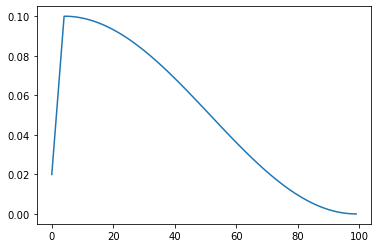

In [8]:
import matplotlib.pyplot as plt
plt.plot(agent.lr_list)